<a href="https://colab.research.google.com/github/derkaiser9423/PythonPracticeProject/blob/master/BCO7007_Assessment_2_Bank_loan_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

For ProsperityBank, the business goal is to automate the loan qualification process in real-time using information provided by customers in online application forms. The ML model aims to enhance the prediction of loan approvals, which can potentially improve operational efficiency and customer experience.

## 1.2. Translate Business Objectives to ML Objectives

It is neccesary to define quantifiable metrics that the ML model should optimize from the business objectives. In the given context, ProsperityBank aims to maximize the accuracy and F1-score (and other performance measurements) of the model while ensuring fairness and interpretability.

## 1.3. Identify Stakeholders

Identifying stakeholders early in the process is crucial for successful project execution. The book Designing Machine Learning Systems by Chip Huyen (2022) emphasizes the need to understand the requirements of various stakeholders, including business decision-makers, data scientists, ML engineers, and end-users. In the context of ProsperityBank, there are three main stakeholders, the bank management, the ML engineers, and the end-users. However, those main stakeholers are under the assumption that only those stakeholders involve in the matter of loan approval prediction.

## 1.4. Understanding the Dataset Structure

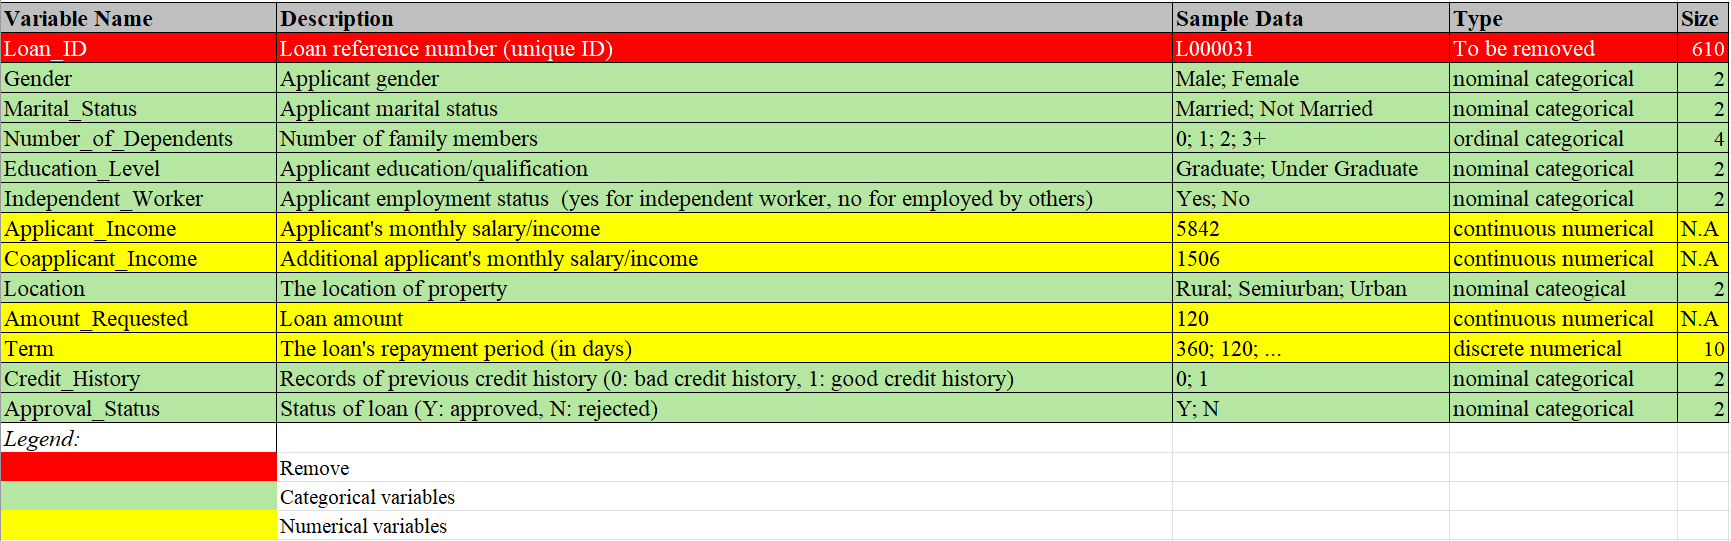

From the dataset summary above, there are several points need further contemplation to decide the type of data.


* **Loan_ID:** unique identifying keys, to be dropped as meaningless in modeling.
* **Gender:** nominal categorical variable (size = 2)
* **Marital_Status:** nominal categorical variable (size = 2)
* **Number_of_Dependents:** ordinal categorical variable (size = 4)
* **Education_Level:** nominal categorical variable (size = 2)
* **Independent_Worker:** nominal categorical variable (size = 2)
* **Applicant_Income:** continuous numerical variable
* **Coapplicant_Income:** continuous numerical variable (can combine with the "**Applicant_Income**" to make new variable "**Household_Income**")
* **Location:** nominal cateogical variable (size =3)
* **Amount_Request:** continuous numerical variable
* **Term:** discrete numerical variable due to its nature (size = 10)
* **Credit_History:** nominal categorical variable (size = 2)
* **Approval_Status:** nominal categorical variable (size = 2)

# **Part A: Supervised Learning and Analytics**

# 2. Exploratory Data Analysis

### 2.1. Getting Essential Statistics

In [567]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [568]:
# For displaying plots inline
%matplotlib inline

In [569]:
# Adjust display settings to show all columns in one row in pandas
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line breaks in large dataframes

In [570]:
# Load the dataset. Assume that the given dataset is extracted from a data warehouse and stored in the local machine
# Read the uploaded CSV file into a DataFrame
df = pd.read_csv('assessment2_dataset.csv')

In [571]:
# Display the first few rows of the dataset to get an overview
df.head()

Loan_ID Gender Marital_Status Number_of_Dependents Education_Level Independent_Worker  Applicant_Income  Coapplicant_Income   Location  Amount_Requested   Term  Credit_History Approval_Status
0  LP00031   Male            Yes                    0        Graduate                 No              9329                   0      Rural             189.0  180.0             1.0               Y
1  LP00032   Male            Yes                    2        Graduate                 No              2043                1619      Rural             102.0  360.0             1.0               Y
2  LP00033   Male            Yes                    0        Graduate                 No              4754                2331      Urban             129.0  360.0             1.0               Y
3  LP00034   Male             No                    0    Not Graduate                 No              2721                   0      Urban              59.0  180.0             1.0               Y
4  LP00035   Male            Yes                    0        Graduate                 No              2998                3419  Semiurban              56.0  180.0             1.0               Y

In [572]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               610 non-null    object 
 1   Gender                597 non-null    object 
 2   Marital_Status        607 non-null    object 
 3   Number_of_Dependents  595 non-null    object 
 4   Education_Level       610 non-null    object 
 5   Independent_Worker    578 non-null    object 
 6   Applicant_Income      610 non-null    int64  
 7   Coapplicant_Income    610 non-null    int64  
 8   Location              610 non-null    object 
 9   Amount_Requested      592 non-null    float64
 10  Term                  596 non-null    float64
 11  Credit_History        560 non-null    float64
 12  Approval_Status       610 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.1+ KB


In [573]:
# As the previous step showed missing values (different non-null counts)
# Check for missing values
df.isnull().sum()

Loan_ID                  0
Gender                  13
Marital_Status           3
Number_of_Dependents    15
Education_Level          0
Independent_Worker      32
Applicant_Income         0
Coapplicant_Income       0
Location                 0
Amount_Requested        18
Term                    14
Credit_History          50
Approval_Status          0
dtype: int64

In [574]:
# Get descriptive statistics of numerical columns
numerical_columns = ['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested', 'Term']
df[numerical_columns].describe()

Applicant_Income  Coapplicant_Income  Amount_Requested        Term
count        610.000000          610.000000        592.000000  596.000000
mean        5415.578689         1622.114754        146.459459  341.879195
std         6126.143268         2935.113192         85.597858   65.322153
min          147.000000            0.000000          9.000000   12.000000
25%         2882.750000            0.000000        101.000000  360.000000
50%         3813.000000         1150.000000        127.500000  360.000000
75%         5793.750000         2299.500000        167.500000  360.000000
max        81000.000000        41667.000000        700.000000  480.000000

In [575]:
# Check unique values in categorical columns
categorical_columns = ['Gender', 'Marital_Status', 'Education_Level', 'Independent_Worker', 'Location', 'Approval_Status', 'Number_of_Dependents', 'Credit_History']
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(df[col].value_counts())
    print("\n")

Unique values in Gender:
Gender
Male      485
Female    112
Name: count, dtype: int64


Unique values in Marital_Status:
Marital_Status
Yes    395
No     212
Name: count, dtype: int64


Unique values in Education_Level:
Education_Level
Graduate        478
Not Graduate    132
Name: count, dtype: int64


Unique values in Independent_Worker:
Independent_Worker
No     496
Yes     82
Name: count, dtype: int64


Unique values in Location:
Location
Semiurban    233
Urban        200
Rural        177
Name: count, dtype: int64


Unique values in Approval_Status:
Approval_Status
Y    418
N    192
Name: count, dtype: int64


Unique values in Number_of_Dependents:
Number_of_Dependents
0     343
1     101
2     100
3+     51
Name: count, dtype: int64


Unique values in Credit_History:
Credit_History
1.0    471
0.0     89
Name: count, dtype: int64




In [576]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print('\n')

Number of duplicate rows: 0




## 2.2. Handling Missing Values

In [577]:
# After getting insights of the data set, missing values will be handled with
# mode and median filling method

# Fill missing values in nominal categorical variables with mode
nominal_columns = ['Gender', 'Marital_Status', 'Education_Level',
                   'Independent_Worker', 'Location', 'Credit_History']
for col in nominal_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [578]:
# 'Number_of_Dependents' as ordinal variable
# Fill missing values in 'Number_of_Dependents' with mode, then convert to integer
df['Number_of_Dependents'] = df['Number_of_Dependents'].replace({'3+': 3})
df['Number_of_Dependents'] = df['Number_of_Dependents'].fillna(df['Number_of_Dependents'].mode()[0])
df['Number_of_Dependents'] = df['Number_of_Dependents'].astype(int)

In [579]:
# 'Credit_History' as nominal variable
df['Credit_History'] = df['Credit_History'].astype(str)

In [580]:
# Fill missing values in continuous variables with median
df['Applicant_Income'] = df['Applicant_Income'].fillna(df['Applicant_Income'].median())
df['Coapplicant_Income'] = df['Coapplicant_Income'].fillna(df['Coapplicant_Income'].median())
df['Amount_Requested'] = df['Amount_Requested'].fillna(df['Amount_Requested'].median())
df['Term'] = df['Term'].fillna(df['Term'].median())

In [581]:
# 'Term' as discrete numerical variable
df['Term'] = df['Term'].astype(int)

In [582]:
# Check for missing values after handling
df.isnull().sum()

Loan_ID                 0
Gender                  0
Marital_Status          0
Number_of_Dependents    0
Education_Level         0
Independent_Worker      0
Applicant_Income        0
Coapplicant_Income      0
Location                0
Amount_Requested        0
Term                    0
Credit_History          0
Approval_Status         0
dtype: int64

In [583]:
# Get descriptive statistics of numerical columns after handling missing values
numerical_columns = ['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested', 'Term']
df[numerical_columns].describe()

Applicant_Income  Coapplicant_Income  Amount_Requested        Term
count        610.000000          610.000000        610.000000  610.000000
mean        5415.578689         1622.114754        145.900000  342.295082
std         6126.143268         2935.113192         84.384494   64.624047
min          147.000000            0.000000          9.000000   12.000000
25%         2882.750000            0.000000        101.000000  360.000000
50%         3813.000000         1150.000000        127.500000  360.000000
75%         5793.750000         2299.500000        164.750000  360.000000
max        81000.000000        41667.000000        700.000000  480.000000

In [584]:
# Check unique values in categorical columns after handling missing values
categorical_columns = ['Gender', 'Marital_Status', 'Education_Level', 'Independent_Worker', 'Location', 'Approval_Status', 'Number_of_Dependents', 'Credit_History']
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(df[col].value_counts())
    print("\n")

Unique values in Gender:
Gender
Male      498
Female    112
Name: count, dtype: int64


Unique values in Marital_Status:
Marital_Status
Yes    398
No     212
Name: count, dtype: int64


Unique values in Education_Level:
Education_Level
Graduate        478
Not Graduate    132
Name: count, dtype: int64


Unique values in Independent_Worker:
Independent_Worker
No     528
Yes     82
Name: count, dtype: int64


Unique values in Location:
Location
Semiurban    233
Urban        200
Rural        177
Name: count, dtype: int64


Unique values in Approval_Status:
Approval_Status
Y    418
N    192
Name: count, dtype: int64


Unique values in Number_of_Dependents:
Number_of_Dependents
0    358
1    101
2    100
3     51
Name: count, dtype: int64


Unique values in Credit_History:
Credit_History
1.0    521
0.0     89
Name: count, dtype: int64




After handling missing values with mode and median filling in method, the data set is ready to visualise and analyse further.

## 2.3. Visualising Data and Further Analyses

#### 2.3.a. Univariate Analysis

**Univariate Analysis of Categorical Variables**

Bar plots and value counts for categorical variables

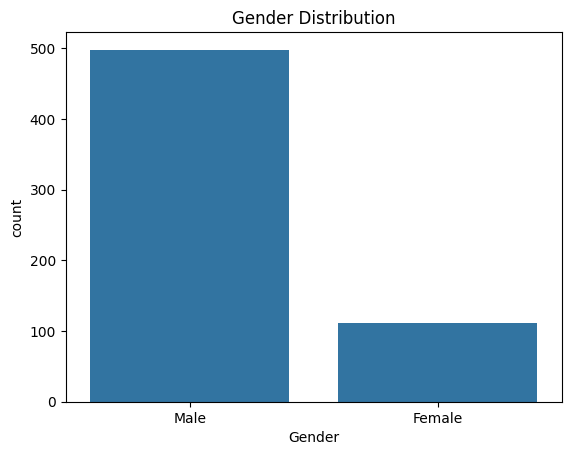

Value counts for Gender:


Gender
Male      498
Female    112
Name: count, dtype: int64

In [585]:
# Countplot for Gender
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

# Value counts
print('Value counts for Gender:')
df['Gender'].value_counts()

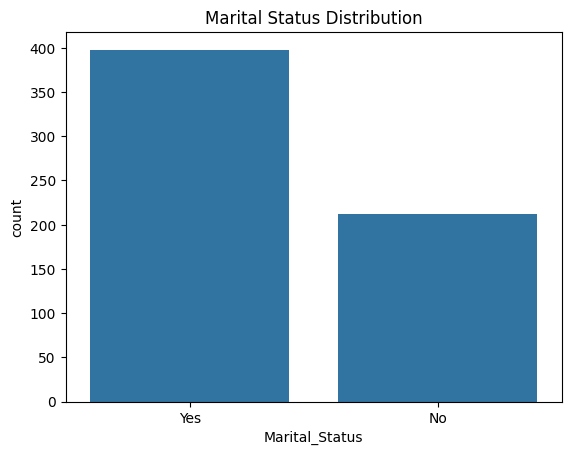

Value counts for Marital Status:


Marital_Status
Yes    398
No     212
Name: count, dtype: int64

In [586]:
# Countplot for Marital_Status
sns.countplot(data=df, x='Marital_Status')
plt.title('Marital Status Distribution')
plt.show()

# Value counts
print('Value counts for Marital Status:')
df['Marital_Status'].value_counts()

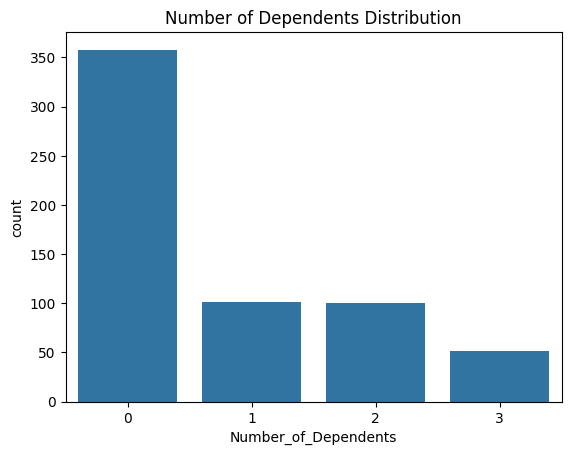

Value counts for Number of Dependents:


Number_of_Dependents
0    358
1    101
2    100
3     51
Name: count, dtype: int64

In [587]:
# Number_of_Dependents is a ordinal variable. Therefore, "3+" values will be converted into integer "3".

# Countplot for Number_of_Dependents
sns.countplot(data=df, x='Number_of_Dependents')
plt.title('Number of Dependents Distribution')
plt.show()

# Value counts
print('Value counts for Number of Dependents:')
df['Number_of_Dependents'].value_counts()

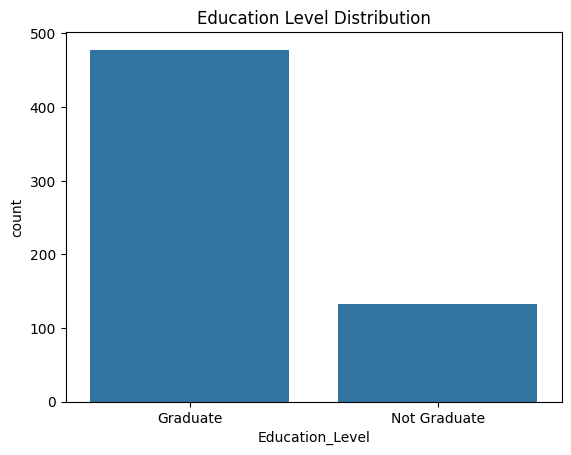

Value counts for Education Level:


Education_Level
Graduate        478
Not Graduate    132
Name: count, dtype: int64

In [588]:
# Countplot for Education_Level
sns.countplot(data=df, x='Education_Level')
plt.title('Education Level Distribution')
plt.show()

# Value counts
print('Value counts for Education Level:')
df['Education_Level'].value_counts()

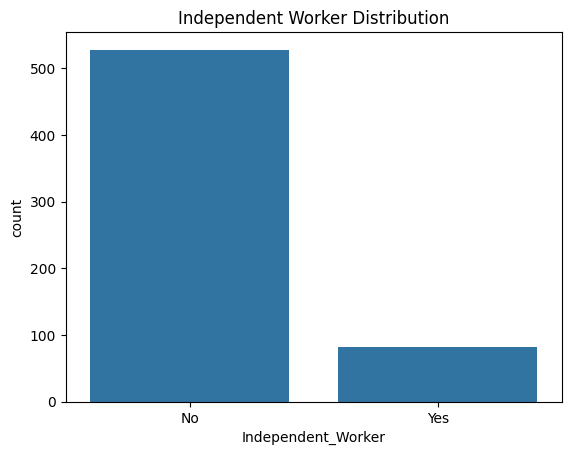

Value counts for Independent Worker:


Independent_Worker
No     528
Yes     82
Name: count, dtype: int64

In [589]:
# Countplot for Independent_Worker
sns.countplot(data=df, x='Independent_Worker')
plt.title('Independent Worker Distribution')
plt.show()

# Value counts
print('Value counts for Independent Worker:')
df['Independent_Worker'].value_counts()

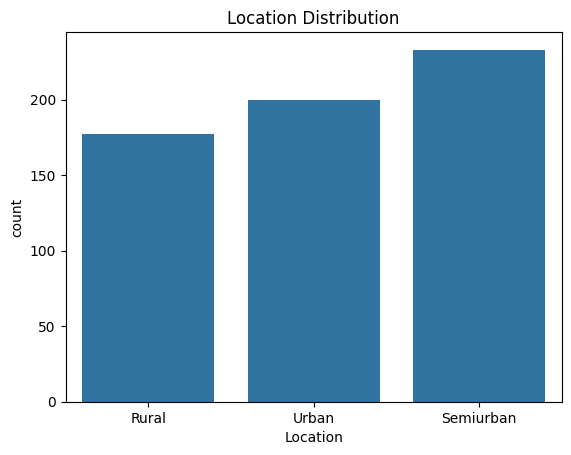

Value counts for Location:


Location
Semiurban    233
Urban        200
Rural        177
Name: count, dtype: int64

In [590]:
# Countplot for Location
sns.countplot(data=df, x='Location')
plt.title('Location Distribution')
plt.show()

# Value counts
print('Value counts for Location:')
df['Location'].value_counts()

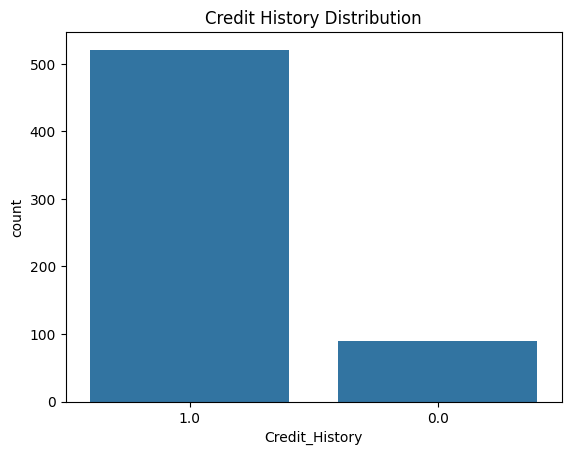

Value counts for Credit History:


Credit_History
1.0    521
0.0     89
Name: count, dtype: int64

In [591]:
# Countplot for Credit_History
sns.countplot(data=df, x='Credit_History')
plt.title('Credit History Distribution')
plt.show()

# Value counts
print('Value counts for Credit History:')
df['Credit_History'].value_counts()

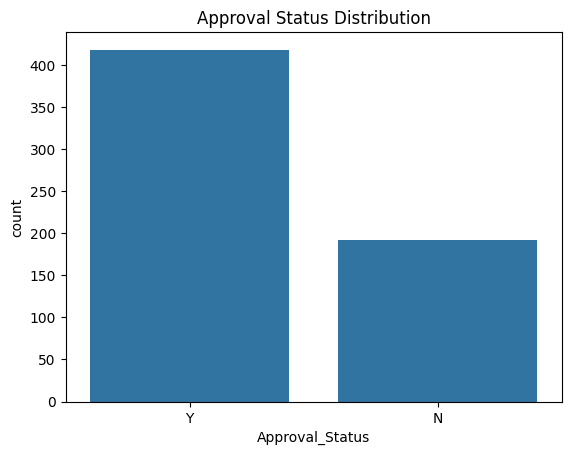

Value counts for Approval Status:


Approval_Status
Y    418
N    192
Name: count, dtype: int64

In [592]:
# Countplot for Approval_Status
sns.countplot(data=df, x='Approval_Status')
plt.title('Approval Status Distribution')
plt.show()

# Value counts
print('Value counts for Approval Status:')
df['Approval_Status'].value_counts()

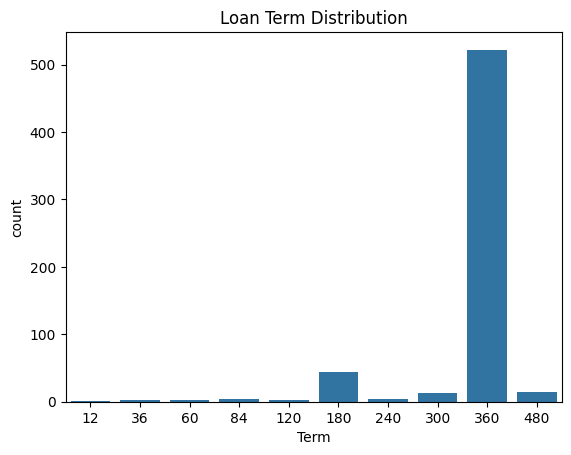

Value counts for Term:


Term
360    522
180     44
480     15
300     13
84       4
240      4
120      3
36       2
60       2
12       1
Name: count, dtype: int64

In [593]:
# Countplot for Term as discrete numerical variable
sns.countplot(data=df, x='Term')
plt.title('Loan Term Distribution')
plt.show()

# Value counts
print('Value counts for Term:')
df['Term'].value_counts()

**Univariate Analysis of Numerical Variables**

Histograms and summary statistics for numerical variables

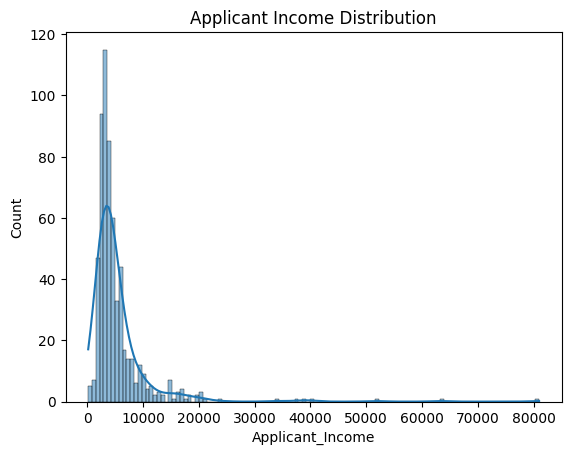

Summary statistics for Applicant Income


count      610.000000
mean      5415.578689
std       6126.143268
min        147.000000
25%       2882.750000
50%       3813.000000
75%       5793.750000
max      81000.000000
Name: Applicant_Income, dtype: float64

In [594]:
# Histogram for Applicant_Income
sns.histplot(df['Applicant_Income'], kde=True)
plt.title('Applicant Income Distribution')
plt.show()

# Summary statistics
print('Summary statistics for Applicant Income')
df['Applicant_Income'].describe()

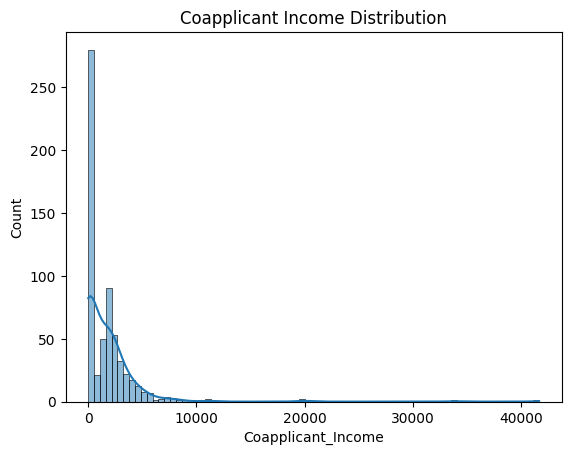

Summary statistics for Coapplicant Income


count      610.000000
mean      1622.114754
std       2935.113192
min          0.000000
25%          0.000000
50%       1150.000000
75%       2299.500000
max      41667.000000
Name: Coapplicant_Income, dtype: float64

In [595]:
# Histogram for Coapplicant_Income
sns.histplot(df['Coapplicant_Income'], kde=True)
plt.title('Coapplicant Income Distribution')
plt.show()

# Summary statistics
print('Summary statistics for Coapplicant Income')
df['Coapplicant_Income'].describe()

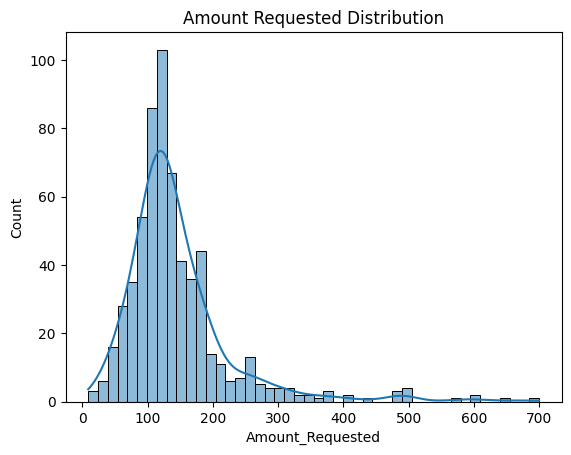

Summary statistics for Amount Requested


count    610.000000
mean     145.900000
std       84.384494
min        9.000000
25%      101.000000
50%      127.500000
75%      164.750000
max      700.000000
Name: Amount_Requested, dtype: float64

In [596]:
# Histogram for Amount_Request
sns.histplot(df['Amount_Requested'], kde=True)
plt.title('Amount Requested Distribution')
plt.show()

# Summary statistics
print('Summary statistics for Amount Requested')
df['Amount_Requested'].describe()

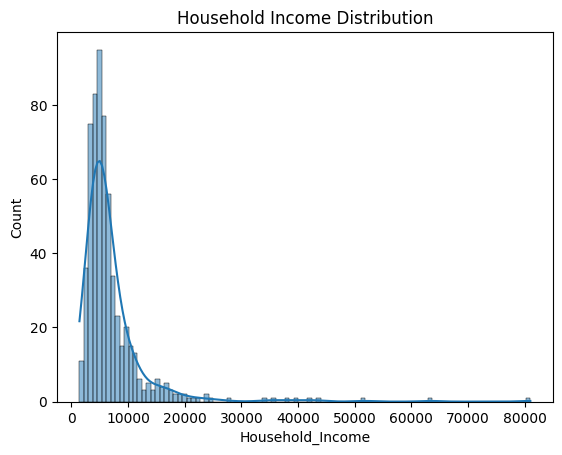

Summary statistics for Household_Income


count      610.000000
mean      7037.693443
std       6477.841166
min       1440.000000
25%       4168.250000
50%       5417.000000
75%       7537.250000
max      81000.000000
Name: Household_Income, dtype: float64

In [597]:
# Create a new column for Household_Income
df['Household_Income'] = df['Applicant_Income'] + df['Coapplicant_Income']

# Histogram for Household_Income
sns.histplot(df['Household_Income'], kde=True)
plt.title('Household Income Distribution')
plt.show()

# Summary statistics
print('Summary statistics for Household_Income')
df['Household_Income'].describe()

#### 2.3.b. Bivariate Analysis

**Nominal categorical variables vs. target variable**

Crosstabs for tabular comparison and stacked bar plots to visualize the relationships

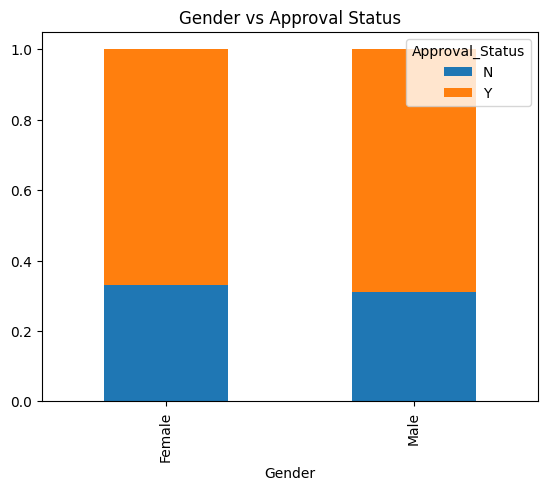

In [598]:
### Bivariate Analysis: Gender vs Approval Status
# Crosstab
pd.crosstab(df['Gender'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Gender'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Gender vs Approval Status')
plt.show()

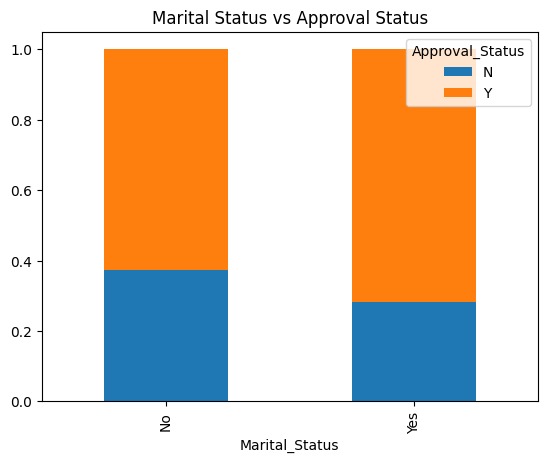

In [599]:
### Bivariate Analysis: Gender vs Approval Status
# Crosstab
pd.crosstab(df['Marital_Status'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Marital_Status'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Marital Status vs Approval Status')
plt.show()

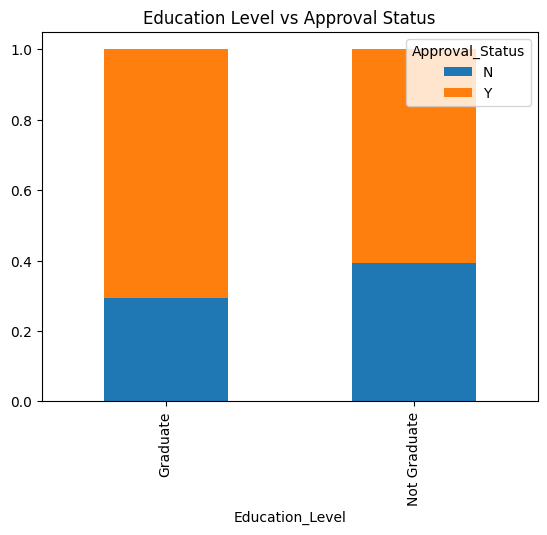

In [600]:
### Bivariate Analysis: Education Level vs Approval Status
# Crosstab
pd.crosstab(df['Education_Level'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Education_Level'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Education Level vs Approval Status')
plt.show()

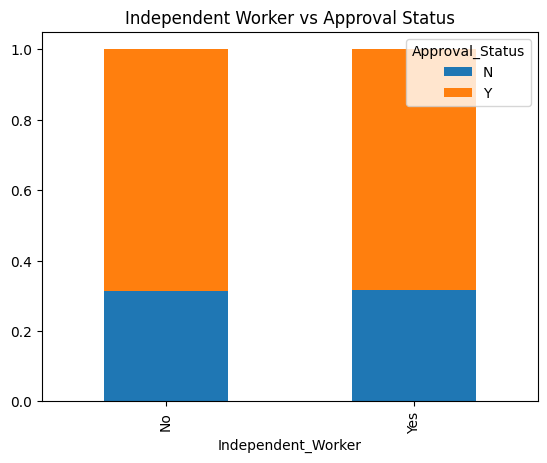

In [601]:
### Bivariate Analysis: Independent Worker vs Approval Status
# Crosstab
pd.crosstab(df['Independent_Worker'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Independent_Worker'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Independent Worker vs Approval Status')
plt.show()

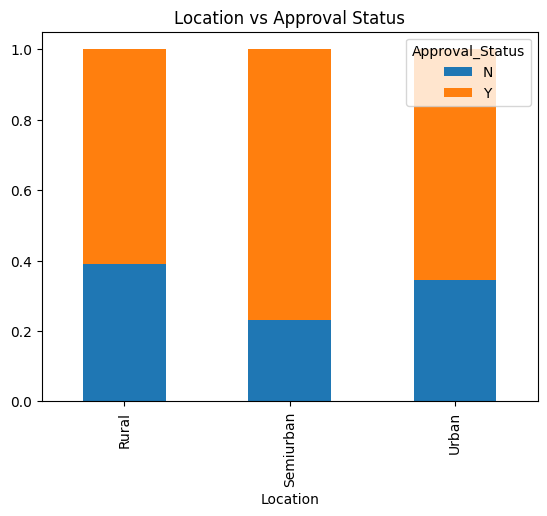

In [602]:
### Bivariate Analysis: Location vs Approval Status
# Crosstab
pd.crosstab(df['Location'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Location'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Location vs Approval Status')
plt.show()

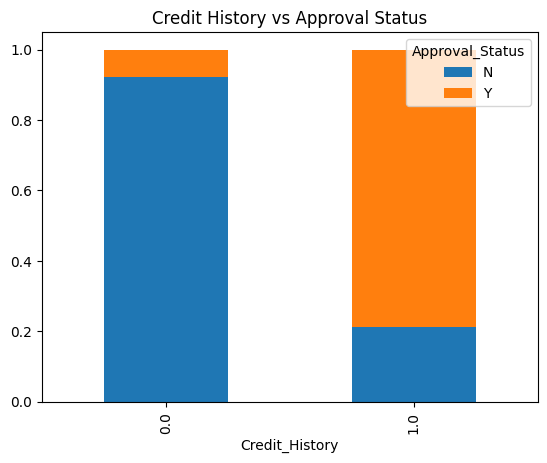

In [603]:
### Bivariate Analysis: Credit History vs Approval Status
# Crosstab
pd.crosstab(df['Credit_History'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Credit_History'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Credit History vs Approval Status')
plt.show()

**Ordinal categorical variables vs. target variable**

Crosstabs for tabular comparison and stacked bar plots to visualize the relationships

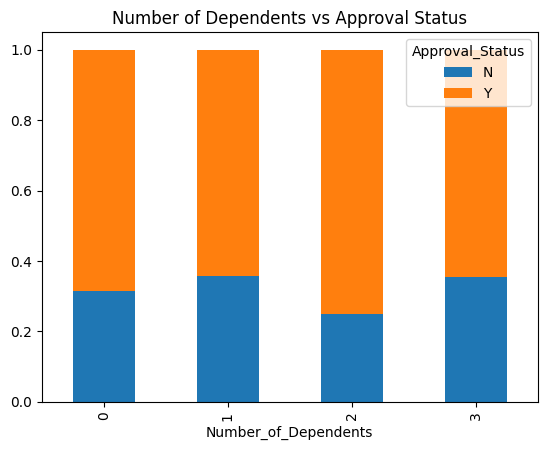

In [604]:
### Bivariate Analysis: Number of Dependents vs Approval Status
# Crosstab
pd.crosstab(df['Number_of_Dependents'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Number_of_Dependents'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Number of Dependents vs Approval Status')
plt.show()

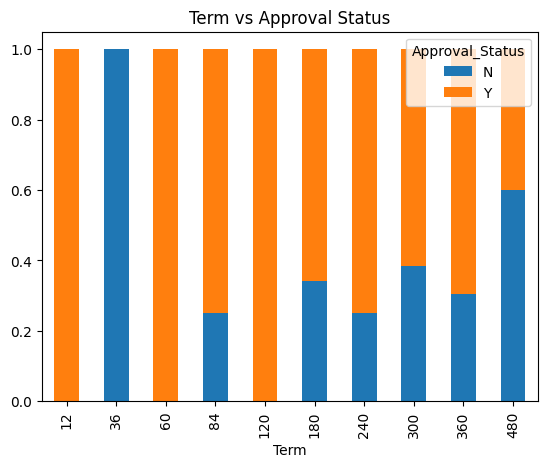

In [605]:
### Bivariate Analysis: Term vs Approval Status
# Crosstab
pd.crosstab(df['Term'], df['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(df['Term'], df['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Term vs Approval Status')
plt.show()

**Numerical variables vs. Amount Requested**

Scatter plots to visualize correlations and Pearson's correlation coefficients to quantify relationships

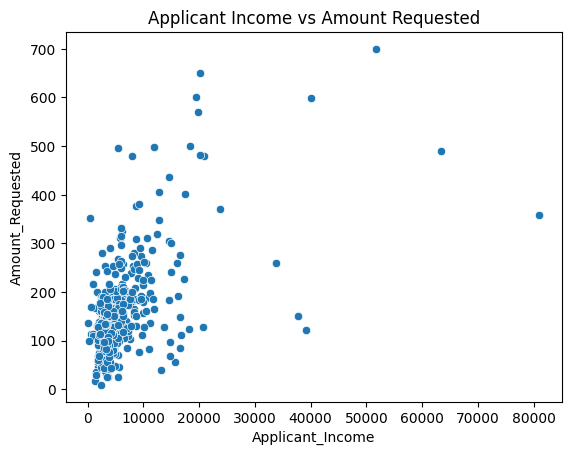

Applicant_Income  Amount_Requested
Applicant_Income          1.000000          0.564488
Amount_Requested          0.564488          1.000000

In [606]:
### Bivariate Analysis: Applicant Income vs Amount Requested
# Scatter plot
sns.scatterplot(x='Applicant_Income', y='Amount_Requested', data=df)
plt.title('Applicant Income vs Amount Requested')
plt.show()

# Correlation coefficient
df[['Applicant_Income', 'Amount_Requested']].corr()

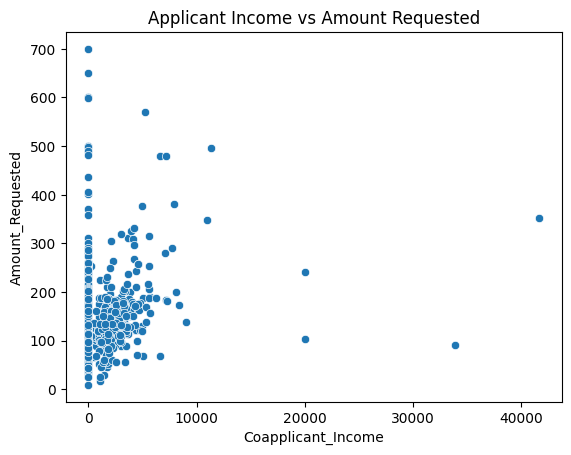

Coapplicant_Income  Amount_Requested
Coapplicant_Income            1.000000          0.190008
Amount_Requested              0.190008          1.000000

In [607]:
### Bivariate Analysis: Coapplicant Income vs Amount Requested
# Scatter plot
sns.scatterplot(x='Coapplicant_Income', y='Amount_Requested', data=df)
plt.title('Applicant Income vs Amount Requested')
plt.show()

# Correlation coefficient
df[['Coapplicant_Income', 'Amount_Requested']].corr()

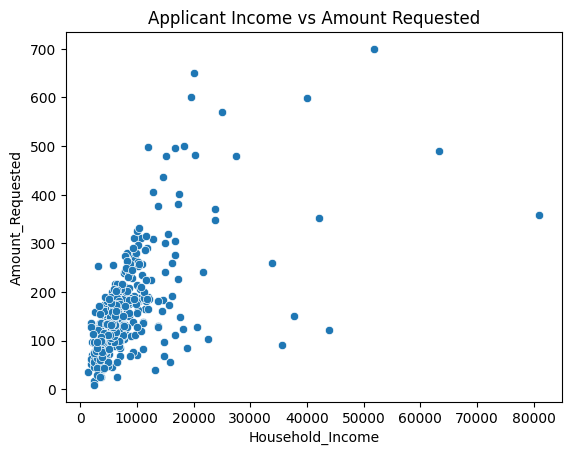

Household_Income  Amount_Requested
Household_Income          1.000000          0.619933
Amount_Requested          0.619933          1.000000

In [608]:
### Bivariate Analysis: Household Income vs Amount Requested
# Scatter plot
sns.scatterplot(x='Household_Income', y='Amount_Requested', data=df)
plt.title('Applicant Income vs Amount Requested')
plt.show()

# Correlation coefficient
df[['Household_Income', 'Amount_Requested']].corr()

**Numerical variables vs. target variable**

Box plots to visualize the distribution and groupby and aggregation to summarize the data with statistics like mean, median, etc

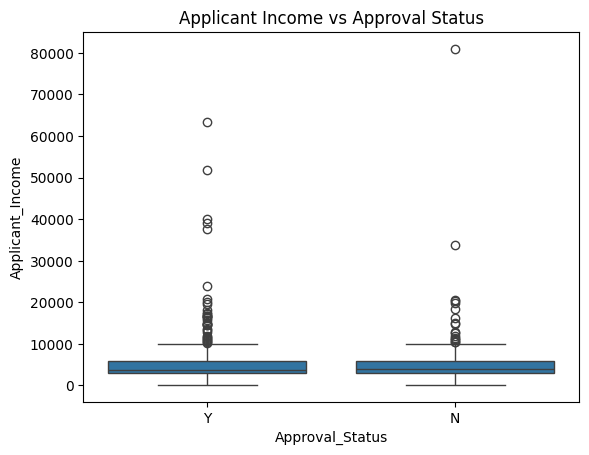

Approval_Status
N    5446.119792
Y    5401.550239
Name: Applicant_Income, dtype: float64

In [609]:
### Bivariate Analysis: Applicant Income vs Approval Status
# Box plot
sns.boxplot(x='Approval_Status', y='Applicant_Income', data=df)
plt.title('Applicant Income vs Approval Status')
plt.show()

# Groupby mean Applicant_Income for each Approval_Status
df.groupby('Approval_Status')['Applicant_Income'].mean()

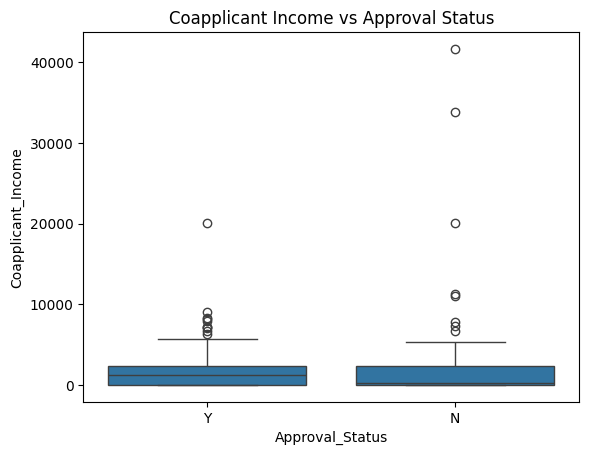

Approval_Status
N    1877.875000
Y    1504.636364
Name: Coapplicant_Income, dtype: float64

In [610]:
### Bivariate Analysis: Coapplicant Income vs Approval Status
# Box plot
sns.boxplot(x='Approval_Status', y='Coapplicant_Income', data=df)
plt.title('Coapplicant Income vs Approval Status')
plt.show()

# Groupby mean Coapplicant_Income for each Approval_Status
df.groupby('Approval_Status')['Coapplicant_Income'].mean()

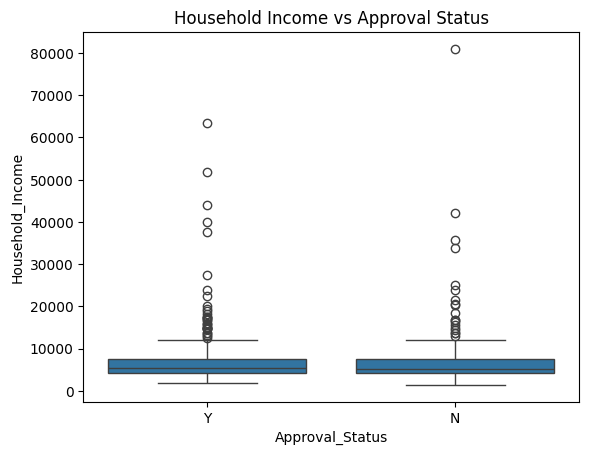

Approval_Status
N    7323.994792
Y    6906.186603
Name: Household_Income, dtype: float64

In [611]:
### Bivariate Analysis: Household Income vs Approval Status
# Box plot
sns.boxplot(x='Approval_Status', y='Household_Income', data=df)
plt.title('Household Income vs Approval Status')
plt.show()

# Groupby mean Household_Income for each Approval_Status
df.groupby('Approval_Status')['Household_Income'].mean()

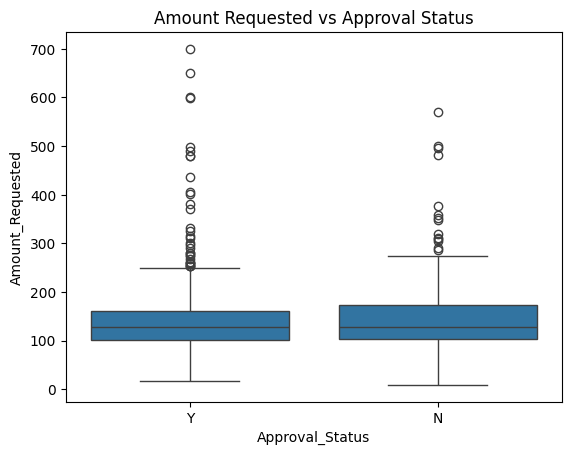

Approval_Status
N    149.903646
Y    144.061005
Name: Amount_Requested, dtype: float64

In [612]:
### Bivariate Analysis: Amount Requested vs Approval Status
# Box plot
sns.boxplot(x='Approval_Status', y='Amount_Requested', data=df)
plt.title('Amount Requested vs Approval Status')
plt.show()

# Groupby mean Amount_Request for each Approval_Status
df.groupby('Approval_Status')['Amount_Requested'].mean()

#### 2.3.c. Multivariate Analysis

**Numerical Variables**

Pair Plot with hue as Approval_Status

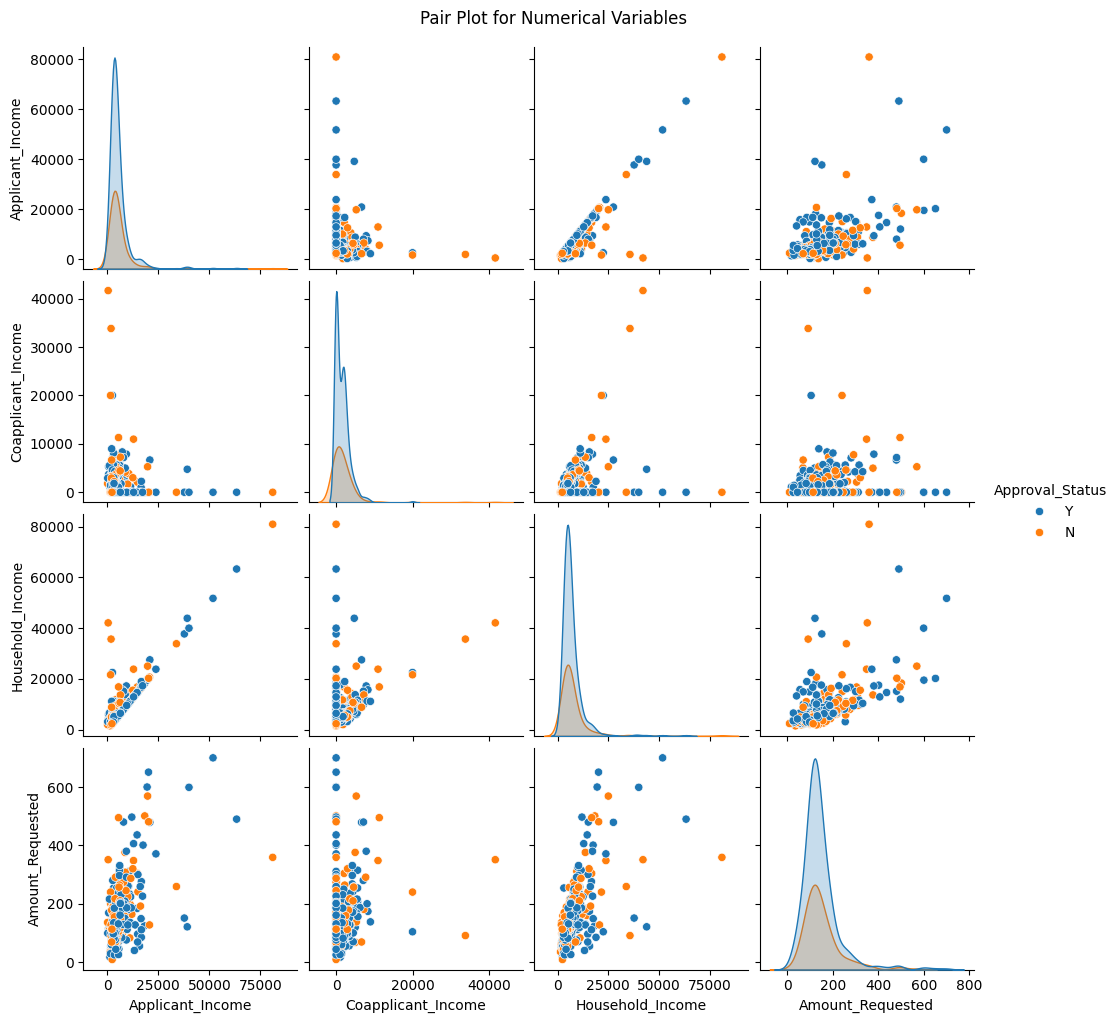

In [613]:
### Multivariate Analysis: Pair Plot for Numerical Variables
# Select only numerical variables
numerical_vars = ['Applicant_Income', 'Coapplicant_Income', 'Household_Income', 'Amount_Requested']

# Pair plot with hue as Approval_Status
sns.pairplot(df[numerical_vars + ['Approval_Status']], hue='Approval_Status', diag_kind='kde')
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()

Heatmap of Correlations

Correlation between the numerical variables

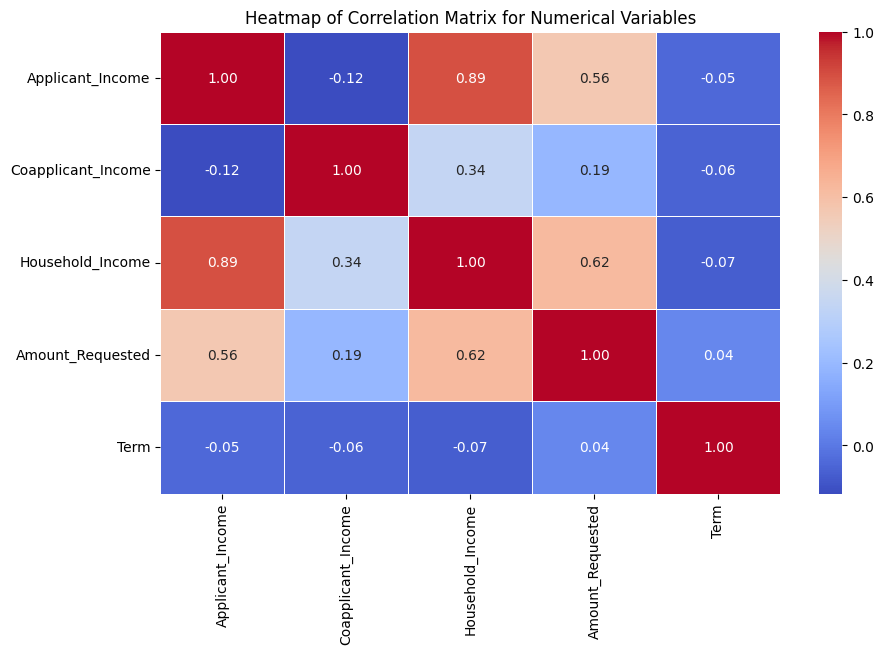

In [614]:
### Multivariate Analysis: Heatmap of Correlation Matrix (Numerical Variables)
# Correlation matrix
corr_matrix = df[['Applicant_Income', 'Coapplicant_Income', 'Household_Income', 'Amount_Requested', 'Term']].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix for Numerical Variables')
plt.show()


**Categorical Variables and Numerical Variables**

Violin plots or box plots to visualize how a categorical variable interacts with a numerical variable colored by the target variable

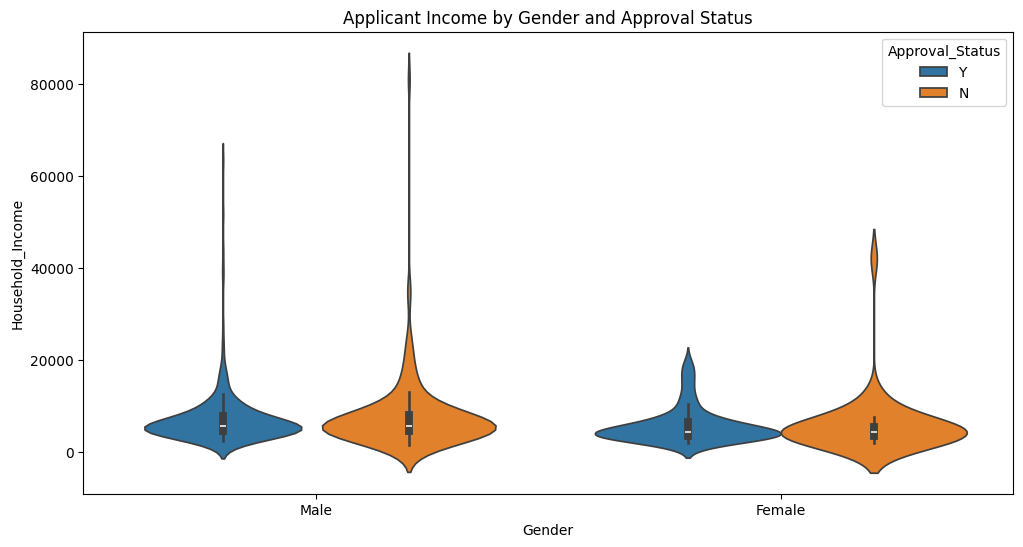

In [615]:
### Multivariate Analysis: Violin Plot (Categorical vs Numerical vs Approval Status)
# Gender
plt.figure(figsize=(12, 6))
sns.violinplot(x='Gender', y='Household_Income', hue='Approval_Status', data=df)
plt.title('Applicant Income by Gender and Approval Status')
plt.show()

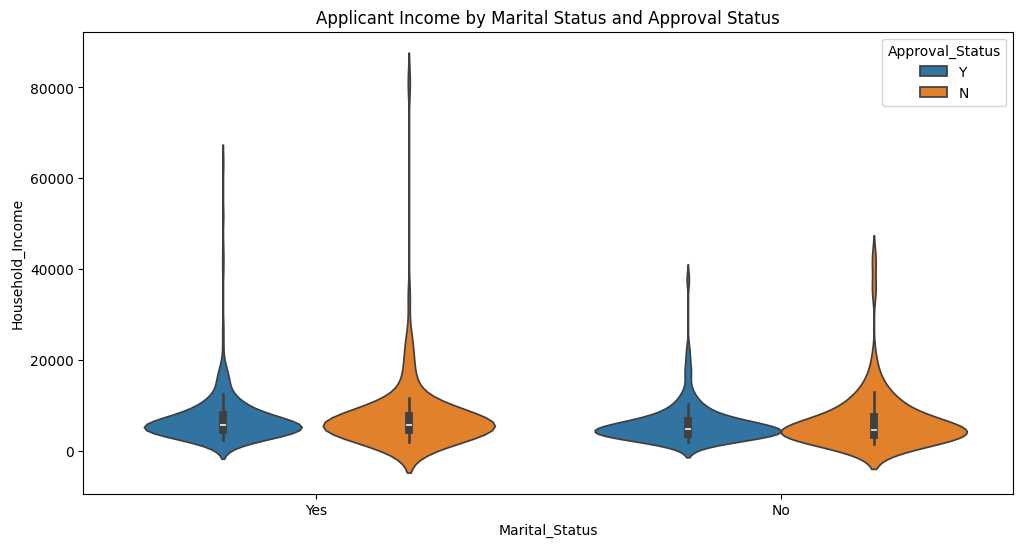

In [616]:
# Marital_Status
plt.figure(figsize=(12, 6))
sns.violinplot(x='Marital_Status', y='Household_Income', hue='Approval_Status', data=df)
plt.title('Applicant Income by Marital Status and Approval Status')
plt.show()

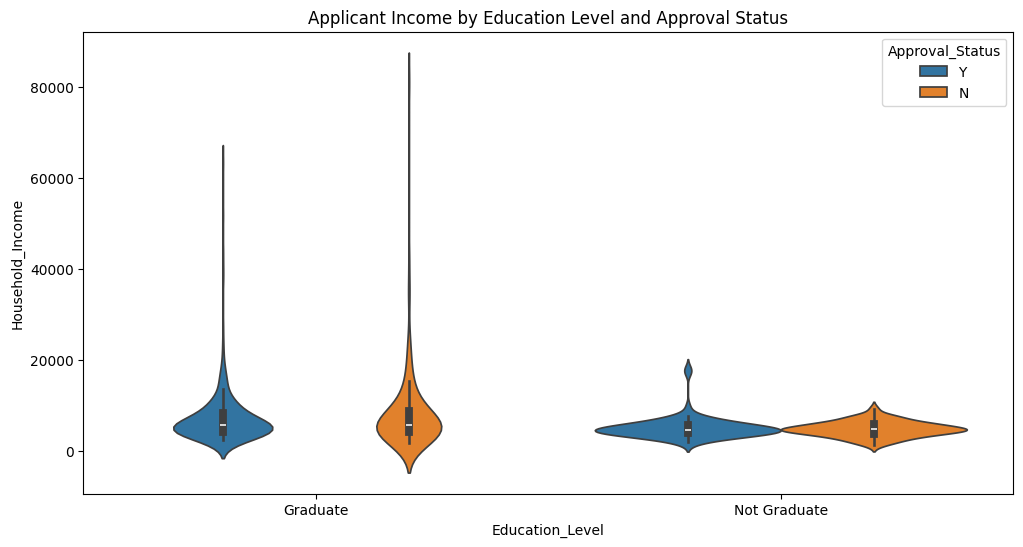

In [617]:
# Education_Level
plt.figure(figsize=(12, 6))
sns.violinplot(x='Education_Level', y='Household_Income', hue='Approval_Status', data=df)
plt.title('Applicant Income by Education Level and Approval Status')
plt.show()

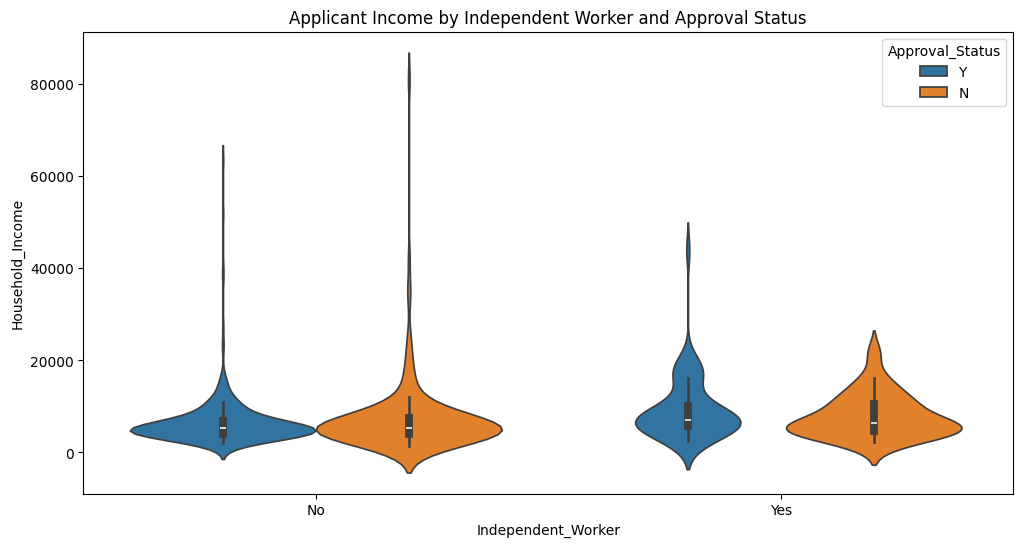

In [618]:
# Independent_Worker
plt.figure(figsize=(12, 6))
sns.violinplot(x='Independent_Worker', y='Household_Income', hue='Approval_Status', data=df)
plt.title('Applicant Income by Independent Worker and Approval Status')
plt.show()

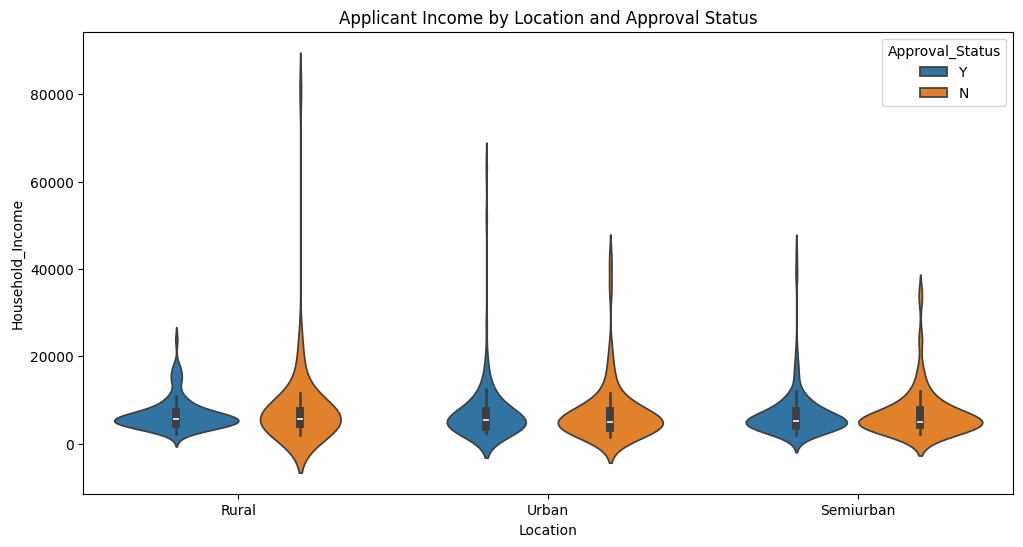

In [619]:
# Location
plt.figure(figsize=(12, 6))
sns.violinplot(x='Location', y='Household_Income', hue='Approval_Status', data=df)
plt.title('Applicant Income by Location and Approval Status')
plt.show()

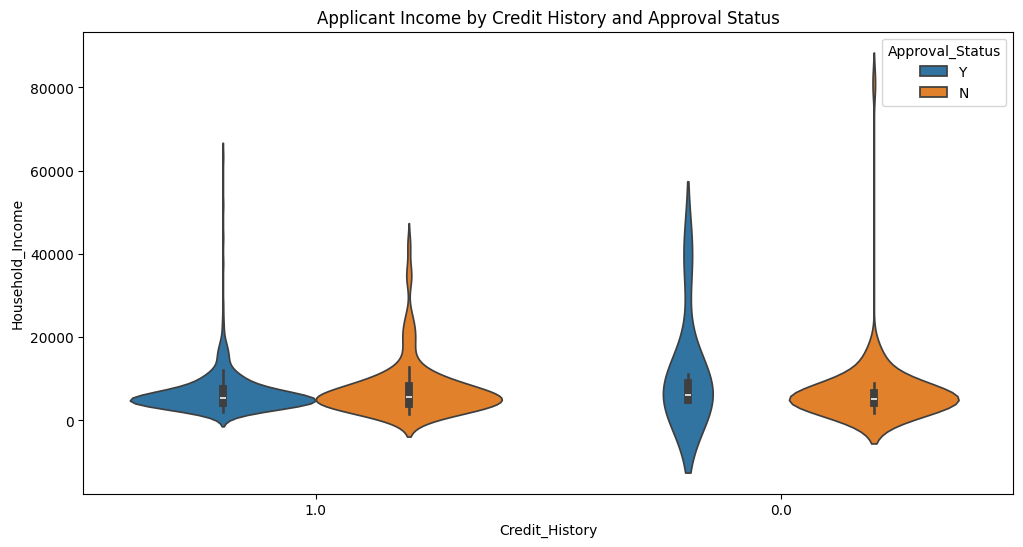

In [620]:
# Credit_History
plt.figure(figsize=(12, 6))
sns.violinplot(x='Credit_History', y='Household_Income', hue='Approval_Status', data=df)
plt.title('Applicant Income by Credit History and Approval Status')
plt.show()

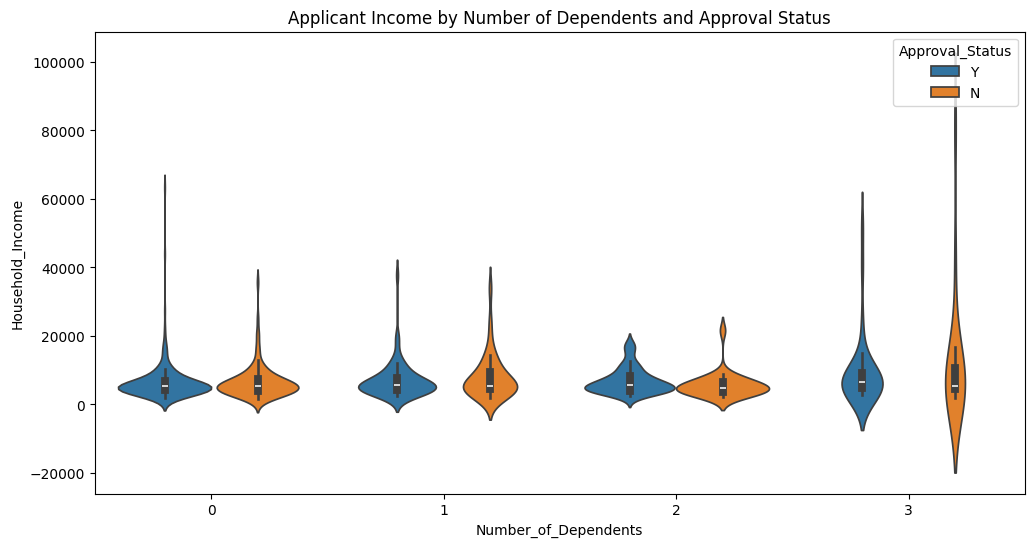

In [621]:
# Number_of_Dependents
plt.figure(figsize=(12, 6))
sns.violinplot(x='Number_of_Dependents', y='Household_Income', hue='Approval_Status', data=df)
plt.title('Applicant Income by Number of Dependents and Approval Status')
plt.show()

# 3. Data Preprocessing

## 3.1. Detecting and Handling Outliers

Use Isolation Forest

From the statistics after filling in missing values with mode and median in section **2.2. Handling Missing Values** and the visualisation of data in section **2.3. Visualising Data and Further Analyses**, the characteristics of the data should be examined to decide appropriate methods to detect and handle outliers. There are heavy outliers in the numerical variables and the distribution of data within those variables are strongly skewed.

In [622]:
# Assessing skewness for df
numerical_columns = 'Applicant_Income', 'Coapplicant_Income', 'Household_Income', 'Amount_Requested', 'Term'
for column in numerical_columns:
    skewness = df[column].skew()
    print(f"Skewness of {column}: {skewness}")
    if skewness > 1 or skewness < -1:
        print(f"{column} is highly skewed.")
    elif skewness > 0.5 or skewness < -0.5:
        print(f"{column} is moderately skewed.")

Skewness of Applicant_Income: 6.521836068699207
Applicant_Income is highly skewed.
Skewness of Coapplicant_Income: 7.473035941592677
Coapplicant_Income is highly skewed.
Skewness of Household_Income: 5.614491388656663
Household_Income is highly skewed.
Skewness of Amount_Requested: 2.73157209205283
Amount_Requested is highly skewed.
Skewness of Term: -2.3908335966522354
Term is highly skewed.


**IQR method**

The steps start with IQR Method. Given the dataset characteristics, beginning with the IQR method is a straightforward and robust approach.

In [623]:
# IQR method to detect outliers in Applicant_Income variable
Q1 = df['Applicant_Income'].quantile(0.25)
Q3 = df['Applicant_Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_Applicant_Income = df[(df['Applicant_Income'] < lower_bound) | (df['Applicant_Income'] > upper_bound)].copy()

In [624]:
print(outliers_Applicant_Income.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 18 to 607
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               50 non-null     object 
 1   Gender                50 non-null     object 
 2   Marital_Status        50 non-null     object 
 3   Number_of_Dependents  50 non-null     int64  
 4   Education_Level       50 non-null     object 
 5   Independent_Worker    50 non-null     object 
 6   Applicant_Income      50 non-null     int64  
 7   Coapplicant_Income    50 non-null     int64  
 8   Location              50 non-null     object 
 9   Amount_Requested      50 non-null     float64
 10  Term                  50 non-null     int64  
 11  Credit_History        50 non-null     object 
 12  Approval_Status       50 non-null     object 
 13  Household_Income      50 non-null     int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 5.9+ KB
None


In [625]:
# IQR method to detect outliers in Coapplicant_Income variable
Q1 = df['Coapplicant_Income'].quantile(0.25)
Q3 = df['Coapplicant_Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_Coapplicant_Income = df[(df['Coapplicant_Income'] < lower_bound) | (df['Coapplicant_Income'] > upper_bound)].copy()

In [626]:
print(outliers_Coapplicant_Income.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 29 to 606
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               18 non-null     object 
 1   Gender                18 non-null     object 
 2   Marital_Status        18 non-null     object 
 3   Number_of_Dependents  18 non-null     int64  
 4   Education_Level       18 non-null     object 
 5   Independent_Worker    18 non-null     object 
 6   Applicant_Income      18 non-null     int64  
 7   Coapplicant_Income    18 non-null     int64  
 8   Location              18 non-null     object 
 9   Amount_Requested      18 non-null     float64
 10  Term                  18 non-null     int64  
 11  Credit_History        18 non-null     object 
 12  Approval_Status       18 non-null     object 
 13  Household_Income      18 non-null     int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 2.1+ KB
None


In [627]:
# IQR method to detect outliers in Household_Income variable
Q1 = df['Household_Income'].quantile(0.25)
Q3 = df['Household_Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_Household_Income = df[(df['Household_Income'] < lower_bound) | (df['Household_Income'] > upper_bound)].copy()

In [628]:
print(outliers_Coapplicant_Income.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 29 to 606
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               18 non-null     object 
 1   Gender                18 non-null     object 
 2   Marital_Status        18 non-null     object 
 3   Number_of_Dependents  18 non-null     int64  
 4   Education_Level       18 non-null     object 
 5   Independent_Worker    18 non-null     object 
 6   Applicant_Income      18 non-null     int64  
 7   Coapplicant_Income    18 non-null     int64  
 8   Location              18 non-null     object 
 9   Amount_Requested      18 non-null     float64
 10  Term                  18 non-null     int64  
 11  Credit_History        18 non-null     object 
 12  Approval_Status       18 non-null     object 
 13  Household_Income      18 non-null     int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 2.1+ KB
None


In [629]:
# IQR method to detect outliers in Amount_Requested variable
Q1 = df['Amount_Requested'].quantile(0.25)
Q3 = df['Amount_Requested'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_Amount_Requested = df[(df['Amount_Requested'] < lower_bound) | (df['Amount_Requested'] > upper_bound)].copy()

In [630]:
print(outliers_Amount_Requested.info())

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 6 to 607
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               42 non-null     object 
 1   Gender                42 non-null     object 
 2   Marital_Status        42 non-null     object 
 3   Number_of_Dependents  42 non-null     int64  
 4   Education_Level       42 non-null     object 
 5   Independent_Worker    42 non-null     object 
 6   Applicant_Income      42 non-null     int64  
 7   Coapplicant_Income    42 non-null     int64  
 8   Location              42 non-null     object 
 9   Amount_Requested      42 non-null     float64
 10  Term                  42 non-null     int64  
 11  Credit_History        42 non-null     object 
 12  Approval_Status       42 non-null     object 
 13  Household_Income      42 non-null     int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 4.9+ KB
None


In [631]:
# IQR method to detect outliers in Term variable
Q1 = df['Term'].quantile(0.25)
Q3 = df['Term'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_Term = df[(df['Term'] < lower_bound) | (df['Term'] > upper_bound)].copy()

In [632]:
print(outliers_Term.info())

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 607
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               88 non-null     object 
 1   Gender                88 non-null     object 
 2   Marital_Status        88 non-null     object 
 3   Number_of_Dependents  88 non-null     int64  
 4   Education_Level       88 non-null     object 
 5   Independent_Worker    88 non-null     object 
 6   Applicant_Income      88 non-null     int64  
 7   Coapplicant_Income    88 non-null     int64  
 8   Location              88 non-null     object 
 9   Amount_Requested      88 non-null     float64
 10  Term                  88 non-null     int64  
 11  Credit_History        88 non-null     object 
 12  Approval_Status       88 non-null     object 
 13  Household_Income      88 non-null     int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 10.3+ KB
None


Outliers detected by IQR method vary in many different rows. Therefore, Isolation Forest method will be applied next.

**Isolation Forest**

In [633]:
# Importing necessary libraries
from sklearn.ensemble import IsolationForest

In [634]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

In [635]:
# Fit the model on the numerical columns of the DataFrame
numerical_columns = ['Applicant_Income', 'Coapplicant_Income', 'Household_Income', 'Amount_Requested', 'Term']
iso_forest.fit(df[numerical_columns])

IsolationForest(random_state=42)

In [636]:
# Predict outliers (-1 denotes an outlier, 1 denotes an inlier)
outliers = iso_forest.predict(df[numerical_columns])

In [637]:
# Create a new DataFrame to store the outliers
outliers_IS = df[outliers == -1].copy()

In [638]:
# Reset the index of the outliers DataFrame for cleaner output
outliers_IS.reset_index(drop=True, inplace=True)

In [639]:
# Count the number of outliers and inliers detected by the Isolation Forest
outlier_count = (outliers == -1).sum()
inlier_count = (outliers == 1).sum()

In [640]:
print(f'Number of outliers detected: {outlier_count}')
print(f'Number of inliers detected: {inlier_count}')

Number of outliers detected: 55
Number of inliers detected: 555


In [641]:
# Display the DataFrame containing the outliers
print("Outliers detected by Isolation Forest:")
print(outliers_IS.head())

Outliers detected by Isolation Forest:
   Loan_ID  Gender Marital_Status  Number_of_Dependents Education_Level Independent_Worker  Applicant_Income  Coapplicant_Income   Location  Amount_Requested  Term Credit_History Approval_Status  Household_Income
0  LP00037    Male            Yes                     1        Graduate                Yes              8670                4982      Rural             376.0   360            0.0               N             13652
1  LP00059    Male            Yes                     3    Not Graduate                 No              2074                 752  Semiurban              95.0   480            1.0               Y              2826
2  LP00060  Female             No                     3        Graduate                 No               417               41667      Urban             351.0   180            1.0               N             42084
3  LP00071    Male            Yes                     1        Graduate                 No             18335 

**Combine all outliers detected by IQR and Isolation Forest with flags**

In [642]:
# Add flags to each outlier DataFrame
outliers_Applicant_Income.loc[:, 'Outlier_Method'] = 'IQR'
outliers_Coapplicant_Income.loc[:, 'Outlier_Method'] = 'IQR'
outliers_Household_Income.loc[:, 'Outlier_Method'] = 'IQR'
outliers_Amount_Requested.loc[:, 'Outlier_Method'] = 'IQR'
outliers_Term.loc[:, 'Outlier_Method'] = 'IQR'
outliers_IS.loc[:, 'Outlier_Method'] = 'Isolation Forest'

In [643]:
# Flag individual outlier values for IQR method
outliers_Applicant_Income.loc[:, 'Flag'] = 'Applicant_Income'
outliers_Coapplicant_Income.loc[:, 'Flag'] = 'Coapplicant_Income'
outliers_Household_Income.loc[:, 'Flag'] = 'Household_Income'
outliers_Amount_Requested.loc[:, 'Flag'] = 'Amount_Requested'
outliers_Term.loc[:, 'Flag'] = 'Term'

In [644]:
# Combine all outlier DataFrames
combined_outliers = pd.concat([
    outliers_Applicant_Income,
    outliers_Coapplicant_Income,
    outliers_Household_Income,
    outliers_Amount_Requested,
    outliers_Term,
    outliers_IS
], ignore_index=True)

In [645]:
# Remove duplicate rows if they exist
combined_outliers.drop_duplicates(inplace=True)

In [646]:
# Reset index for cleaner output
combined_outliers.reset_index(drop=True, inplace=True)

In [647]:
# Export the combined_outliers DataFrame to a CSV file
combined_outliers.to_csv('combined_outliers.csv', index=False)
print("Combined outliers have been exported to 'combined_outliers.csv'.")

Combined outliers have been exported to 'combined_outliers.csv'.


**KEEP ALL OUTLIERS IN NUMERICAL COLUMNS**

As the outliers in numerical columns are critical to the loan approval process, no single heavy outlier is removed from the data set. The transformation approach will be used to mitigate any potential negative impacts of heavy outliers on the data's readiness for modeling.

The further analyses of outliers detected by IQR and Isolation Forest methods are in **Appendix A** below.

## 3.2. Fairness Analysis

Fairness in machine learning systems refers to the principle that decisions made by these
systems should not discriminate or be biased against individuals or groups based on their
race, gender, ethnicity, religion, or other personal characteristics.

In section **2.3.b. Bivariate Analysis**, the visualisation of "Gender" showed that there is no significant difference in approval ratio (Yes/ No) between two groups of male and female. However, is is necessary to analyse further the demographic parity (approval rates for males and females) and the equal opportunity (proportion of approved loans among qualified applicants across genders). Additional demographic variables  like "Marital_Status", "Education_Level", and "Location" are examined also to ensure that the distribution of approval status across other demographic variables are reasonable, eliminating any potential biases accidently introduced into the modeling step.

**Demographic Parity**

The approval rates for males and females should be approximately equal.

In [648]:
# Demographic Parity for Gender
approved_male = df[(df['Gender'] == 'Male') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Gender'] == 'Male'].shape[0]
approved_female = df[(df['Gender'] == 'Female') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Gender'] == 'Female'].shape[0]

In [649]:
print(f"Approval Rate for Males: {approved_male:.2f}")
print(f"Approval Rate for Females: {approved_female:.2f}")

Approval Rate for Males: 0.69
Approval Rate for Females: 0.67


In [650]:
# Demographic Parity for Marital_Status
approved_single = df[(df['Marital_Status'] == 'No') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Marital_Status'] == 'No'].shape[0]
approved_marriaged = df[(df['Marital_Status'] == 'Yes') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Marital_Status'] == 'Yes'].shape[0]

In [651]:
print(f"Approval Rate for Single/ Not marriaged (No): {approved_single:.2f}")
print(f"Approval Rate for Marriaged (Yes): {approved_marriaged:.2f}")

Approval Rate for Single/ Not marriaged (No): 0.63
Approval Rate for Marriaged (Yes): 0.72


In [652]:
# Demographic Parity for Education_Level
approved_Graduate = df[(df['Education_Level'] == 'Graduate') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Education_Level'] == 'Graduate'].shape[0]
approved_Not_Graduate = df[(df['Education_Level'] == 'Not Graduate') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Education_Level'] == 'Not Graduate'].shape[0]

In [653]:
print(f"Approval Rate for Graduate: {approved_Graduate:.2f}")
print(f"Approval Rate for Not Graduate: {approved_Not_Graduate:.2f}")

Approval Rate for Graduate: 0.71
Approval Rate for Not Graduate: 0.61


In [654]:
# Demographic Parity for Location
approved_Rural = df[(df['Location'] == 'Rural') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Location'] == 'Rural'].shape[0]
approved_Semiurban = df[(df['Location'] == 'Semiurban') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Location'] == 'Semiurban'].shape[0]
approved_Urban = df[(df['Location'] == 'Urban') & (df['Approval_Status'] == 'Y')].shape[0] / df[df['Location'] == 'Urban'].shape[0]

In [655]:
print(f"Approval Rate for Rural: {approved_Rural:.2f}")
print(f"Approval Rate for Semiurban: {approved_Semiurban:.2f}")
print(f"Approval Rate for Urban: {approved_Urban:.2f}")

Approval Rate for Rural: 0.61
Approval Rate for Semiurban: 0.77
Approval Rate for Urban: 0.66


**Equal Opportunity**

The proportion of approved loans among qualified applicants (e.g., those with good credit history) should be similar across genders.

In [656]:
# Convert Credit_History to numeric, handling errors if non-numeric values are present
df['Credit_History'] = pd.to_numeric(df['Credit_History'], errors='coerce')

In [657]:
# Equal Opportunity for Gender (considering only those with Credit History of 1.0 as "qualified")
qualified_male_approval = df[(df['Gender'] == 'Male') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Gender'] == 'Male') & (df['Credit_History'] == 1.0)].shape[0]
qualified_female_approval = df[(df['Gender'] == 'Female') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Gender'] == 'Female') & (df['Credit_History'] == 1.0)].shape[0]

In [658]:
print(f"Equal Opportunity for Qualified Males: {qualified_male_approval:.2f}")
print(f"Equal Opportunity for Qualified Females: {qualified_female_approval:.2f}")

Equal Opportunity for Qualified Males: 0.79
Equal Opportunity for Qualified Females: 0.78


In [659]:
# Equal Opportunity for Marital_Status (considering only those with Credit History of 1.0 as "qualified")
qualified_married_approval = df[(df['Marital_Status'] == 'Yes') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Marital_Status'] == 'Yes') & (df['Credit_History'] == 1.0)].shape[0]
qualified_single_approval = df[(df['Marital_Status'] == 'No') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Marital_Status'] == 'No') & (df['Credit_History'] == 1.0)].shape[0]

In [660]:
print(f"Equal Opportunity for Qualified Married: {qualified_married_approval:.2f}")
print(f"Equal Opportunity for Qualified Single: {qualified_single_approval:.2f}")

Equal Opportunity for Qualified Married: 0.82
Equal Opportunity for Qualified Single: 0.72


In [661]:
# Equal Opportunity for Education_Level (considering only those with Credit History of 1.0 as "qualified")
qualified_Graduate_approval = df[(df['Education_Level'] == 'Graduate') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Education_Level'] == 'Graduate') & (df['Credit_History'] == 1.0)].shape[0]
qualified_Not_Graduate_approval = df[(df['Education_Level'] == 'Not Graduate') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Education_Level'] == 'Not Graduate') & (df['Credit_History'] == 1.0)].shape[0]

In [662]:
print(f"Equal Opportunity for Qualified Graduate: {qualified_Graduate_approval:.2f}")
print(f"Equal Opportunity for Qualified Not Graduate: {qualified_Not_Graduate_approval:.2f}")

Equal Opportunity for Qualified Graduate: 0.80
Equal Opportunity for Qualified Not Graduate: 0.75


In [663]:
# Equal Opportunity for Location (considering only those with Credit History of 1.0 as "qualified")
qualified_Urban_approval = df[(df['Location'] == 'Urban') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Location'] == 'Urban') & (df['Credit_History'] == 1.0)].shape[0]
qualified_Semiurban_approval = df[(df['Location'] == 'Semiurban') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Location'] == 'Semiurban') & (df['Credit_History'] == 1.0)].shape[0]
qualified_Rural_approval = df[(df['Location'] == 'Rural') & (df['Approval_Status'] == 'Y') & (df['Credit_History'] == 1.0)].shape[0] / df[(df['Location'] == 'Rural') & (df['Credit_History'] == 1.0)].shape[0]

In [664]:
print(f"Equal Opportunity for Qualified Urban: {qualified_Urban_approval:.2f}")
print(f"Equal Opportunity for Qualified Semiurban: {qualified_Semiurban_approval:.2f}")
print(f"Equal Opportunity for Qualified Rural: {qualified_Rural_approval:.2f}")

Equal Opportunity for Qualified Urban: 0.77
Equal Opportunity for Qualified Semiurban: 0.86
Equal Opportunity for Qualified Rural: 0.71


There is no tremendous issue in fairness analysis.

## 3.3. Feature engineering

Feature engineering preprocesses raw data into a machine-readable format. Feature engineering in ML consists of four main steps: Feature Creation, Transformations, Feature Extraction, and Feature Selection.

The initial variables (or features) were explored in section **1.4. Understanding the Dataset Structure** and section **2.1. Getting Essential Statistics**. The step of feature engineering tries to extract, explore, and well establish a group of features to use in the modeling to gain more useful insights from the raw data.

**Step 1: Feature Creation**

Generating new features from existing ones to capture more information and uncover hidden relationships.

There are so many factors affecting loan approval as shown in a quick search on the Internet above. The data set does not reveal the purpose of the loan, but we can assume that they are home loans, other household loans, and individual loans accordingly to the variable "Marital_Status".



Cheung, Baumber & Brown (2022) stated that interdependencies and relationships between factors mean they cannot be perceived or addressed in isolation in the context of home loans in an Australian retail bank.

Zhang & Deng (2019) used variables such as Gender, Level of education, Number of years of employment, Household income, and Total debt in multiple linear regression to analyse the impact of those independent variables towards the British householders' Loan Approval. Therefore, combining Household_Income from two variables **Applicant_Income** and **Coapplicant_Income** has strong base evidence. In the light of the demographical setting of Zhang & Deng (2019), variables like **Independent_Worker** and **Marital_Status** may have some interaction with other variables such as **Education_Level**, **Applicant_Income**, **Coapplicant_Income**, and **Number_of_Dependents** because of their natural relationships and facts. For instance, an applicant may be an independent worker without any higher education and not married, leading to a positive applicant income and a zero co-applicant income. Therefore, it is crucial to investigate further into the relationships and interactions between variables and towards target variables to discover latent insights from the classification modelling.

Bangura & Lee (2023) also suggested that the location (urban, semiurban, and rural) may have some affects on the housing finance in Australia, which is indirectly related to the context of this work. Therefore, it is necessary to add Location variable into the feature engineering steps to discover potentials relationships and/or affects towards the target variable.

**Interaction Features**

In [665]:
# Education_Level x Independent_Worker
df['Edu_Worker_Interaction'] = df['Education_Level'].astype(str) + '_' + df['Independent_Worker'].astype(str)

In [666]:
print(df['Edu_Worker_Interaction'].head())

0        Graduate_No
1        Graduate_No
2        Graduate_No
3    Not Graduate_No
4        Graduate_No
Name: Edu_Worker_Interaction, dtype: object


In [667]:
# Marital_Status x Independent_Worker
df['Marital_Worker_Interaction'] = df['Marital_Status'].astype(str) + '_' + df['Independent_Worker'].astype(str)

In [668]:
print(df['Marital_Worker_Interaction'].head())

0    Yes_No
1    Yes_No
2    Yes_No
3     No_No
4    Yes_No
Name: Marital_Worker_Interaction, dtype: object


In [669]:
# Independent_Worker x Credit_History
df['Worker_Credit_Interaction'] = df['Independent_Worker'].astype(str) + '_' + df['Credit_History'].astype(str)

In [670]:
print(df['Worker_Credit_Interaction'].head())

0    No_1.0
1    No_1.0
2    No_1.0
3    No_1.0
4    No_1.0
Name: Worker_Credit_Interaction, dtype: object


In [671]:
# Gender x Credit_History
df['Gender_Credit_Interaction'] = df['Gender'].astype(str) + '_' + df['Credit_History'].astype(str)

In [672]:
print(df['Gender_Credit_Interaction'].head())

0    Male_1.0
1    Male_1.0
2    Male_1.0
3    Male_1.0
4    Male_1.0
Name: Gender_Credit_Interaction, dtype: object


In [673]:
# Household_Income x Credit_History
df['Income_Credit_Interaction'] = df['Household_Income'] * df['Credit_History']

In [674]:
print(df['Income_Credit_Interaction'].head(10))

0    9329.0
1    3662.0
2    7085.0
3    2721.0
4    6417.0
5    6316.0
6       0.0
7       0.0
8    4886.0
9    3080.0
Name: Income_Credit_Interaction, dtype: float64


In [675]:
# Debt_to_Income ratio (DTI) = Monthly debt payment / Monthly household income
# This DTI is not back-end or front-end as no sufficient and accurate data
# Assume that the Amount_Requested values were truncated by dividing 100
# That approach makes the DTI sense while ensuring the magnitude and significance of the DTI
# In short, DTI does not carry the absolute meaning of the value of the data points within
df['Debt_to_Income'] = (((df['Amount_Requested'] * 100) / (df['Term']/30)) / df['Household_Income']) * 100

In [676]:
print(df['Debt_to_Income'].head())

0    33.765677
1    23.211360
2    15.172900
3    36.138675
4    14.544699
Name: Debt_to_Income, dtype: float64


**Step 2: Feature Transformation**

Improving the feature scale, handling skewness, and enabling better model performance

In [677]:
# Assessing skewness in numerical columns
for column in numerical_columns:
    skewness = df[column].skew()
    print(f"Skewness of {column}: {skewness}")
    if skewness > 1 or skewness < -1:
        print(f"{column} is highly skewed and may require transformation.")
    elif skewness > 0.5 or skewness < -0.5:
        print(f"{column} is moderately skewed and may benefit from transformation.")

Skewness of Applicant_Income: 6.521836068699207
Applicant_Income is highly skewed and may require transformation.
Skewness of Coapplicant_Income: 7.473035941592677
Coapplicant_Income is highly skewed and may require transformation.
Skewness of Household_Income: 5.614491388656663
Household_Income is highly skewed and may require transformation.
Skewness of Amount_Requested: 2.73157209205283
Amount_Requested is highly skewed and may require transformation.
Skewness of Term: -2.3908335966522354
Term is highly skewed and may require transformation.


**Log Transformation for numerical variables**

In [678]:
#Apply log transformation to numerical columns
df['Applicant_Income_Log'] = np.log1p(df['Applicant_Income'])
df['Coapplicant_Income_Log'] = np.log1p(df['Coapplicant_Income'])
df['Household_Income_Log'] = np.log1p(df['Household_Income'])
df['Amount_Requested_Log'] = np.log1p(df['Amount_Requested'])
df['Term_Log']=np.log1p(df['Term'])

In [679]:
# Assess skewness in numerical columns after log transformation
numerical_columns_log = ['Applicant_Income_Log',
                         'Coapplicant_Income_Log',
                         'Household_Income_Log',
                         'Amount_Requested_Log',
                         'Term_Log']
for column in numerical_columns_log:
    skewness = df[column].skew()
    print(f"Skewness of {column}: {skewness}")
    if skewness > 1 or skewness < -1:
        print(f"{column} is highly skewed and may require transformation.")
    elif skewness > 0.5 or skewness < -0.5:
        print(f"{column} is moderately skewed and may benefit from transformation.")

Skewness of Applicant_Income_Log: 0.4739706117829893
Skewness of Coapplicant_Income_Log: -0.16731974062634702
Skewness of Household_Income_Log: 1.069270150803231
Household_Income_Log is highly skewed and may require transformation.
Skewness of Amount_Requested_Log: -0.15400752569495352
Skewness of Term_Log: -4.784163434402919
Term_Log is highly skewed and may require transformation.


In [680]:
# Apply square root transformation to Household_Income and Term
df['Household_Income_Sqrt'] = np.sqrt(df['Household_Income'])
df['Term_Sqrt'] = np.sqrt(df['Term'])

In [681]:
# Apply cube root transformation to Household_Income and Term
df['Household_Income_Cbrt'] = np.cbrt(df['Household_Income'])
df['Term_Cbrt'] = np.cbrt(df['Term'])

In [682]:
# Apply Box-Cox transformation to Household_Income and Term
from scipy import stats
df['Household_Income_Boxcox'], _ = stats.boxcox(df['Household_Income'])
df['Term_Boxcox'], _ = stats.boxcox(df['Term'])

In [683]:
# Check the skewness of Household_Income after square root, cube root, and Box-Cox transformations
print("Skewness of Household_Income_Sqrt:", df['Household_Income_Sqrt'].skew())
print("Skewness of Term_Sqrt:", df['Term_Sqrt'].skew())
print("Skewness of Household_Income_Cbrt:", df['Household_Income_Cbrt'].skew())
print("Skewness of Term_Cbrt:", df['Term_Cbrt'].skew())
print("Skewness of Household_Income_Boxcox:", df['Household_Income_Boxcox'].skew())
print("Skewness of Term_Boxcox:", df['Term_Boxcox'].skew())

Skewness of Household_Income_Sqrt: 2.8042355682493936
Skewness of Term_Sqrt: -3.1686959285350715
Skewness of Household_Income_Cbrt: 2.119824409739196
Skewness of Term_Cbrt: -3.563869224684575
Skewness of Household_Income_Boxcox: -0.03331061447981636
Skewness of Term_Boxcox: 0.381029585237578


In [684]:
df.drop([
    'Household_Income_Sqrt',
    'Term_Sqrt',
    'Term_Cbrt',
    'Household_Income_Cbrt',
    'Household_Income_Log',
    'Term_Log'
], axis=1, inplace=True)

In [685]:
# As Household_Income transformed using Box-Cox
# Re calculate Household_Income x Credit_History
df['Income_Credit_Interaction'] = df['Household_Income_Boxcox'] * df['Credit_History']

In [686]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Loan_ID                     610 non-null    object 
 1   Gender                      610 non-null    object 
 2   Marital_Status              610 non-null    object 
 3   Number_of_Dependents        610 non-null    int64  
 4   Education_Level             610 non-null    object 
 5   Independent_Worker          610 non-null    object 
 6   Applicant_Income            610 non-null    int64  
 7   Coapplicant_Income          610 non-null    int64  
 8   Location                    610 non-null    object 
 9   Amount_Requested            610 non-null    float64
 10  Term                        610 non-null    int64  
 11  Credit_History              610 non-null    float64
 12  Approval_Status             610 non-null    object 
 13  Household_Income            610 non

**Step 3: Feature Extraction**

Why Use Transformed Columns:
Stabilized Variance: Log and Box-Cox transformations reduce the effect of outliers and stabilize variance. Using these transformed variables in polynomial features ensures that the relationships captured by interaction terms are based on data with a more normal distribution.

Better Model Performance: Polynomial features can magnify skewed data if you use untransformed variables, which might lead to poor model performance or overfitting. By using log-transformed and Box-Cox-transformed features, you're creating polynomial interactions on a more stable, less skewed dataset.

Consistency: You've already made an effort to preprocess the data for skewness and outliers. Using the original columns would reintroduce the issues that the transformations were meant to solve.

In [518]:
# Use the transformed columns in the polynomial feature steps
numerical_columns = ['Applicant_Income_Log',
                     'Coapplicant_Income_Log',
                     'Amount_Requested_Log',
                     'Household_Income_Boxcox',
                     'Term_Boxcox']
print(numerical_columns)

['Applicant_Income_Log', 'Coapplicant_Income_Log', 'Amount_Requested_Log', 'Household_Income_Boxcox', 'Term_Boxcox']


In [519]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
poly_features = poly.fit_transform(df[numerical_columns])

In [520]:
# The shape of the polynomial features
print(poly_features.shape)  # Should show (610, 16)
print(poly_features[:5, :])  # View the first 5 rows of the polynomial features

(610, 16)
[[1.00000000e+00 9.14099029e+00 0.00000000e+00 5.24702407e+00
  1.99089039e+00 2.06253304e+06 0.00000000e+00 4.79629961e+01
  1.81987098e+01 1.88535945e+07 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.04462498e+01 1.08221605e+07 4.10627721e+06]
 [1.00000000e+00 7.62266395e+00 7.39018143e+00 4.63472899e+00
  1.97821663e+00 1.66401340e+07 5.63328696e+01 3.53289816e+01
  1.50792806e+01 1.26842149e+08 3.42514881e+01 1.46193798e+01
  1.22973609e+08 9.16849798e+00 7.71225113e+07 3.29177898e+07]
 [1.00000000e+00 8.46695197e+00 7.75448155e+00 4.86753445e+00
  1.98775114e+00 1.66401340e+07 6.56568229e+01 4.12131804e+01
  1.68301935e+01 1.40891215e+08 3.77452061e+01 1.54139796e+01
  1.29035612e+08 9.67544717e+00 8.09964254e+07 3.30764454e+07]
 [1.00000000e+00 7.90912218e+00 0.00000000e+00 4.09434456e+00
  1.97279336e+00 2.06253304e+06 0.00000000e+00 3.23826714e+01
  1.56030638e+01 1.63128258e+07 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.07729578e+00 8.44472093e+06 4.06895149

In [521]:
# Define the new column names based on the features generated
poly_feature_names = [
    'Bias',  # Bias term (constant)
    'Applicant_Income_Log',
    'Coapplicant_Income_Log',
    'Amount_Requested_Log',
    'Household_Income_Boxcox',
    'Term_Boxcox',  # Added for completeness
    'Applicant_Coapplicant_Interaction',  # Interaction between Applicant_Income_Log and Coapplicant_Income_Log
    'Applicant_Amount_Requested_Interaction',  # Interaction between Applicant_Income_Log and Amount_Requested_Log
    'Applicant_Household_Interaction',  # Interaction between Applicant_Income_Log and Household_Income_Boxcox
    'Coapplicant_Amount_Requested_Interaction',  # Interaction between Coapplicant_Income_Log and Amount_Requested_Log
    'Coapplicant_Household_Interaction',  # Interaction between Coapplicant_Income_Log and Household_Income_Boxcox
    'Amount_Household_Interaction'  # Interaction between Amount_Requested_Log and Household_Income_Boxcox
]

# Adjust the poly_feature_names to match the generated features
poly_feature_names = poly.get_feature_names_out(numerical_columns)

# Convert the polynomial features into a DataFrame with the new column names
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Display the first few rows of the new polynomial feature DataFrame
print(poly_df.head())

     1  Applicant_Income_Log  Coapplicant_Income_Log  Amount_Requested_Log  Household_Income_Boxcox   Term_Boxcox  Applicant_Income_Log Coapplicant_Income_Log  Applicant_Income_Log Amount_Requested_Log  Applicant_Income_Log Household_Income_Boxcox  Applicant_Income_Log Term_Boxcox  Coapplicant_Income_Log Amount_Requested_Log  Coapplicant_Income_Log Household_Income_Boxcox  Coapplicant_Income_Log Term_Boxcox  Amount_Requested_Log Household_Income_Boxcox  Amount_Requested_Log Term_Boxcox  Household_Income_Boxcox Term_Boxcox
0  1.0              9.140990                0.000000              5.247024                 1.990890  2.062533e+06                                     0.000000                                  47.962996                                     18.198710                      1.885359e+07                                     0.000000                                        0.000000                        0.000000e+00                                     10.446250                

In [522]:
# Drop the bias term
poly_df = poly_df.drop(columns=[poly_feature_names[0]])  # Bias term

In [523]:
# Concatenate with the original dataframe
df = pd.concat([df, poly_df], axis=1)

In [524]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Loan_ID                                         610 non-null    object 
 1   Gender                                          610 non-null    object 
 2   Marital_Status                                  610 non-null    object 
 3   Number_of_Dependents                            610 non-null    int64  
 4   Education_Level                                 610 non-null    object 
 5   Independent_Worker                              610 non-null    object 
 6   Location                                        610 non-null    object 
 7   Term                                            610 non-null    int64  
 8   Credit_History                                  610 non-null    float64
 9   Approval_Status                            

**PCA for Dimensionality Reduction**

**Step 1: Standardize the Data**

 This ensures that all numerical features have a mean of 0 and a standard deviation of 1, making PCA more effective.

In [525]:
# Reload the numerical_columns to capture all newly created variables
numerical_columns = [
    'Applicant_Income_Log',                            # Transformed
    'Coapplicant_Income_Log',                          # Transformed
    'Amount_Requested_Log',                            # Transformed
    'Household_Income_Boxcox',                         # Transformed
    'Term_Boxcox',                                     # Transformed
    'Applicant_Income_Log Coapplicant_Income_Log',     # Interaction
    'Applicant_Income_Log Amount_Requested_Log',       # Interaction
    'Applicant_Income_Log Household_Income_Boxcox',    # Interaction
    'Applicant_Income_Log Term_Boxcox',                # Interaction
    'Coapplicant_Income_Log Amount_Requested_Log',     # Interaction
    'Coapplicant_Income_Log Household_Income_Boxcox',  # Interaction
    'Coapplicant_Income_Log Term_Boxcox',              # Interaction
    'Amount_Requested_Log Household_Income_Boxcox',    # Interaction
    'Amount_Requested_Log Term_Boxcox',                # Interaction
    'Household_Income_Boxcox Term_Boxcox'              # Interaction
]

In [526]:
# Apply feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the standardized data
print(df[numerical_columns].head())

   Applicant_Income_Log  Applicant_Income_Log  Coapplicant_Income_Log  Coapplicant_Income_Log  Amount_Requested_Log  Amount_Requested_Log  Household_Income_Boxcox  Household_Income_Boxcox  Term_Boxcox  Term_Boxcox  Applicant_Income_Log Coapplicant_Income_Log  Applicant_Income_Log Amount_Requested_Log  Applicant_Income_Log Household_Income_Boxcox  Applicant_Income_Log Term_Boxcox  Coapplicant_Income_Log Amount_Requested_Log  Coapplicant_Income_Log Household_Income_Boxcox  Coapplicant_Income_Log Term_Boxcox  Amount_Requested_Log Household_Income_Boxcox  Amount_Requested_Log Term_Boxcox  Household_Income_Boxcox Term_Boxcox
0              1.235657              1.235657               -1.104704               -1.104704              0.773632              0.773632                 0.957876                 0.957876    -2.307121    -2.307121                                    -1.098162                                   1.110870                                      1.236971                         

In [527]:
# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Verify the columns have been correctly cleaned
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Loan_ID                                         610 non-null    object 
 1   Gender                                          610 non-null    object 
 2   Marital_Status                                  610 non-null    object 
 3   Number_of_Dependents                            610 non-null    int64  
 4   Education_Level                                 610 non-null    object 
 5   Independent_Worker                              610 non-null    object 
 6   Location                                        610 non-null    object 
 7   Term                                            610 non-null    int64  
 8   Credit_History                                  610 non-null    float64
 9   Approval_Status                            

**Step 2: Apply PCA for Dimensionality Reduction**

There are 2 approaches when it comes to PCA for dimentionality reduction. The first approach is pre-determining the ratio of explained variance. The second approach is visualizing the ratio of explained variance by the number of components and choosing manually. The following code blocks use the second approach.

In [528]:
# Select only numerical columns for PCA
numerical_columns = [
    'Applicant_Income_Log',                            # Transformed
    'Coapplicant_Income_Log',                          # Transformed
    'Amount_Requested_Log',                            # Transformed
    'Household_Income_Boxcox',                         # Transformed
    'Term_Boxcox',                                     # Transformed
    'Applicant_Income_Log Coapplicant_Income_Log',     # Interaction
    'Applicant_Income_Log Amount_Requested_Log',       # Interaction
    'Applicant_Income_Log Household_Income_Boxcox',    # Interaction
    'Applicant_Income_Log Term_Boxcox',                # Interaction
    'Coapplicant_Income_Log Amount_Requested_Log',     # Interaction
    'Coapplicant_Income_Log Household_Income_Boxcox',  # Interaction
    'Coapplicant_Income_Log Term_Boxcox',              # Interaction
    'Amount_Requested_Log Household_Income_Boxcox',    # Interaction
    'Amount_Requested_Log Term_Boxcox',                # Interaction
    'Household_Income_Boxcox Term_Boxcox'              # Interaction
]

In [529]:
from sklearn.decomposition import PCA

# Fit PCA to your numerical columns
pca = PCA()  # Start without setting n_components to analyze all components
pca.fit(df[numerical_columns])

PCA()

In [530]:
# Check explained variance ratio and cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

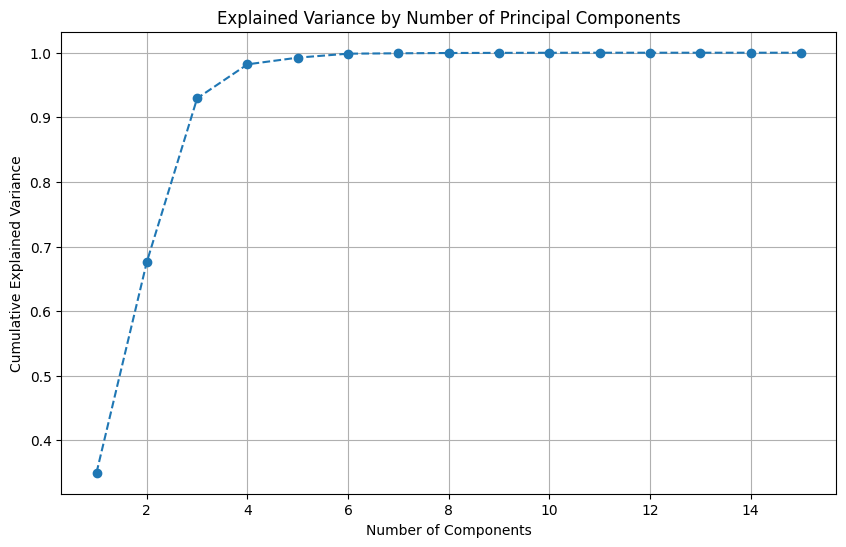

In [531]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

According to the plot above, number of components = 6 to retain 100% of the variance.

In [532]:
# Based on the plot, choose the number of components
pca = PCA(n_components=4) # 4 components
pca_features = pca.fit_transform(df[numerical_columns])

In [533]:
# Print the explained variance ratios of these components
print("Explained variance per component:", pca.explained_variance_ratio_)

Explained variance per component: [0.34984758 0.32632885 0.25322569 0.05262473]


The first component explains 35% of the variance.

The second component explains 32.63% of the variance.

The third component explains 25.32% of the variance.

The fourth component explains 5.2% of the variance.

Thr fifth component explains 1% of the variance.

The sixth component explains 0.6% of the variance.

In [534]:
# Convert PCA features into a DataFrame for better readability
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

In [535]:
# Concatenate PCA features back into the original dataframe
df = pd.concat([df, pca_df], axis=1)

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Loan_ID                                         610 non-null    object 
 1   Gender                                          610 non-null    object 
 2   Marital_Status                                  610 non-null    object 
 3   Number_of_Dependents                            610 non-null    int64  
 4   Education_Level                                 610 non-null    object 
 5   Independent_Worker                              610 non-null    object 
 6   Location                                        610 non-null    object 
 7   Term                                            610 non-null    int64  
 8   Credit_History                                  610 non-null    float64
 9   Approval_Status                            

**Step 3: Interpret and Visualise Components**

In [537]:
# Get the PCA component loadings
pca_loadings = pd.DataFrame(pca.components_, columns=numerical_columns, index=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

In [538]:
# Display the loadings for each principal component
print(pca_loadings)

      Applicant_Income_Log  Coapplicant_Income_Log  Amount_Requested_Log  Household_Income_Boxcox  Term_Boxcox  Applicant_Income_Log Coapplicant_Income_Log  Applicant_Income_Log Amount_Requested_Log  Applicant_Income_Log Household_Income_Boxcox  Applicant_Income_Log Term_Boxcox  Coapplicant_Income_Log Amount_Requested_Log  Coapplicant_Income_Log Household_Income_Boxcox  Coapplicant_Income_Log Term_Boxcox  Amount_Requested_Log Household_Income_Boxcox  Amount_Requested_Log Term_Boxcox  Household_Income_Boxcox Term_Boxcox
PCA1             -0.232825                0.416877              0.013506                 0.007211     0.099834                                     0.408968                                  -0.111629                                     -0.225323                          0.051404                                     0.411695                                        0.416694                            0.407274                                      0.013002                      

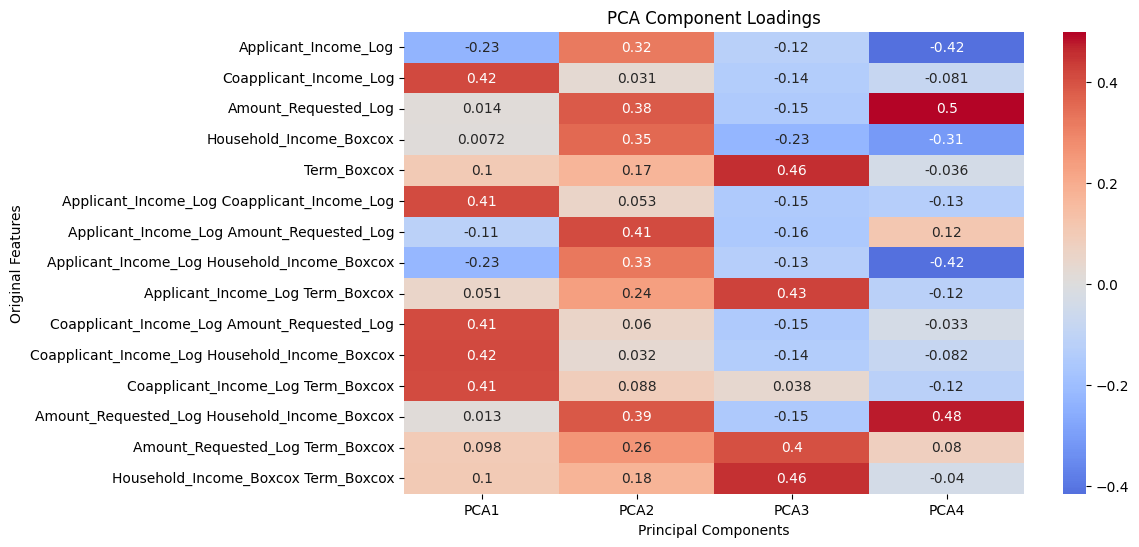

In [539]:
# Visualise loadings
plt.figure(figsize=(10, 6))
sns.heatmap(pca_loadings.T, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings')
plt.ylabel('Original Features')
plt.xlabel('Principal Components')
plt.show()

Component loadings summary:

PCA 1 loading:
* Applicant_Income_Log
* Amount_Requested_Log
* Household_Income_Boxcox
* Applicant_Amount_Requested_Interaction
* Applicant_Household_Interaction
* Amount_Household_Interaction

PCA 2 loading:
* Coaaplicant_Income_Log
* Amount_Requested_Log
* Household_Income_Boxcox
* Applicant_Coapplicant_Interaction
* Coapplicant_Amount_Requested_Interaction
* Coapplicant_Household_Interaction
* Amount_Household_Interaction

PCA 3 loading:
* Amount_Requested_Log
* Applicant_Amount_Requested_Interaction
* Amount_Household_Interaction

PCA 4 loading:
* Household_Income_Boxcox

Standardize the data: PCA is affected by the scale of the features, so
it's important to standardize the numerical columns.

Apply PCA: Start by specifying the number of components you want to keep. A good approach is to choose the number of components that explain a high percentage (e.g., 90-95%) of the variance.

Visualize: Plot the explained variance ratio to see how much variance is captured by each component.

Transform the data: Use PCA to reduce the dimensionality of your dataset based on the selected components.

## 3.4. Encoding and spliting data

**Encode variables accordingly to their types**

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Loan_ID                                         610 non-null    object 
 1   Gender                                          610 non-null    object 
 2   Marital_Status                                  610 non-null    object 
 3   Number_of_Dependents                            610 non-null    int64  
 4   Education_Level                                 610 non-null    object 
 5   Independent_Worker                              610 non-null    object 
 6   Location                                        610 non-null    object 
 7   Term                                            610 non-null    int64  
 8   Credit_History                                  610 non-null    float64
 9   Approval_Status                            

In [541]:
# 'Credit_History' as nominal variable
df['Credit_History'] = df['Credit_History'].astype(str)

In [542]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Define nominal, ordinal, and numerical columns
nominal_cols = ['Gender',
                'Marital_Status',
                'Education_Level',
                'Independent_Worker',
                'Location',
                'Credit_History']

ordinal_cols = ['Number_of_Dependents']

# Edit to choose different set of numerical variables
# 'Amount_Requested_Log', 'Household_Income_Boxcox', 'PCA1', 'PCA2', 'PCA3', 'PCA4',...
numerical_cols = ['PCA1', 'PCA2', 'PCA3', 'PCA4']

In [543]:
# Apply One-Hot Encoding for Nominal Variables
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
X_nominal_encoded = onehot_encoder.fit_transform(df[nominal_cols])

In [544]:
# Apply Label Encoding for Ordinal Variables
label_encoder = LabelEncoder()
X_ordinal_encoded = df[ordinal_cols].copy()  # Create a copy to avoid changing original DataFrame
for col in ordinal_cols:
    X_ordinal_encoded[col] = label_encoder.fit_transform(X_ordinal_encoded[col])

In [545]:
# Copy numerical variables
X_numerical = df[numerical_cols].copy()

In [546]:
# Convert all encoded/scaled features back to DataFrame
X_nominal_df = pd.DataFrame(X_nominal_encoded, columns=onehot_encoder.get_feature_names_out(nominal_cols))
X_ordinal_df = pd.DataFrame(X_ordinal_encoded, columns=ordinal_cols)

In [547]:
# Concatenate all features into one DataFrame
X_encoded = pd.concat([X_nominal_df, X_ordinal_df, X_numerical], axis=1)

In [548]:
# Print the first few rows of the final encoded data frame
print(X_encoded.head())

   Gender_Male  Marital_Status_Yes  Education_Level_Not Graduate  Independent_Worker_Yes  Location_Semiurban  Location_Urban  Credit_History_1.0  Number_of_Dependents      PCA1      PCA2      PCA3      PCA4
0          1.0                 1.0                           0.0                     0.0                 0.0             0.0                 1.0                     0 -3.671272 -0.002726 -4.308083  0.311463
1          1.0                 1.0                           0.0                     0.0                 0.0             0.0                 1.0                     2  2.176642 -1.495626  0.513913  0.295157
2          1.0                 1.0                           0.0                     0.0                 0.0             1.0                 1.0                     0  1.838160  0.740595 -0.341926 -0.735595
3          1.0                 0.0                           1.0                     0.0                 0.0             1.0                 1.0                     0 -2.61

In [549]:
# Define your the variable
y = df['Approval_Status']

In [550]:
# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

**Split the data**

In [551]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [552]:
# Check training and testing datasets
print('Shape of training datasets:', X_train.shape, y_train.shape)
print('Shape of testing datasets:', X_test.shape, y_test.shape)

Shape of training datasets: (488, 12) (488,)
Shape of testing datasets: (122, 12) (122,)


# 4. Model Training and Evaluation

**Approach**

Methods and models comparision:

## 4.1. Incorporation of Naive Bayes and SVM

In [336]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import KFold

In [337]:
# Define models and methods
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Bagging': BaggingClassifier(DecisionTreeClassifier(), n_estimators=100),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, algorithm='SAMME')
}

In [338]:
# Define the evaluation function
def evaluate_model(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate ROC curve
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    return (model_name, accuracy, precision, recall, f1, roc_auc, fpr, tpr)

In [339]:
from sklearn.model_selection import KFold

# K-Fold Cross-Validation and model evaluation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store performance metrics
results = []

for model_name, model in models.items():
    for train_index, test_index in kf.split(X_encoded):
        # Use iloc to index DataFrame by integer position for X_encoded
        X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]

        # Standard indexing for y_encoded (NumPy array)
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Evaluate the model and collect results
        model_results = evaluate_model(model_name, model, X_test, y_test)
        results.append(model_results)

In [340]:
# Create DataFrame for Results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'FPR', 'TPR'])

In [341]:
print(results_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      45 non-null     object 
 1   Accuracy   45 non-null     float64
 2   Precision  45 non-null     float64
 3   Recall     45 non-null     float64
 4   F1 Score   45 non-null     float64
 5   AUC        45 non-null     float64
 6   FPR        45 non-null     object 
 7   TPR        45 non-null     object 
dtypes: float64(5), object(3)
memory usage: 2.9+ KB
None


In [342]:
# Filter to include only numeric columns
numeric_columns = results_df.select_dtypes(include=['float64']).columns
# Aggregate results to get the mean values
summary_results = results_df.groupby('Model')[numeric_columns].mean().reset_index()
print(summary_results)

                    Model  Accuracy  Precision    Recall  F1 Score       AUC
0                AdaBoost  0.813115   0.810813  0.951983  0.874105  0.793116
1                 Bagging  0.803279   0.819515  0.918181  0.863950  0.813073
2           Decision Tree  0.732787   0.809370  0.797488  0.802500  0.692144
3    Gaussian Naive Bayes  0.804918   0.795832  0.963937  0.870803  0.750914
4       Gradient Boosting  0.809836   0.814650  0.937558  0.870571  0.792419
5     K-Nearest Neighbors  0.711475   0.731043  0.916275  0.812344  0.665703
6     Logistic Regression  0.809836   0.792601  0.980662  0.875984  0.766419
7           Random Forest  0.814754   0.815299  0.946968  0.874776  0.808981
8  Support Vector Machine  0.791803   0.779066  0.973595  0.864703  0.736844


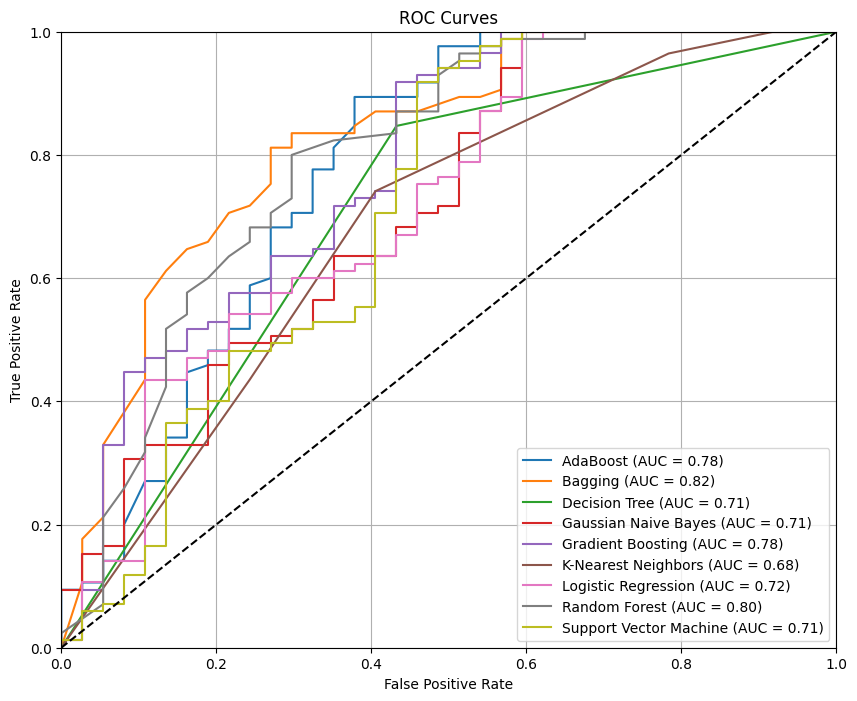

In [343]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))

for model_name in summary_results['Model']:
    # Extract FPR and TPR for each model
    fpr = results_df[results_df['Model'] == model_name]['FPR'].values[0]
    tpr = results_df[results_df['Model'] == model_name]['TPR'].values[0]
    roc_auc = results_df[results_df['Model'] == model_name]['AUC'].values[0]

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Customize the ROC plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## 4.2a. Hyperparameter tuning

**Initial tuning to get the best parameters and CV score for models**

In [350]:
# Import libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [345]:
# Hyperparameter tuning using GridSearchCV

def hypertune_models(X_train, y_train):
    # Define hyperparameter grids for each model
    param_grids = {
        "KNN": {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # 1: Manhattan, 2: Euclidean
        },
        "Decision Tree": {
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        },
        "Random Forest": {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        },
        "Logistic Regression": {
            'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
            'solver': ['liblinear', 'lbfgs'],  # 'lbfgs' for multi-class problems
            'max_iter': [100, 200, 300]
        },
        "Gaussian Naive Bayes": {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        },
        "Support Vector Machine": {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        },
        "Gradient Boosting": {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        },
        "AdaBoost": {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        },
        "Bagging": {
            'n_estimators': [10, 50, 100],
            'max_samples': [0.5, 1.0],
            'max_features': [0.5, 1.0]
        }
    }

    # Models to tune
    models = {
        "KNN": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Logistic Regression": LogisticRegression(),
        "Gaussian Naive Bayes": GaussianNB(),
        "Support Vector Machine": SVC(probability=True),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(n_estimators=100, algorithm='SAMME'),
        "Bagging": BaggingClassifier()
    }

    best_models = {}

    # Loop over each model and perform GridSearchCV
    for model_name, model in models.items():
        print(f"Hypertuning {model_name}...")
        grid_search = GridSearchCV(
            model,
            param_grids[model_name],
            cv=5,  # 5-fold cross-validation
            scoring='accuracy',
            n_jobs=-1,  # Use all available processors
            verbose=1  # Print progress
        )
        grid_search.fit(X_train, y_train)

        # Save the best model with optimal hyperparameters
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best CV score for {model_name}: {grid_search.best_score_:.4f}\n")

    return best_models

In [346]:
# Call the hypertuning function
best_models = hypertune_models(X_train, y_train)

Hypertuning KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best CV score for KNN: 0.7254

Hypertuning Decision Tree...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best CV score for Decision Tree: 0.8053

Hypertuning Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best CV score for Random Forest: 0.8237

Hypertuning Logistic Regression...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
Best CV score for Logistic Regression: 0.8073

Hypertuning Gaussian Naive Bayes...
Fitting 5 folds for each of 3 candida

In [347]:
!pip install scipy

In [348]:
# Function to perform RandomizedSearchCV
def randomized_search_models(X_train, y_train):
    # Define parameter distributions for RandomizedSearchCV
    param_distributions = {
        "KNN": {
            'n_neighbors': stats.randint(3, 10),  # Randomly choose neighbors between 3 and 10
            'weights': ['uniform', 'distance'],
            'p': stats.randint(1, 3)  # Randomly choose Manhattan (1) or Euclidean (2)
        },
        "Decision Tree": {
            'max_depth': [5, 10, 15, None],
            'min_samples_split': stats.randint(2, 11),
            'min_samples_leaf': stats.randint(1, 5),
            'criterion': ['gini', 'entropy']
        },
        "Random Forest": {
            'n_estimators': stats.randint(100, 500),  # Number of trees
            'max_depth': [10, 20, 30, None],
            'min_samples_split': stats.randint(2, 11),
            'min_samples_leaf': stats.randint(1, 5)
        },
        "Logistic Regression": {
            'C': stats.loguniform(0.01, 100),  # Random log scale for C
            'solver': ['liblinear', 'lbfgs'],
            'max_iter': [100, 200, 300]
        },
        "Gaussian Naive Bayes": {
            'var_smoothing': stats.loguniform(1e-9, 1e-7)  # Variance smoothing
        },
        "Support Vector Machine": {
            'C': stats.loguniform(0.1, 100),
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        },
        "Gradient Boosting": {
            'n_estimators': stats.randint(50, 200),  # Number of boosting stages
            'learning_rate': stats.loguniform(0.01, 0.2),  # Learning rate
            'max_depth': stats.randint(3, 10)
        },
        "AdaBoost": {
            'n_estimators': stats.randint(50, 200),  # Number of estimators
            'learning_rate': stats.loguniform(0.01, 1)
        },
        "Bagging": {
            'n_estimators': stats.randint(10, 100),  # Number of base estimators
            'max_samples': stats.uniform(0.5, 0.5),  # Sample fraction
            'max_features': stats.uniform(0.5, 0.5)  # Feature fraction
        }
    }

    # Models to tune
    models = {
        "KNN": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Logistic Regression": LogisticRegression(),
        "Gaussian Naive Bayes": GaussianNB(),
        "Support Vector Machine": SVC(probability=True),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
        "Bagging": BaggingClassifier()
    }

    best_random_models = {}

    # Loop over each model and perform RandomizedSearchCV
    for model_name, model in models.items():
        print(f"RandomizedSearchCV for {model_name}...")
        random_search = RandomizedSearchCV(
            model,
            param_distributions[model_name],
            n_iter=50,  # Number of random combinations to try
            cv=5,  # 5-fold cross-validation
            scoring='accuracy',
            n_jobs=-1,  # Use all available processors
            verbose=1,  # Print progress
            random_state=42
        )
        random_search.fit(X_train, y_train)

        # Save the best model
        best_random_models[model_name] = random_search.best_estimator_
        print(f"Best parameters for {model_name}: {random_search.best_params_}")
        print(f"Best CV score for {model_name}: {random_search.best_score_:.4f}\n")

    return best_random_models

In [351]:
# Call the randomized search function
best_random_models = randomized_search_models(X_train, y_train)

RandomizedSearchCV for KNN...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best CV score for KNN: 0.7254

RandomizedSearchCV for Decision Tree...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 4}
Best CV score for Decision Tree: 0.8073

RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 230}
Best CV score for Random Forest: 0.8216

RandomizedSearchCV for Logistic Regression...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Logistic Regression: {'C': 0.31489116479568624, 'max_iter': 100, 'solver': 'liblinear'}
Best CV score for Logistic Regression: 0.8094

RandomizedS

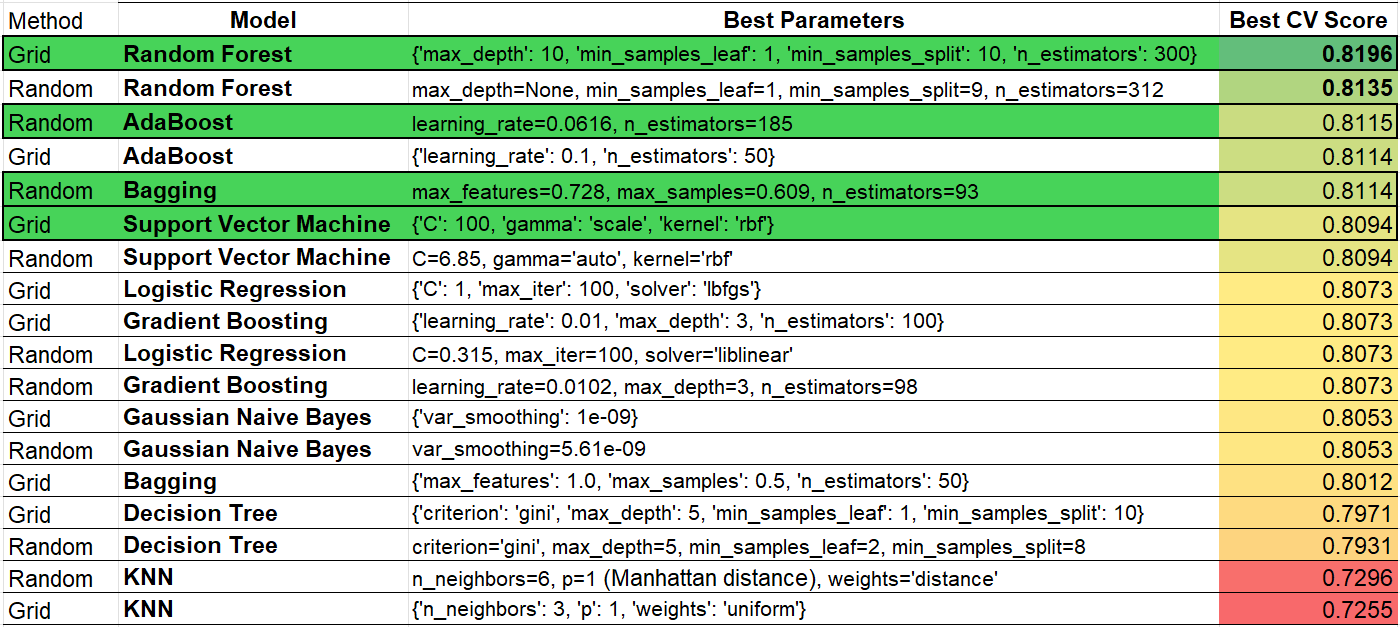

**Applying parameters back to models to train and evaluate again**

Random Forest (Grid Search) achieved the highest CV score (0.8196), followed closely by the Random Forest (Random Search) with a score of 0.8135. Furthermore, AdaBoost (Random Search) and Bagging (Random Search) both had strong performances, scoring 0.8115 and 0.8114, respectively.

Random Forest, Support Vector Machine (SVM), and Logistic Regression achieved similar scores across both search methods, indicating stability in these models. Furthermore, AdaBoost and Gradient Boosting also showed similar performance but with slight differences in parameters, suggesting they are both reliable but sensitive to parameter tuning.

Decision on model selection for testing on test set:
* **Random Forest (Grid Search)**: best overall
* **AdaBoost (Random Search)**: higher performance and consistency
* **Bagging (Random Search)**: higher performance and consistency
* **Support Vector Machine (SVM)**: high performance and consistency in both methods


In [352]:
# Import Libraries
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import KFold

In [353]:
# Define models and methods
models = {
    'Random Forest': RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300),
    'Support Vector Machine': SVC(C=100, gamma='scale', kernel='rbf', probability=True),
    'Bagging': BaggingClassifier(max_features=0.728, max_samples=0.609, n_estimators=93),
    'AdaBoost': AdaBoostClassifier(learning_rate=0.0616, n_estimators=185, algorithm='SAMME')
}

In [354]:
from sklearn.model_selection import KFold

# K-Fold Cross-Validation and model evaluation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store performance metrics
results = []

for model_name, model in models.items():
    for train_index, test_index in kf.split(X_encoded):
        # Use iloc to index DataFrame by integer position for X_encoded
        X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]

        # Standard indexing for y_encoded (NumPy array)
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Evaluate the model and collect results
        model_results = evaluate_model(model_name, model, X_test, y_test)
        results.append(model_results)

In [355]:
# Create DataFrame for Results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'FPR', 'TPR'])

In [356]:
print(results_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      20 non-null     object 
 1   Accuracy   20 non-null     float64
 2   Precision  20 non-null     float64
 3   Recall     20 non-null     float64
 4   F1 Score   20 non-null     float64
 5   AUC        20 non-null     float64
 6   FPR        20 non-null     object 
 7   TPR        20 non-null     object 
dtypes: float64(5), object(3)
memory usage: 1.4+ KB
None


In [357]:
# Filter to include only numeric columns
numeric_columns = results_df.select_dtypes(include=['float64']).columns
# Aggregate results to get the mean values
summary_results = results_df.groupby('Model')[numeric_columns].mean().reset_index()
print(summary_results)

                    Model  Accuracy  Precision    Recall  F1 Score       AUC
0                AdaBoost  0.808197   0.789756  0.983043  0.875272  0.781326
1                 Bagging  0.811475   0.810508  0.946834  0.872681  0.812733
2           Random Forest  0.814754   0.810335  0.954440  0.875626  0.808682
3  Support Vector Machine  0.749180   0.796788  0.852740  0.821286  0.702628


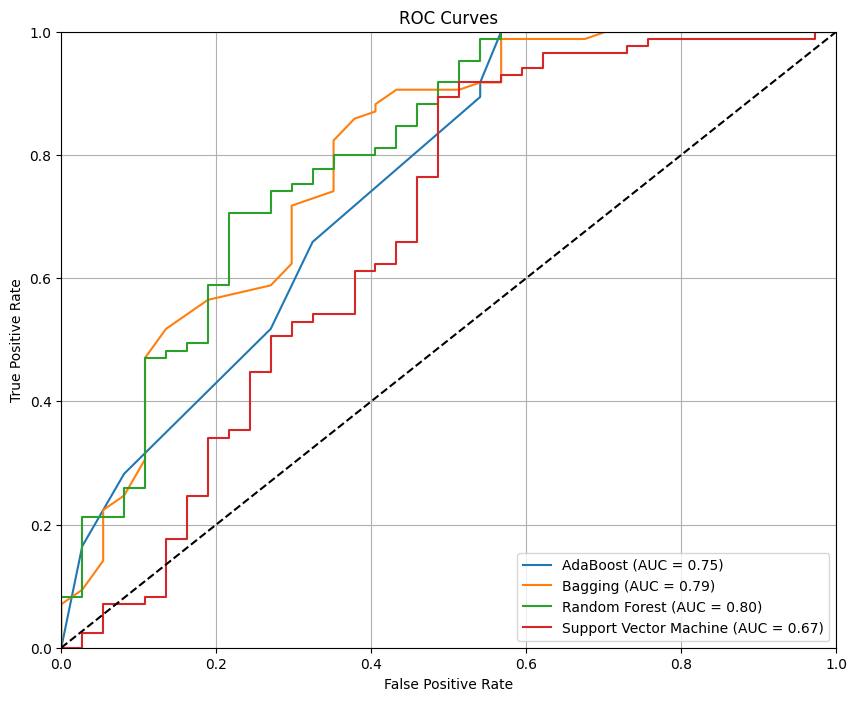

In [358]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))

for model_name in summary_results['Model']:
    # Extract FPR and TPR for each model
    fpr = results_df[results_df['Model'] == model_name]['FPR'].values[0]
    tpr = results_df[results_df['Model'] == model_name]['TPR'].values[0]
    roc_auc = results_df[results_df['Model'] == model_name]['AUC'].values[0]

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Customize the ROC plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

* Random Forest (AUC = 0.8)

* Parameters: max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300

## 4.2b. Feature importance extraction

In [359]:
# Store performance metrics
results = []
feature_importances = []

In [360]:
for model_name, model in models.items():
    if model_name == 'Random Forest':
        print(f"\nTraining and evaluating {model_name} with feature importance extraction...")

    for train_index, test_index in kf.split(X_encoded):
        # Use iloc to index DataFrame by integer position for X_encoded
        X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Evaluate the model and collect results
        model_results = evaluate_model(model_name, model, X_test, y_test)
        results.append(model_results)

        # Extract feature importance specifically for Random Forest
        if model_name == 'Random Forest':
            importances = model.feature_importances_
            feature_importances.append(importances)


Training and evaluating Random Forest with feature importance extraction...


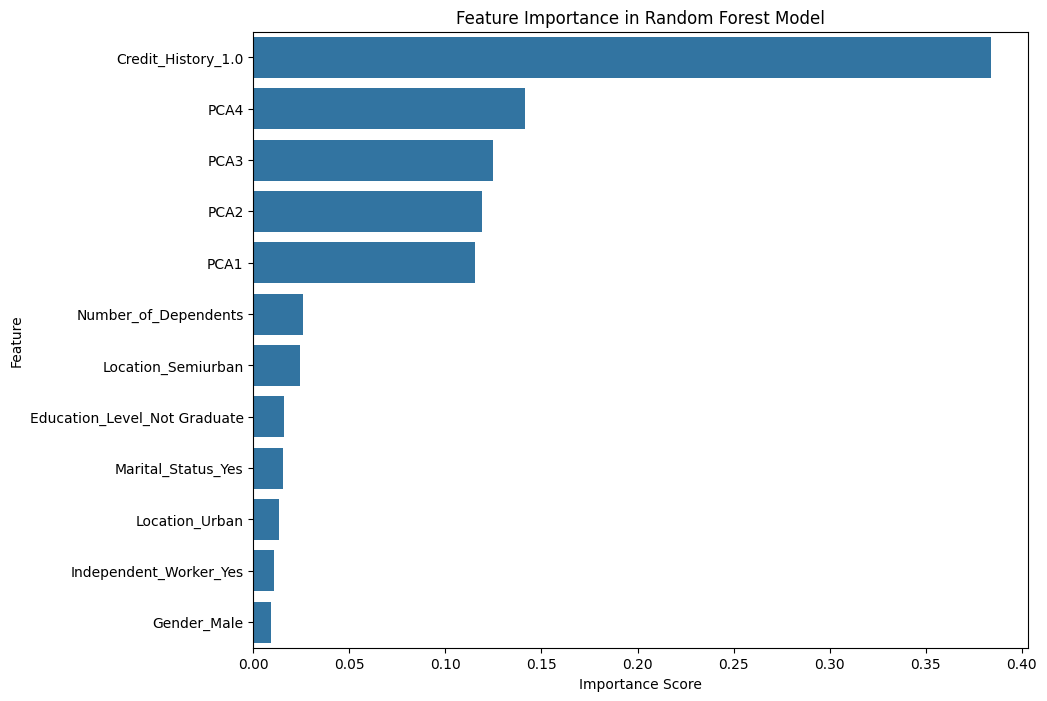

In [361]:
# Create a DataFrame for feature importances if Random Forest was used
if feature_importances:
    feature_importance_df = pd.DataFrame(feature_importances, columns=X_encoded.columns).mean().sort_values(ascending=False)
    feature_importance_df = feature_importance_df.reset_index().rename(columns={'index': 'Feature', 0: 'Importance'})

    # Plot feature importances for Random Forest
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance in Random Forest Model')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()

In [363]:
import sklearn
print(sklearn.__version__)

1.5.2


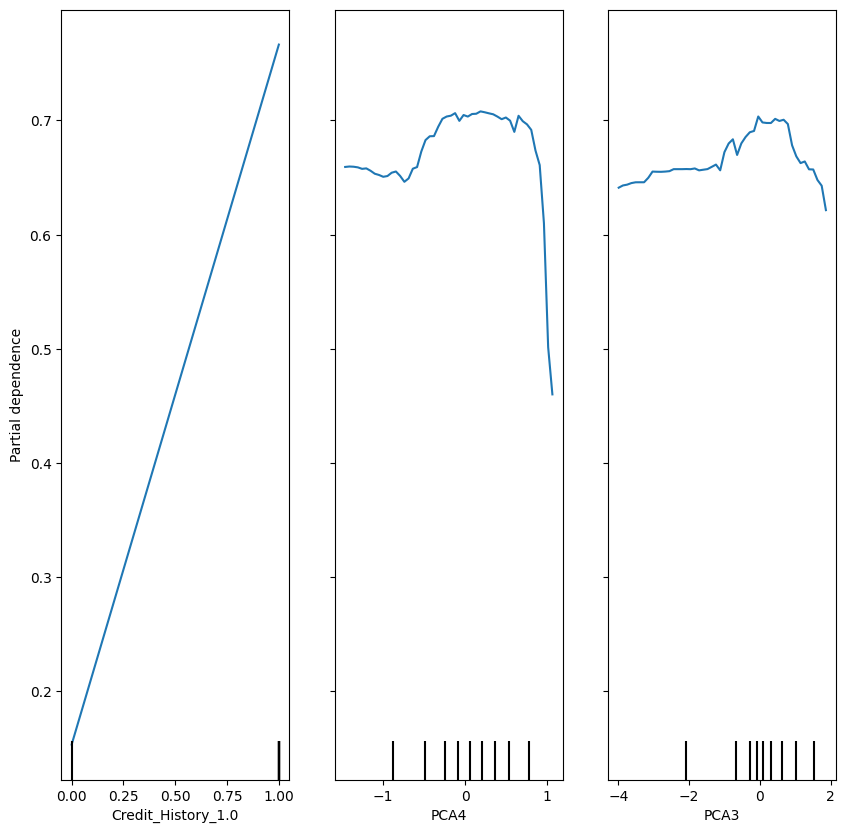

In [364]:
# Partial Dependence Plots (Random Forest)
from sklearn.inspection import PartialDependenceDisplay

# Assuming `feature_importance_df` has a column 'Feature' with names of the top features
top_features = feature_importance_df['Feature'][:3].tolist()  # Top 3 important features
fig, ax = plt.subplots(figsize=(10, 10))

# Use PartialDependenceDisplay to plot the partial dependence plots
PartialDependenceDisplay.from_estimator(models['Random Forest'], X_train, features=top_features, grid_resolution=50, ax=ax)
plt.show()

In [365]:
# Rule Extraction for Decision Paths (Random Forest)
from sklearn.tree import export_text

# Extract rules from a single tree (e.g., the first tree in the forest)
tree_rules = export_text(models['Random Forest'].estimators_[0], feature_names=list(X_encoded.columns))
print(tree_rules)

|--- Credit_History_1.0 <= 0.50
|   |--- class: 0.0
|--- Credit_History_1.0 >  0.50
|   |--- PCA3 <= 7.50
|   |   |--- PCA3 <= -0.54
|   |   |   |--- PCA3 <= -0.64
|   |   |   |   |--- PCA2 <= 2.67
|   |   |   |   |   |--- Number_of_Dependents <= 2.50
|   |   |   |   |   |   |--- Independent_Worker_Yes <= 0.50
|   |   |   |   |   |   |   |--- PCA3 <= -0.76
|   |   |   |   |   |   |   |   |--- PCA2 <= -3.56
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- PCA2 >  -3.56
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- PCA3 >  -0.76
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Independent_Worker_Yes >  0.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Number_of_Dependents >  2.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- PCA2 >  2.67
|   |   |   |   |   |--- Independent_Worker_Yes <= 0.50
|   |   |   |   |   |   |--- PCA1 <= 2.50
|   |   | 

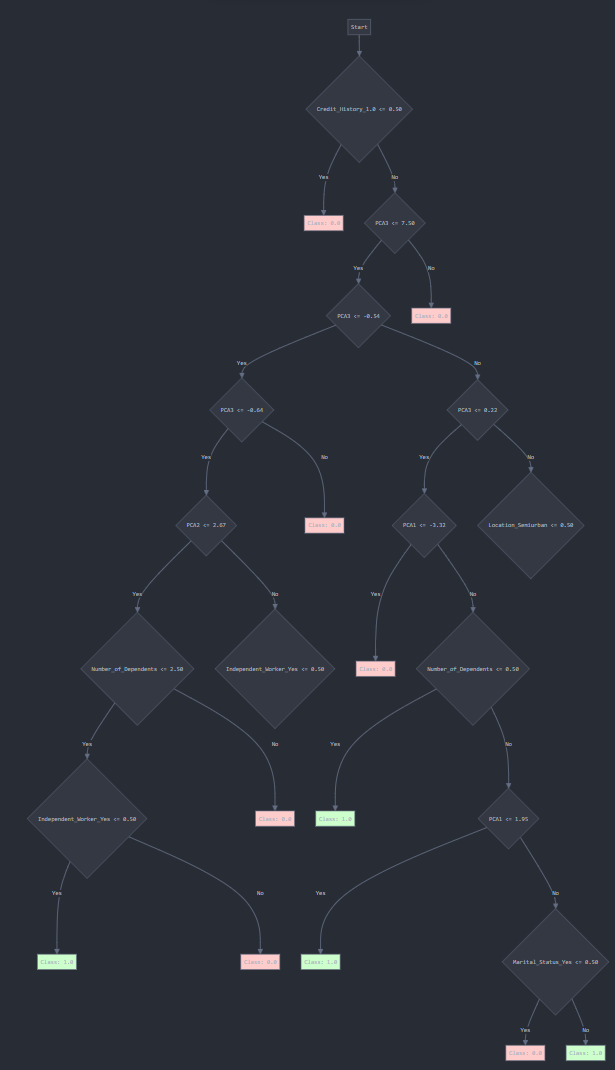

In [ ]:
# SHAP Analysis for Feature Influence
import shap

# Create a SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(models['Random Forest'])
shap_values = explainer.shap_values(X_test)

In [370]:
print(shap_values)

[[[ 2.46810700e-04 -2.46810700e-04]
  [-4.31837663e-03  4.31837663e-03]
  [-2.03172238e-03  2.03172238e-03]
  ...
  [-3.78855743e-02  3.78855743e-02]
  [-3.53907194e-02  3.53907194e-02]
  [-3.41139978e-02  3.41139978e-02]]

 [[ 2.59505902e-03 -2.59505902e-03]
  [-1.72151669e-02  1.72151669e-02]
  [-3.61279680e-03  3.61279680e-03]
  ...
  [ 7.53686776e-02 -7.53686776e-02]
  [ 4.24558041e-02 -4.24558041e-02]
  [ 3.42453641e-03 -3.42453641e-03]]

 [[-7.56392653e-03  7.56392653e-03]
  [ 4.07431061e-03 -4.07431061e-03]
  [-1.07386824e-03  1.07386824e-03]
  ...
  [-5.08007620e-03  5.08007620e-03]
  [ 3.39403863e-03 -3.39403863e-03]
  [-7.69450859e-03  7.69450859e-03]]

 ...

 [[-6.33604227e-03  6.33604227e-03]
  [ 1.51576738e-02 -1.51576738e-02]
  [-7.77286454e-03  7.77286454e-03]
  ...
  [-1.67567840e-02  1.67567840e-02]
  [ 3.23324756e-02 -3.23324756e-02]
  [ 2.91107655e-01 -2.91107655e-01]]

 [[ 4.60901497e-04 -4.60901497e-04]
  [-1.05018342e-02  1.05018342e-02]
  [ 6.51960029e-03 -6.5196

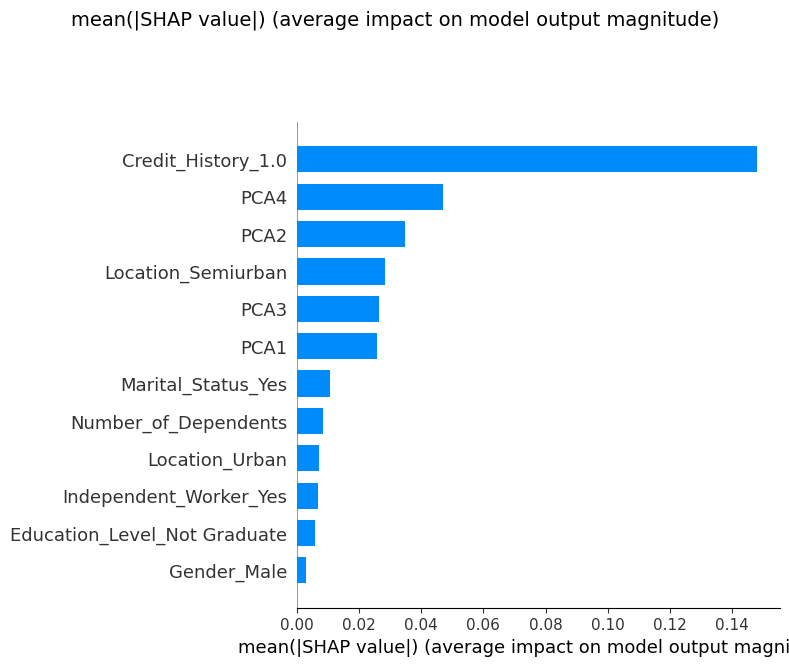

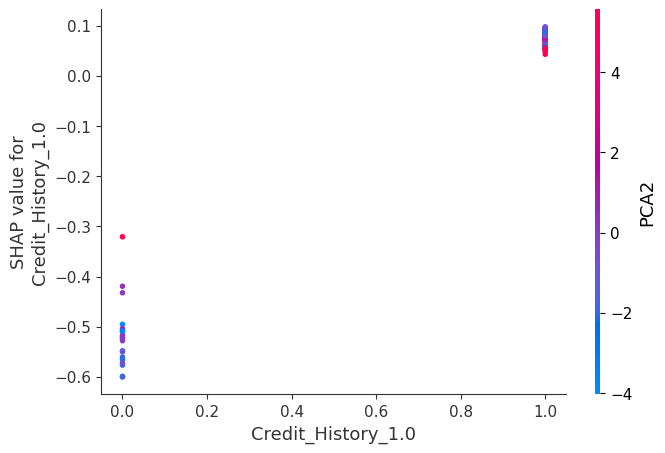

In [380]:
# Set a larger figure size and add padding to accommodate the full title
fig = plt.figure(figsize=(18, 8))  # Increase width as needed

# Plot SHAP summary without title to avoid cropping
shap.summary_plot(shap_values[:,:,1], X_test, plot_type="bar", show=False)

# Set a custom title outside the plot's main axis
fig.suptitle("mean(|SHAP value|) (average impact on model output magnitude)",
             x=0.5, y=1.05, fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to leave space for title
plt.show()

# SHAP dependence plot for a single feature (the top feature)
shap.dependence_plot(top_features[0], shap_values[:,:,1], X_test)


## 4.3. Unsupervised Learning Insights

**Initial data preparation**

### 4.3.1. Customer base segmentation and cluster characteristics analysis using K-Means Clustering

**Focus:** K-Means clustering primarily works with numerical data and relies on distance metrics.

**Approach:**
Include only numerical features: For K-Means clustering, you should exclude categorical variables (including Loan Approval Status) unless they are encoded into numerical format.

**Standardization:** Consider standardizing numerical features to ensure that all features contribute equally to the distance calculations.

**Outcome:** Analyze the characteristics of the resulting clusters using summary statistics of the numerical features.

In [688]:
# Identify numerical variables
numerical_variables = ['Applicant_Income_Log', 'Coapplicant_Income_Log', 'Amount_Requested_Log', 'Term_Boxcox', 'Household_Income_Boxcox', 'Debt_to_Income']

In [689]:
# Standardised numerical variables
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize the numerical variables
df_scaled = scaler.fit_transform(df[numerical_variables])

# Convert back to a DataFrame for easier readability
df_scaled = pd.DataFrame(df_scaled, columns=numerical_variables)

# Display the scaled data (optional)
print("Scaled numerical variables:\n", df_scaled.head())

Scaled numerical variables:
    Applicant_Income_Log  Coapplicant_Income_Log  Amount_Requested_Log  Term_Boxcox  Household_Income_Boxcox  Debt_to_Income
0              1.235657               -1.104704              0.773632    -2.307121                 0.957876        0.442216
1             -1.115523                0.802555             -0.470723     0.176664                -0.888885       -0.000976
2              0.191886                0.896573              0.002403     0.176664                 0.500439       -0.338522
3             -0.671933               -1.104704             -1.568936    -2.307121                -1.679139        0.541862
4             -0.521861                0.995396             -1.673178    -2.307121                 0.319884       -0.364902


Standardizing helps bring all variables to a similar scale, which is important for K-Means as it uses Euclidean distance to form clusters.

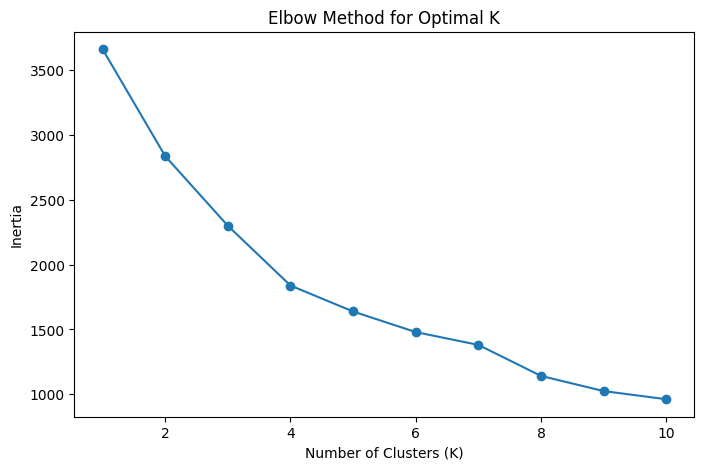

In [690]:
# Determine optimal k parameter with Elbow method
from sklearn.cluster import KMeans

# Calculate the within-cluster sum of squares (inertia) for a range of K values
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

There are two points where the inertia drops sharply, at k=3 and at k=4. However, k=4 is suitable to ensure the model complexity and the ratio of explained variance.

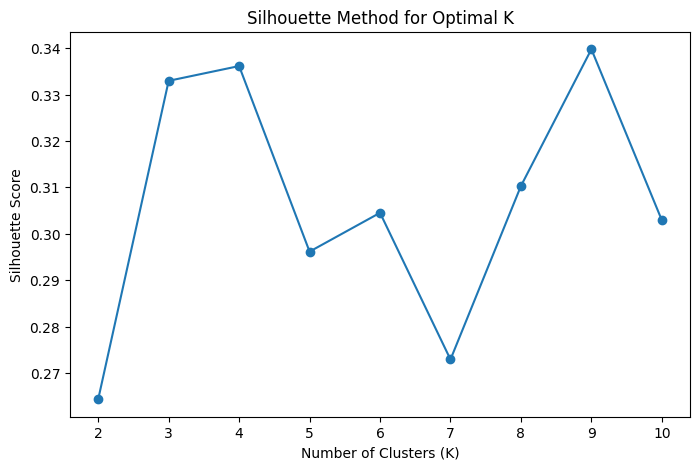

K = 2, Silhouette Score = 0.2644
K = 3, Silhouette Score = 0.3329
K = 4, Silhouette Score = 0.3361
K = 5, Silhouette Score = 0.2962
K = 6, Silhouette Score = 0.3045
K = 7, Silhouette Score = 0.2729
K = 8, Silhouette Score = 0.3103
K = 9, Silhouette Score = 0.3398
K = 10, Silhouette Score = 0.3029


In [691]:
# # Determine optimal k parameter with Silhouette  method
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different values of K
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette scores for each K value
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.show()

# Display the silhouette scores
for k, score in zip(K_range, silhouette_scores):
    print(f"K = {k}, Silhouette Score = {score:.4f}")


**Definitely, it has to be k=4.**

In [692]:
# Apply K-Means with the chosen number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the cluster assignments
print("Cluster Assignments:\n", df['Cluster'].value_counts())

Cluster Assignments:
 Cluster
0    289
1    173
2    145
3      3
Name: count, dtype: int64


In [725]:
# Calculate the mean of each feature per cluster
cluster_stats = df.groupby('Cluster')[['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested', 'Term', 'Debt_to_Income']].mean()
print("Cluster Characteristics:\n", cluster_stats)

Cluster Characteristics:
          Applicant_Income  Coapplicant_Income  Amount_Requested        Term  Debt_to_Income
Cluster                                                                                    
0             3230.643599         2815.470588        133.458478  345.301038       22.093109
1             3803.624277           36.468208         96.638728  347.167630       23.035698
2            11726.572414         1149.351724        230.103448  336.993103       19.735680
3             3822.333333          951.333333        115.333333   28.000000      313.780893


In [694]:
# List of categorical variables in  dataframe
categorical_features = ['Gender', 'Marital_Status', 'Education_Level', 'Independent_Worker', 'Location', 'Credit_History', 'Number_of_Dependents']

# Create an empty DataFrame to store results
categorical_summary = {}

# Loop through categorical features and calculate counts per cluster
for feature in categorical_features:
    counts = df.groupby('Cluster')[feature].value_counts().unstack(fill_value=0)
    categorical_summary[feature] = counts

# Display the summary for each categorical variable
for feature, counts in categorical_summary.items():
    print(f"Counts for {feature}:\n{counts}\n")


Counts for Gender:
Gender   Female  Male
Cluster              
0            35   254
1            57   116
2            19   126
3             1     2

Counts for Marital_Status:
Marital_Status   No  Yes
Cluster                 
0                62  227
1               103   70
2                45  100
3                 2    1

Counts for Education_Level:
Education_Level  Graduate  Not Graduate
Cluster                                
0                     211            78
1                     133            40
2                     132            13
3                       2             1

Counts for Independent_Worker:
Independent_Worker   No  Yes
Cluster                     
0                   264   25
1                   155   18
2                   106   39
3                     3    0

Counts for Location:
Location  Rural  Semiurban  Urban
Cluster                          
0            86        112     91
1            47         70     56
2            44         49     52
3   

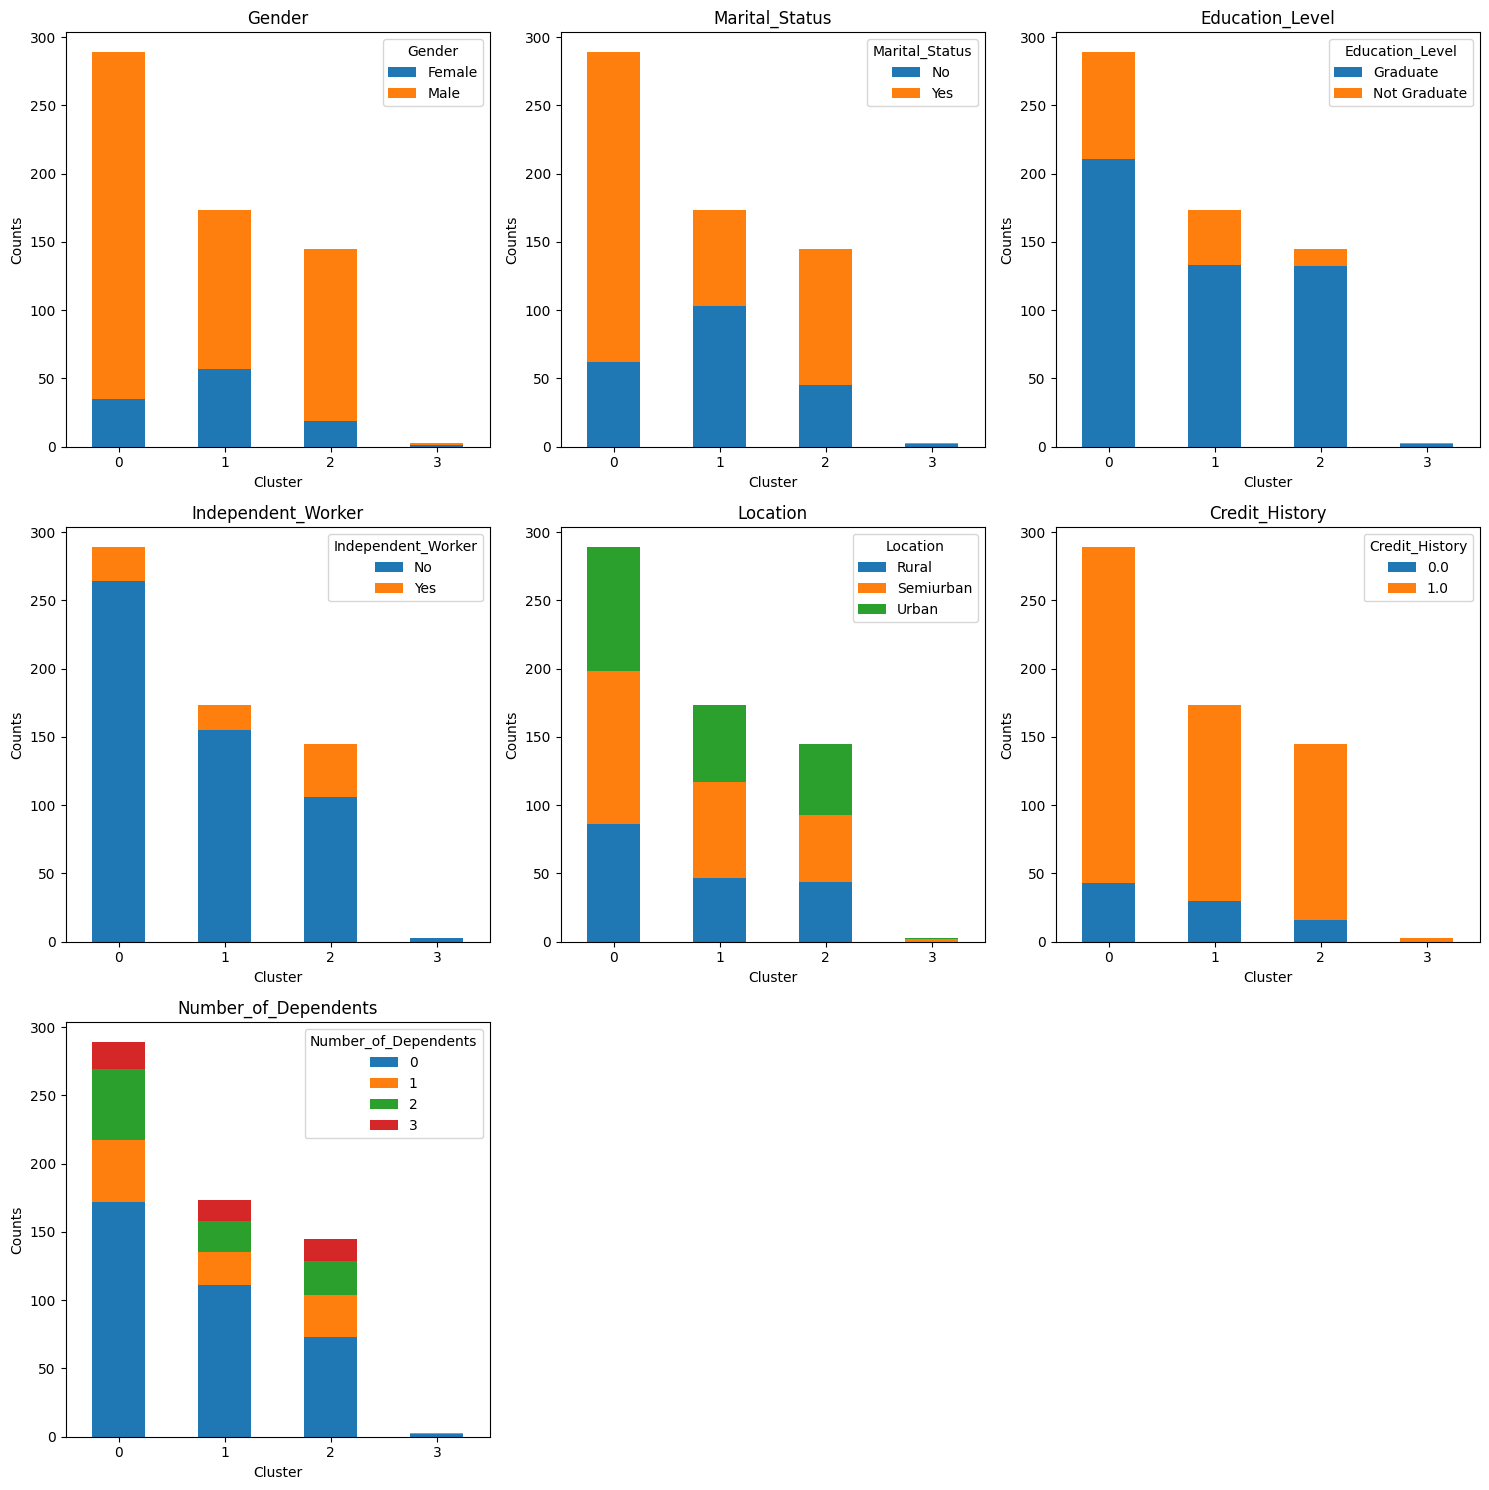

In [695]:
# Adjust rows and columns to fit all categorical features
rows = (len(categorical_features) + 2) // 3  # +2 rounds up the row count
plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(categorical_features):
    plt.subplot(rows, 3, i + 1)
    counts = df.groupby('Cluster')[feature].value_counts().unstack(fill_value=0)
    counts.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(feature)
    plt.xlabel('Cluster')
    plt.ylabel('Counts')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [696]:
from scipy.stats import chi2_contingency

# Loop through categorical variables and perform chi-square tests
for feature in categorical_features:
    contingency_table = pd.crosstab(df['Cluster'], df[feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {feature}: Chi2 = {chi2:.2f}, p-value = {p:.4f}\n")

Chi-square test for Gender: Chi2 = 35.21, p-value = 0.0000

Chi-square test for Marital_Status: Chi2 = 71.64, p-value = 0.0000

Chi-square test for Education_Level: Chi2 = 19.08, p-value = 0.0003

Chi-square test for Independent_Worker: Chi2 = 30.10, p-value = 0.0000

Chi-square test for Location: Chi2 = 3.42, p-value = 0.7543

Chi-square test for Credit_History: Chi2 = 3.05, p-value = 0.3835

Chi-square test for Number_of_Dependents: Chi2 = 10.39, p-value = 0.3202



In [697]:
# Profile categorical variables
# List of significant categorical variables (based on chi-square test results)
significant_categorical_features = ['Gender', 'Marital_Status', 'Education_Level', 'Independent_Worker', 'Number_of_Dependents']

# Loop through each categorical variable and display the distribution within each cluster
for feature in significant_categorical_features:
    print(f"\nDistribution of {feature} across clusters:\n")
    print(df.groupby('Cluster')[feature].value_counts(normalize=True).unstack())


Distribution of Gender across clusters:

Gender     Female      Male
Cluster                    
0        0.121107  0.878893
1        0.329480  0.670520
2        0.131034  0.868966
3        0.333333  0.666667

Distribution of Marital_Status across clusters:

Marital_Status        No       Yes
Cluster                           
0               0.214533  0.785467
1               0.595376  0.404624
2               0.310345  0.689655
3               0.666667  0.333333

Distribution of Education_Level across clusters:

Education_Level  Graduate  Not Graduate
Cluster                                
0                0.730104      0.269896
1                0.768786      0.231214
2                0.910345      0.089655
3                0.666667      0.333333

Distribution of Independent_Worker across clusters:

Independent_Worker        No       Yes
Cluster                               
0                   0.913495  0.086505
1                   0.895954  0.104046
2                   0.731034 

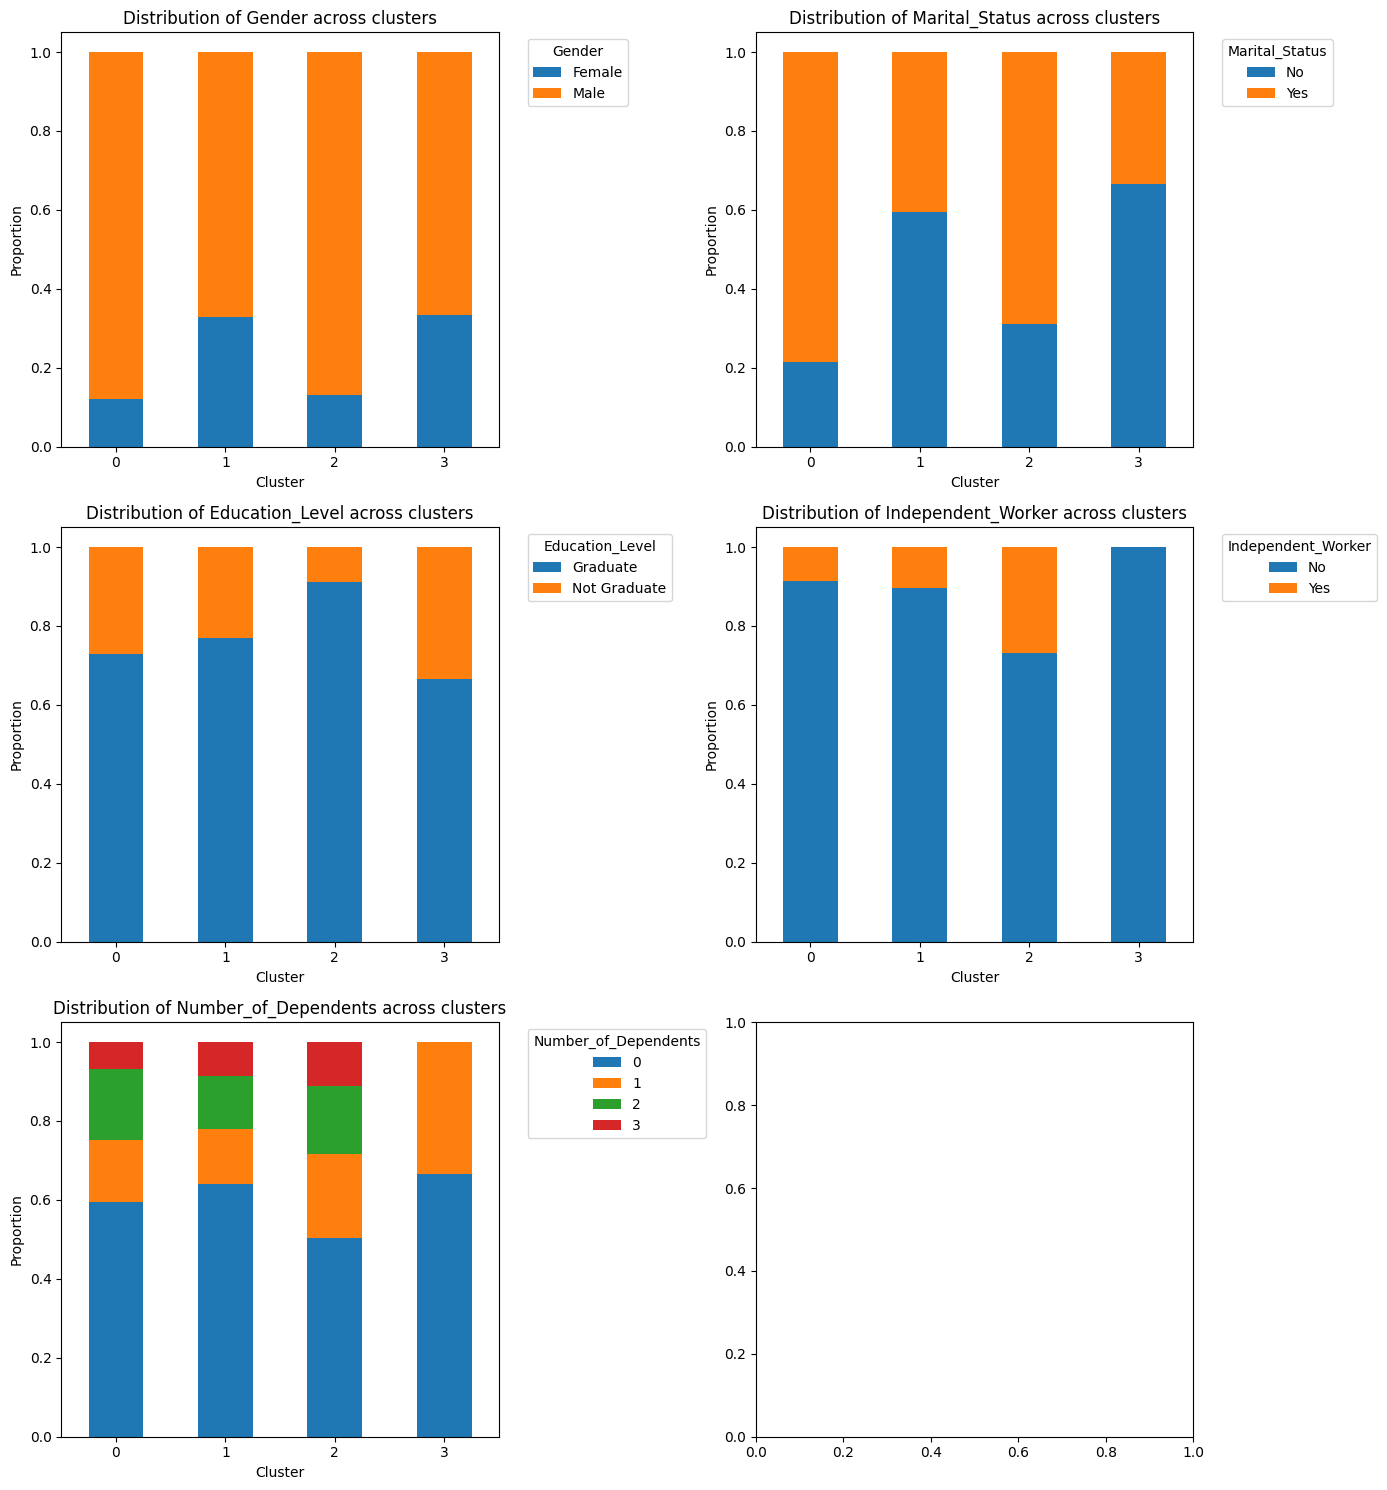

In [698]:
import math

# Set up the figure size dynamically based on the number of features
num_features = len(significant_categorical_features)
fig, axes = plt.subplots(math.ceil(num_features / 2), 2, figsize=(14, 5 * math.ceil(num_features / 2)))

# Flatten the axes array for easy iteration if it is multidimensional
axes = axes.flatten() if num_features > 1 else [axes]

# Loop through each feature and plot the normalized distribution within each cluster
for i, feature in enumerate(significant_categorical_features):
    ax = axes[i]
    distribution = df.groupby('Cluster')[feature].value_counts(normalize=True).unstack()
    distribution.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f"Distribution of {feature} across clusters")
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Proportion")
    ax.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # Set x-tick labels straight

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


***Need visualization**

In [726]:
# Profile categorical variables
# List of numerical variables
numerical_features = ['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested', 'Term', 'Household_Income', 'Debt_to_Income']

# Calculate the mean of each numerical variable within each cluster
cluster_profile_numerical = df.groupby('Cluster')[['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested', 'Term', 'Debt_to_Income']].mean()
print("\nMean values of numerical variables across clusters:\n", cluster_profile_numerical)


Mean values of numerical variables across clusters:
          Applicant_Income  Coapplicant_Income  Amount_Requested        Term  Debt_to_Income
Cluster                                                                                    
0             3230.643599         2815.470588        133.458478  345.301038       22.093109
1             3803.624277           36.468208         96.638728  347.167630       23.035698
2            11726.572414         1149.351724        230.103448  336.993103       19.735680
3             3822.333333          951.333333        115.333333   28.000000      313.780893


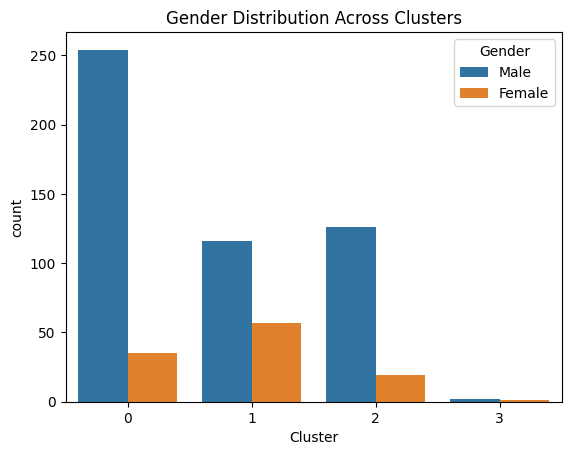

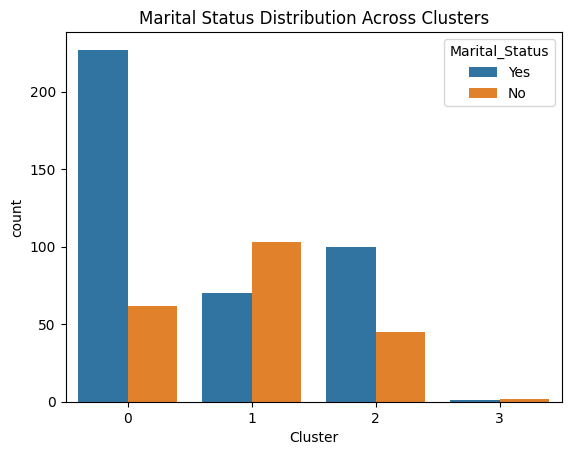

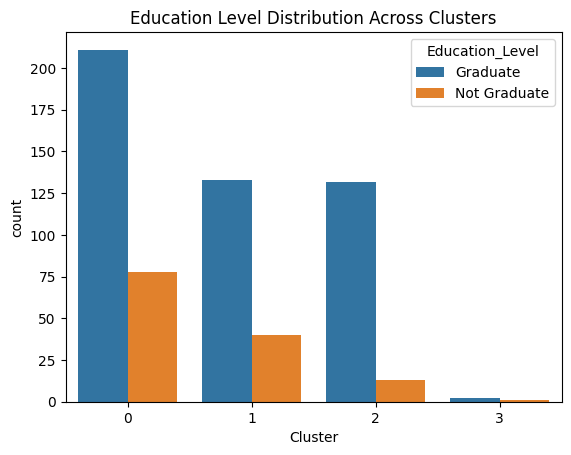

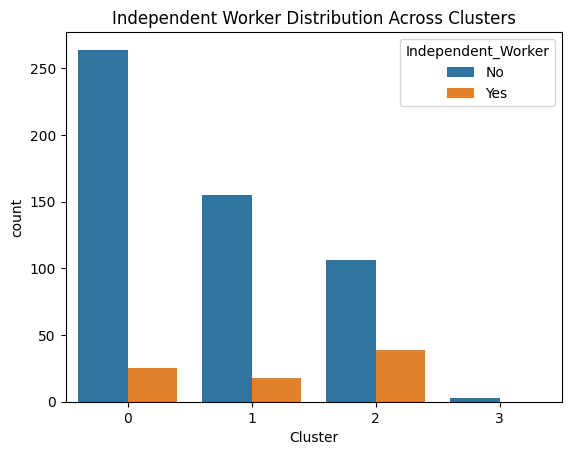

In [700]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for Gender distribution across clusters
sns.countplot(x='Cluster', hue='Gender', data=df)
plt.title('Gender Distribution Across Clusters')
plt.show()

# Bar plot for Marital Status distribution across clusters
sns.countplot(x='Cluster', hue='Marital_Status', data=df)
plt.title('Marital Status Distribution Across Clusters')
plt.show()

# Bar plot for Education Level distribution across clusters
sns.countplot(x='Cluster', hue='Education_Level', data=df)
plt.title('Education Level Distribution Across Clusters')
plt.show()

# Bar plot for Independent Worker distribution across clusters
sns.countplot(x='Cluster', hue='Independent_Worker', data=df)
plt.title('Independent Worker Distribution Across Clusters')
plt.show()

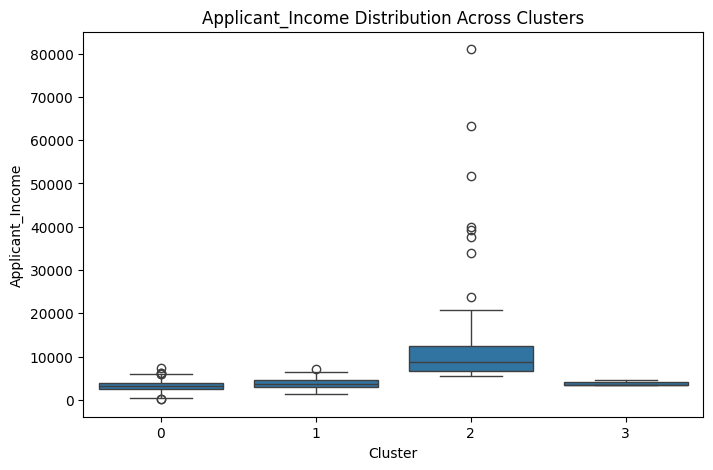

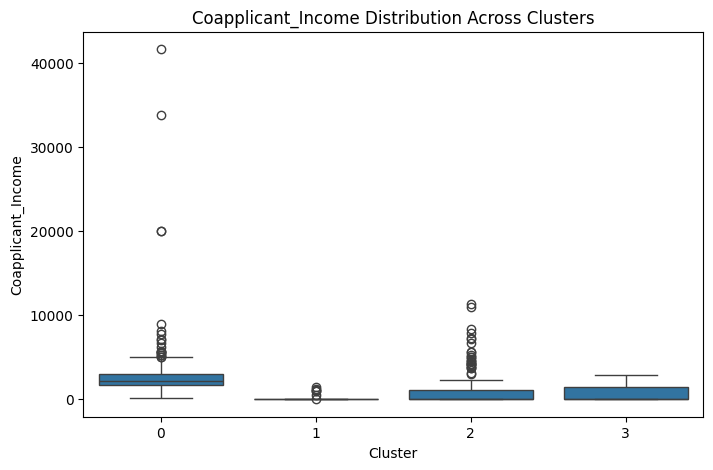

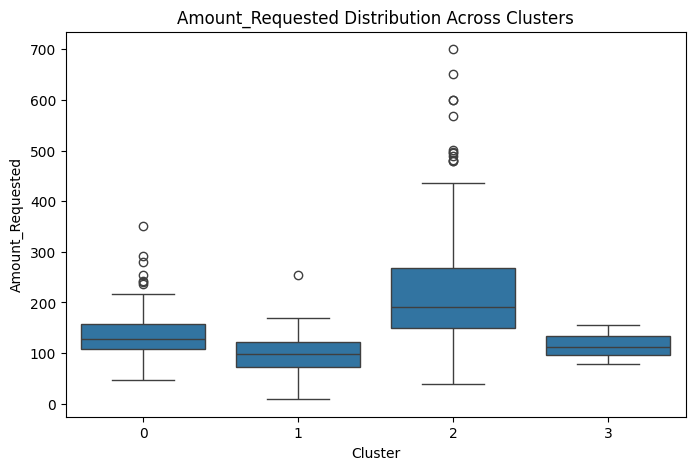

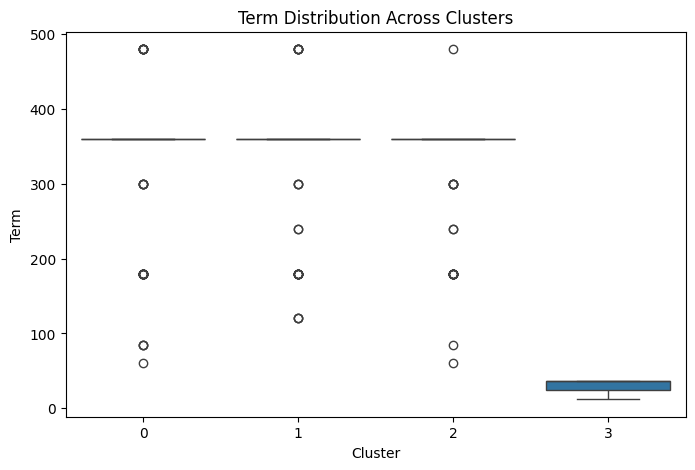

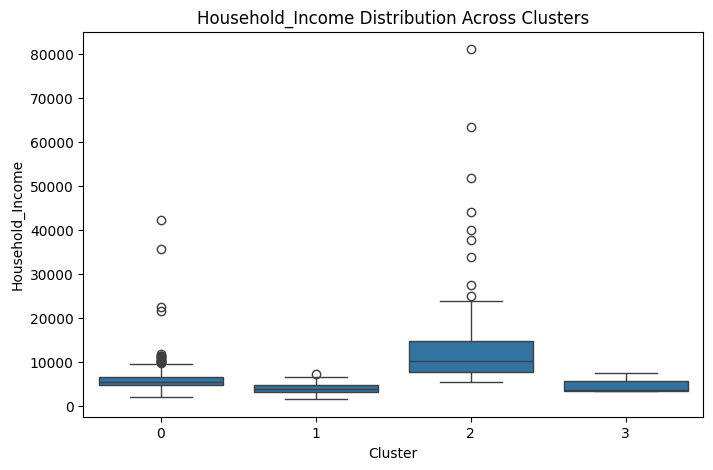

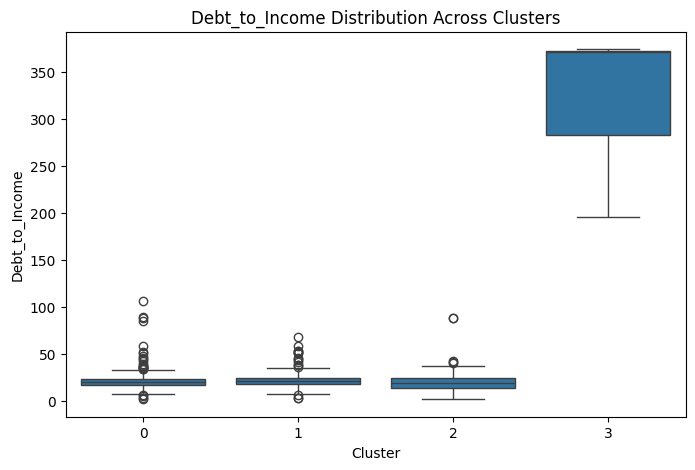

In [701]:
# Box plot to visualize numerical variables by cluster
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'{feature} Distribution Across Clusters')
    plt.show()

### 4.3.2. Hierarchical clustering and dendrogram interpretation

**Focus:** Like K-Means, hierarchical clustering also relies on numerical data for distance calculations.

**Approach:**
Include only numerical features: Categorical variables should not be included unless they are transformed into numerical formats. You can use techniques like one-hot encoding for categorical features if you want to include them, but the direct categorical variables should generally be avoided.

**Dendrogram Interpretation:** After performing hierarchical clustering, visualize the dendrogram to identify potential clusters and interpret the relationships between observations.

**Outcome:** Identify clusters and their relationships, without the influence of categorical variables.

In [702]:
# Standardize the numerical features
numerical_variables = ['Applicant_Income_Log',
                       'Coapplicant_Income_Log',
                       'Amount_Requested_Log',
                       'Term_Boxcox',
                       'Household_Income_Boxcox',
                       'Debt_to_Income']

In [703]:
# Use the standardized DataFrame (df_scaled)
df_scaled = df[numerical_variables]  # Use the scaled values if already calculated

In [704]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Use the standardized DataFrame (df_scaled)
df_scaled = df[numerical_variables]  # Use the scaled values if already calculated

In [705]:
# Perform hierarchical clustering using Ward's method
linked = linkage(df_scaled, method='ward')

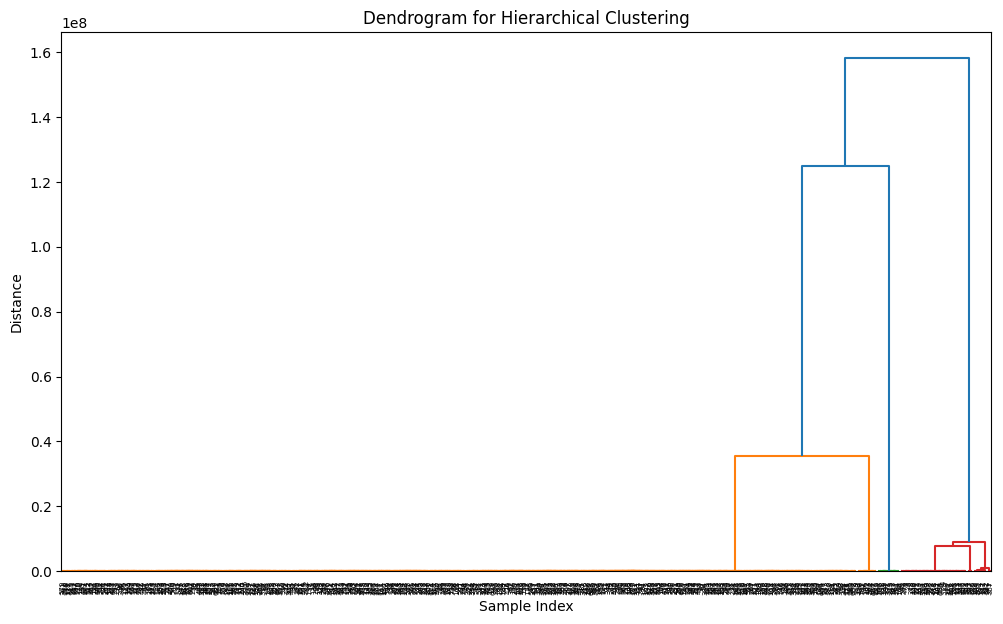

In [706]:
# Create a dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Interpretation of the Dendrogram
Identify Clusters: Look for horizontal lines that cross the vertical lines. The height of these lines indicates the distance at which clusters are joined. Shorter lines represent closer groups of samples.

Decide on a Cut-Off: You can decide where to "cut" the dendrogram to form clusters. This can often be visualized as a horizontal line drawn across the dendrogram.

Clusters Characteristics: After deciding the cut-off, you can use the cluster indices to analyze the characteristics of each cluster (e.g., means or distributions of your numerical features).

In [711]:
# Assign Clusters

from scipy.cluster.hierarchy import fcluster

# Define a threshold for the cut-off (this will depend on your dendrogram)
threshold = 15  # Adjust based on dendrogram observation

# Assign clusters
df['Hierarchical_Cluster'] = fcluster(linked, threshold, criterion='distance')

# Display the cluster assignments
print("Hierarchical Cluster Assignments:\n", df['Hierarchical_Cluster'].value_counts())


Hierarchical Cluster Assignments:
 Hierarchical_Cluster
41    61
36    61
37    53
33    52
32    50
35    46
40    45
39    36
34    34
25    17
29    16
31    14
30    11
38     9
18     8
11     7
16     7
17     7
19     7
21     5
10     5
15     5
13     5
28     5
12     5
20     5
27     4
23     4
1      3
14     3
22     3
26     3
2      3
8      2
9      2
4      2
3      1
7      1
24     1
5      1
6      1
Name: count, dtype: int64


In [727]:
# Analyze Cluster Characteristics
# Calculate the mean of each feature per cluster

hierarchical_cluster_stats = df.groupby('Hierarchical_Cluster')[['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested', 'Term', 'Debt_to_Income']].mean()
print("Hierarchical Cluster Characteristics:\n", hierarchical_cluster_stats)

Hierarchical Cluster Characteristics:
                       Applicant_Income  Coapplicant_Income  Amount_Requested   Term  Debt_to_Income
Hierarchical_Cluster                                                                               
1                          2794.000000          362.666667         22.000000  120.0       17.478121
2                          4453.000000         1302.333333        140.333333   84.0       87.400329
3                          3156.000000          457.000000        108.000000   84.0      106.757345
4                          5032.500000         2852.500000        140.500000   60.0       88.998811
5                          3358.000000            0.000000         79.000000   36.0      196.049236
6                          3481.000000            0.000000        155.000000   36.0      371.061955
7                          4628.000000         2854.000000        112.000000   12.0      374.231489
8                          7018.500000            0.000000   

**Solution**

* K-Means on Cluster Centers: Run K-means clustering on the mean values (centroids) of each cluster to merge similar groups further

In [730]:
# Calculate the centroids of the hierarchical clusters
cluster_centroids = df.groupby('Hierarchical_Cluster')[numerical_variables].mean()
print(cluster_centroids.head())

                      Applicant_Income_Log  Coapplicant_Income_Log  Amount_Requested_Log    Term_Boxcox  Household_Income_Boxcox  Debt_to_Income
Hierarchical_Cluster                                                                                                                            
1                                 7.837930                2.331005              3.122448  608110.610144                 1.975135       17.478121
2                                 8.376637                4.940336              4.930769  207677.712886                 1.984582       87.400329
3                                 8.057377                6.126869              4.691348  207677.712886                 1.977988      106.757345
4                                 8.431676                4.324637              4.946264   75374.607141                 1.988936       88.998811
5                                 8.119399                0.000000              4.382027   16179.690296                 1.976716  

In [731]:
# Normalize Centroids
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_centroids = scaler.fit_transform(cluster_centroids)
scaled_centroids = pd.DataFrame(scaled_centroids, columns=numerical_variables, index=cluster_centroids.index)
print(scaled_centroids.head())

                      Applicant_Income_Log  Coapplicant_Income_Log  Amount_Requested_Log  Term_Boxcox  Household_Income_Boxcox  Debt_to_Income
Hierarchical_Cluster                                                                                                                          
1                                -1.010697               -0.361120             -4.560010    -1.083809                -1.321021       -0.432700
2                                 0.140090                0.351307              0.359547    -1.125513                 0.214823        0.440589
3                                -0.541913                0.675267             -0.291801    -1.125513                -0.857239        0.682347
4                                 0.257666                0.183202              0.401700    -1.139292                 0.922581        0.460553
5                                -0.409423               -0.997556             -1.133313    -1.145457                -1.063953        1.797552

In [720]:
# Apply K-Means to Cluster Centroids
from sklearn.cluster import KMeans

# Define the number of clusters for consolidation
n_clusters = 4  # Adjust as necessary

# Initialize and fit the KMeans model on the scaled centroids
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
centroid_clusters = kmeans.fit_predict(scaled_centroids)

# Add the K-means cluster labels to the centroids DataFrame
cluster_centroids['Consolidated_Cluster'] = centroid_clusters
print(cluster_centroids[['Consolidated_Cluster']])


                      Consolidated_Cluster
Hierarchical_Cluster                      
1                                        0
2                                        0
3                                        0
4                                        0
5                                        2
6                                        2
7                                        2
8                                        0
9                                        0
10                                       0
11                                       0
12                                       0
13                                       0
14                                       0
15                                       0
16                                       0
17                                       0
18                                       1
19                                       3
20                                       1
21                                       1
22         

In [721]:
# Map the consolidated cluster labels to the original hierarchical clusters
consolidation_map = cluster_centroids['Consolidated_Cluster'].to_dict()
df['Consolidated_Cluster'] = df['Hierarchical_Cluster'].map(consolidation_map)

# Display the first few rows to verify
df[['Hierarchical_Cluster', 'Consolidated_Cluster']].head()


Hierarchical_Cluster  Consolidated_Cluster
0                    17                     0
1                    40                     1
2                    37                     1
3                    17                     0
4                    12                     0

In [724]:
# Calculate the mean of each feature within each consolidated cluster
consolidated_cluster_stats = df.groupby('Consolidated_Cluster')[['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested', 'Term', 'Debt_to_Income']].mean()
print("Consolidated Cluster Characteristics:\n", consolidated_cluster_stats)

Consolidated Cluster Characteristics:
                       Applicant_Income  Coapplicant_Income  Amount_Requested        Term  Debt_to_Income
Consolidated_Cluster                                                                                    
0                          6375.736842         2169.421053        137.043860  170.105263       37.227124
1                          5450.514512         2257.651715        146.434037  360.949868       18.037053
2                          3822.333333          951.333333        115.333333   28.000000      313.780893
3                          5046.046784           42.859649        148.204678  363.859649       24.992800


### 4.3.3. Cluster analysis: examining loan approval rates per cluster

**Focus:** This task is specifically about understanding how the clusters relate to the loan approval rates.

**Approach:**
Include all relevant variables: In this analysis, you should include all categorical variables, including Loan Approval Status, as well as any other relevant features. This allows you to analyze how the characteristics of the clusters relate to loan approval rates.

**Use contingency tables or chi-square tests:** You can analyze approval rates within each cluster and determine if there are significant differences.

**Outcome:** Examine the relationship between clusters and loan approval rates, providing insights into how customer segments differ in terms of approval outcomes.

# 5. Challenges with K-Means Method

Discuss and exemplify challenges such as selecting the number of clusters and cluster shape assumptions.

# 6. Innovative Analytics

## 6.1. Predictive uncertainty estimation

Estimate predictive uncertainty.

#### a. For classification task

Estimating predictive uncertainty in a classification task is crucial for understanding the reliability of the predictions.

In [734]:
# Make predictions with probabilities
probabilities = model.predict_proba(X_test)

# Get class predictions
predictions = model.predict(X_test)

# Create a DataFrame to view predictions with probabilities
prediction_results = pd.DataFrame(probabilities, columns=model.classes_)
prediction_results['Predicted_Class'] = predictions
print(prediction_results.head())

         0        1  Predicted_Class
0  0.22422  0.77578                1
1  0.24579  0.75421                1
2  0.24579  0.75421                1
3  0.24579  0.75421                1
4  0.22422  0.77578                1


In [738]:
# Analyze Predictive Uncertainty

uncertain_threshold = 0.6  # adjust this value
uncertain_predictions = prediction_results[(prediction_results[0] > uncertain_threshold) | (prediction_results[1] > uncertain_threshold)]
print("Uncertain Predictions:\n", uncertain_predictions)

Uncertain Predictions:
            0        1  Predicted_Class
0    0.22422  0.77578                1
1    0.24579  0.75421                1
2    0.24579  0.75421                1
3    0.24579  0.75421                1
4    0.22422  0.77578                1
..       ...      ...              ...
117  0.22422  0.77578                1
118  0.22422  0.77578                1
119  0.22422  0.77578                1
120  0.24579  0.75421                1
121  0.24579  0.75421                1

[122 rows x 3 columns]


Evaluate Predictions:

Since these predictions are above the threshold, you could further analyze their performance and accuracy. It would be helpful to see how they compare against the true labels.
You can create a new DataFrame that includes true labels for comparison.

Visualize Uncertainty:

You could visualize these uncertain predictions to understand the distribution and characteristics of the cases better. A scatter plot can be helpful if you have other features to plot against the predicted probabilities.

#### b. For clustering task

Estimating predictive uncertainty in clustering contexts can be challenging because clustering is an unsupervised technique and typically lacks labeled data to validate predictions. However, predictive uncertainty can still be estimated by:

Analyzing Cluster Stability: Evaluate if the clusters change significantly with slight modifications in data or clustering parameters.
Estimating Confidence Intervals: Use techniques to gauge how confident we are in the feature distributions across clusters.
Visualizing Uncertainty with Silhouette Analysis or Bootstrap Sampling: Get a better sense of the robustness of each cluster by assessing data points' "fit" within their clusters.

In [732]:
# Cluster Stability Analysis
from sklearn.utils import resample
import numpy as np

n_iterations = 10  # Number of bootstrap samples
stable_clusters = []

for i in range(n_iterations):
    # Resample data with replacement
    sample_df = resample(df)
    # Perform clustering on the resampled data
    sample_clusters = KMeans(n_clusters=k).fit_predict(sample_df[numerical_variables])
    stable_clusters.append(sample_clusters)

# Analyze the variation in clusters across iterations
stability = np.mean([np.array_equal(stable_clusters[0], clusters) for clusters in stable_clusters])
print(f"Cluster stability score: {stability}")

Cluster stability score: 0.1


A cluster stability score of 0.1 indicates that the clustering results are quite inconsistent across resamples, suggesting a high level of uncertainty. This could mean that the data may not have strong, well-separated clusters, or that the clustering approach or number of clusters might need adjustment.

In [733]:
# Confidence Intervals on Cluster Centroids
import scipy.stats as stats

cluster_stats = df.groupby('Consolidated_Cluster')[numerical_variables].mean()
conf_intervals = {}

for cluster in cluster_stats.index:
    conf_intervals[cluster] = {}
    for feature in numerical_variables:
        data = df[df['Consolidated_Cluster'] == cluster][feature]
        mean = data.mean()
        ci = stats.norm.interval(0.95, loc=mean, scale=stats.sem(data))
        conf_intervals[cluster][feature] = ci

# Display confidence intervals for each feature in each cluster
for cluster, intervals in conf_intervals.items():
    print(f"\nConsolidated Cluster {cluster} Confidence Intervals:")
    for feature, ci in intervals.items():
        print(f"{feature}: {ci}")



Consolidated Cluster 0 Confidence Intervals:
Applicant_Income_Log: (8.19718094432705, 8.584582670586295)
Coapplicant_Income_Log: (2.9680670256160253, 5.056386340280288)
Amount_Requested_Log: (4.566632631443087, 4.900228937799803)
Term_Boxcox: (1716901.0650444985, 2254388.290251678)
Household_Income_Boxcox: (1.9834653427351507, 1.9871960713026073)
Debt_to_Income: (31.514522412448713, 42.93972597408093)

Consolidated Cluster 1 Confidence Intervals:
Applicant_Income_Log: (8.259055462334526, 8.39316157388819)
Coapplicant_Income_Log: (5.844721336600368, 6.481862486859311)
Amount_Requested_Log: (4.83947566265862, 4.933448868147403)
Term_Boxcox: (16584941.641667513, 17292765.552336752)
Household_Income_Boxcox: (1.985404938129232, 1.9865719457110171)
Debt_to_Income: (17.454857495520468, 18.619249208774047)

Consolidated Cluster 2 Confidence Intervals:
Applicant_Income_Log: (8.039470931815258, 8.437100302165875)
Coapplicant_Income_Log: (-2.5460891561393306, 7.850640570866071)
Amount_Requested_

Consolidated Cluster 0:

* Applicant Income (Log): 8.20 to 8.58
* Coapplicant Income (Log): 2.97 to 5.06
* Amount Requested (Log): 4.57 to 4.90
* Term (Boxcox): 1.7M to 2.3M
* Household Income (Boxcox): 1.98 to 1.99
* Debt-to-Income: 31.51 to 42.94
* Interpretation: Cluster 0 likely consists of applicants with moderately high income, moderate coapplicant income, and loan amounts. The wider confidence interval in debt-to-income could indicate variability in debt load, suggesting a mix of lower and moderately leveraged applicants.

Consolidated Cluster 1:

* Applicant Income (Log): 8.26 to 8.39
* Coapplicant Income (Log): 5.84 to 6.48
* Amount Requested (Log): 4.84 to 4.93
* Term (Boxcox): 16.6M to 17.3M
* Household Income (Boxcox): 1.99 (consistent)
* Debt-to-Income: 17.45 to 18.62
* Interpretation: Cluster 1 appears to represent applicants with higher coapplicant incomes, relatively low debt-to-income ratios, and a consistent range of requested amounts and household income. The narrower intervals indicate less variation, suggesting a more uniform group of financially stable applicants.

Consolidated Cluster 2:

* Applicant Income (Log): 8.04 to 8.44
* Coapplicant Income (Log): -2.55 to 7.85
* Amount Requested (Log): 4.34 to 5.10
* Term (Boxcox): 799 to 21,168
* Household Income (Boxcox): 1.97 to 1.99
* Debt-to-Income: 198.39 to 429.17
* Interpretation: Cluster 2 is quite diverse, likely including individuals with highly varied incomes, coapplicant involvement, and debt-to-income ratios. The wide intervals, especially in debt-to-income, imply greater uncertainty and variability within this cluster, indicating it may be a "catch-all" group or one that needs further refinement.

Consolidated Cluster 3:

* Applicant Income (Log): 8.28 to 8.45
* Coapplicant Income (Log): 0.04 to 0.41
* Amount Requested (Log): 4.80 to 4.94
* Term (Boxcox): 16.8M to 18.2M
* Household Income (Boxcox): 1.98 (consistent)
* Debt-to-Income: 23.83 to 26.15
*Interpretation: Cluster 3 seems to capture applicants with consistent applicant income, low coapplicant income, and moderate debt-to-income ratios. The confidence intervals are relatively narrow, signifying a well-defined group with steady financial characteristics and moderate debt burden.

## 6.2. SHAP or LIME for model explanations

Use SHAP or LIME for model explanations

In [739]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=556264d4b6757a8800b63acf24007c62abfba7004ce8ece427b618f671d8aaae
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [745]:
# Best: Random Forest Model
# Fit the Random Forest Model
model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300)
model.fit(X_train, y_train)  # Make sure to fit the model first

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=300)

In [748]:
from lime import lime_tabular

# Create a LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Not Approved', 'Approved'],  # Adjust according to your actual class names
    mode='classification'
)
# Explain a prediction of an instance
i = 0  # Index of the instance you want to explain
exp = explainer.explain_instance(
    data_row=X_test.iloc[i].values,
    predict_fn=model.predict_proba  # Use the fitted model here
)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [749]:
# Show the explanation as HTML
html_exp = exp.as_html()
from IPython.core.display import display, HTML
display(HTML(html_exp))

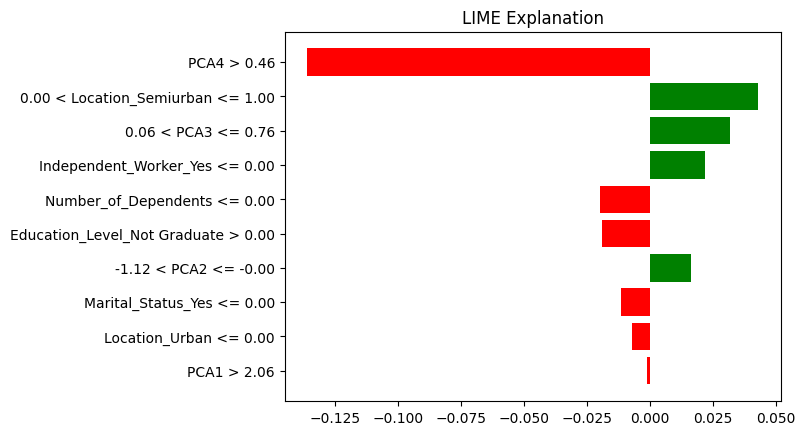

In [750]:
# Plot the explanation
exp.as_pyplot_figure()
plt.title('LIME Explanation')
plt.show()

## 6.3. Real-time prediction system architecture

1. Data Ingestion Layer
Input Data Sources: Collect data from various sources such as online application forms, credit score APIs, bank databases, and customer relationship management (CRM) systems.
Technologies:
APIs: Use RESTful APIs to receive incoming data from application forms.
Streaming Services: Tools like Apache Kafka or RabbitMQ can handle real-time data streams.
2. Data Processing Layer
Preprocessing: Clean and transform incoming data to match the features used in model training (e.g., encoding categorical variables, scaling numeric values).
Feature Engineering: Apply any additional feature engineering steps based on your model's requirements.
Technologies:
Python Scripts: Use Pandas and NumPy for data manipulation.
Apache Spark: For large-scale data processing.
3. Model Inference Layer
Model Deployment: Deploy the Random Forest model as a RESTful API using a web framework like Flask or FastAPI.
Prediction: The API receives preprocessed input data, applies the model, and returns the prediction (e.g., approved or denied).
Technologies:
Flask or FastAPI: For creating the prediction API.
Docker: To containerize the model and ensure consistent deployment across environments.
4. Business Logic Layer
Decision Logic: Implement rules based on predictions, such as risk assessment thresholds and approval conditions.
Integration with Other Systems: Communicate with other systems for additional data verification, fraud detection, etc.
Technologies:
Business Rules Engine: Tools like Drools for complex decision-making.
5. User Interface Layer
Application Interface: Create a front-end application for loan officers or customers to submit applications and view results.
Technologies:
Web Frameworks: React, Angular, or Vue.js for building user interfaces.
Mobile Applications: If necessary, use React Native or Flutter for mobile access.
6. Monitoring & Feedback Loop
Monitoring: Implement monitoring tools to track the model’s performance, prediction accuracy, and system health.
Feedback Loop: Continuously collect data on approved/denied loans for retraining and improving the model.
Technologies:
Monitoring Tools: Prometheus, Grafana, or ELK stack for logs and metrics.
Model Retraining Pipelines: Use tools like Apache Airflow or Kubeflow for automating retraining processes.

Additional Considerations

Scalability: Ensure the system can handle increased loads by using cloud services like AWS, Azure, or Google Cloud, which provide auto-scaling capabilities.
Security: Implement strong security measures to protect sensitive customer data, including encryption, authentication, and access control.
Compliance: Ensure compliance with relevant regulations (e.g., GDPR, CCPA) for handling personal data.

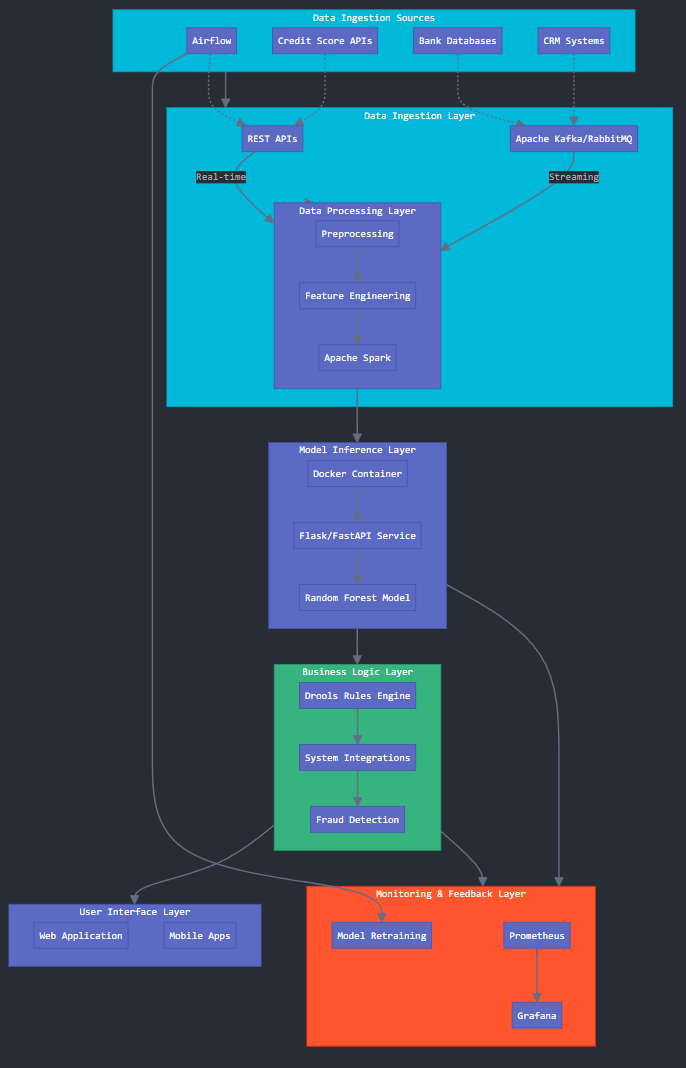

## 6.4. Strategy for model performance monitoring and updating criteria

Strategy for Model Performance Monitoring and Updating Criteria
1. Define Key Performance Indicators (KPIs)
Accuracy: Measure how often the model’s predictions match the actual outcomes.
Precision: Evaluate the ratio of true positive predictions to the total positive predictions, indicating the model’s ability to avoid false positives.
Recall (Sensitivity): Measure the ratio of true positives to the total actual positives, indicating the model's ability to capture all relevant cases.
F1 Score: The harmonic mean of precision and recall, providing a balance between the two.
Area Under the ROC Curve (AUC-ROC): Measure the model’s ability to distinguish between classes at various thresholds.
Log Loss: Evaluate the probability output of the model; lower values indicate better performance.
Prediction Latency: Measure the time taken to make predictions, ensuring it meets real-time requirements.
2. Establish a Monitoring Framework
Automated Monitoring: Set up automated scripts to run daily or weekly evaluations of model performance using live data.
Dashboarding: Use visualization tools (e.g., Grafana, Tableau) to create dashboards that display KPIs in real-time.
Alerting: Implement alert systems to notify data scientists and stakeholders of significant performance drops or anomalies.
3. Data Drift and Concept Drift Monitoring
Data Drift: Monitor changes in the statistical properties of input features over time. Use techniques like:
Kolmogorov-Smirnov test: To compare the distribution of incoming data against the training dataset.
Population Stability Index (PSI): To measure changes in the distribution of categorical variables.
Concept Drift: Monitor changes in the relationship between input features and target outcomes, which can affect model accuracy.
Performance Metrics: Regularly compare model predictions with actual outcomes to identify shifts.
4. Establish a Model Updating Criteria
Performance Thresholds: Define thresholds for each KPI (e.g., if accuracy drops below 80% or AUC-ROC falls below 0.7).
Frequency of Evaluation: Decide on a regular evaluation schedule (e.g., monthly, quarterly) and establish triggers for ad-hoc evaluations when significant data shifts are detected.
Stakeholder Feedback: Incorporate feedback from loan officers or stakeholders regarding model performance in real-world scenarios.
5. Model Retraining Strategy
Trigger-Based Retraining: Automatically retrain the model when performance thresholds are crossed or data drift is detected.
Scheduled Retraining: Implement periodic retraining (e.g., every 3-6 months) even if no performance issues are detected, to keep the model current with new trends and patterns.
A/B Testing for New Models: Before fully deploying a retrained model, conduct A/B testing against the existing model to assess its performance on live data without fully replacing the older model.
6. Documentation and Version Control
Model Versioning: Keep track of different versions of the model and their performance metrics. Use tools like DVC (Data Version Control) or MLflow for model management.
Documentation: Maintain thorough documentation of model updates, performance metrics, feature changes, and any incidents that trigger retraining.
7. Feedback Loop Implementation
User Feedback: Collect qualitative feedback from end-users (e.g., loan officers) on model predictions to gain insights into potential improvements.
Continuous Improvement: Use feedback and monitoring results to inform future iterations of feature engineering, model selection, and tuning strategies.
8. Compliance and Ethics Monitoring
Bias and Fairness Audits: Regularly audit the model for biases and ensure it aligns with ethical lending practices.
Regulatory Compliance: Ensure the model meets all regulatory requirements for fairness, transparency, and accountability.

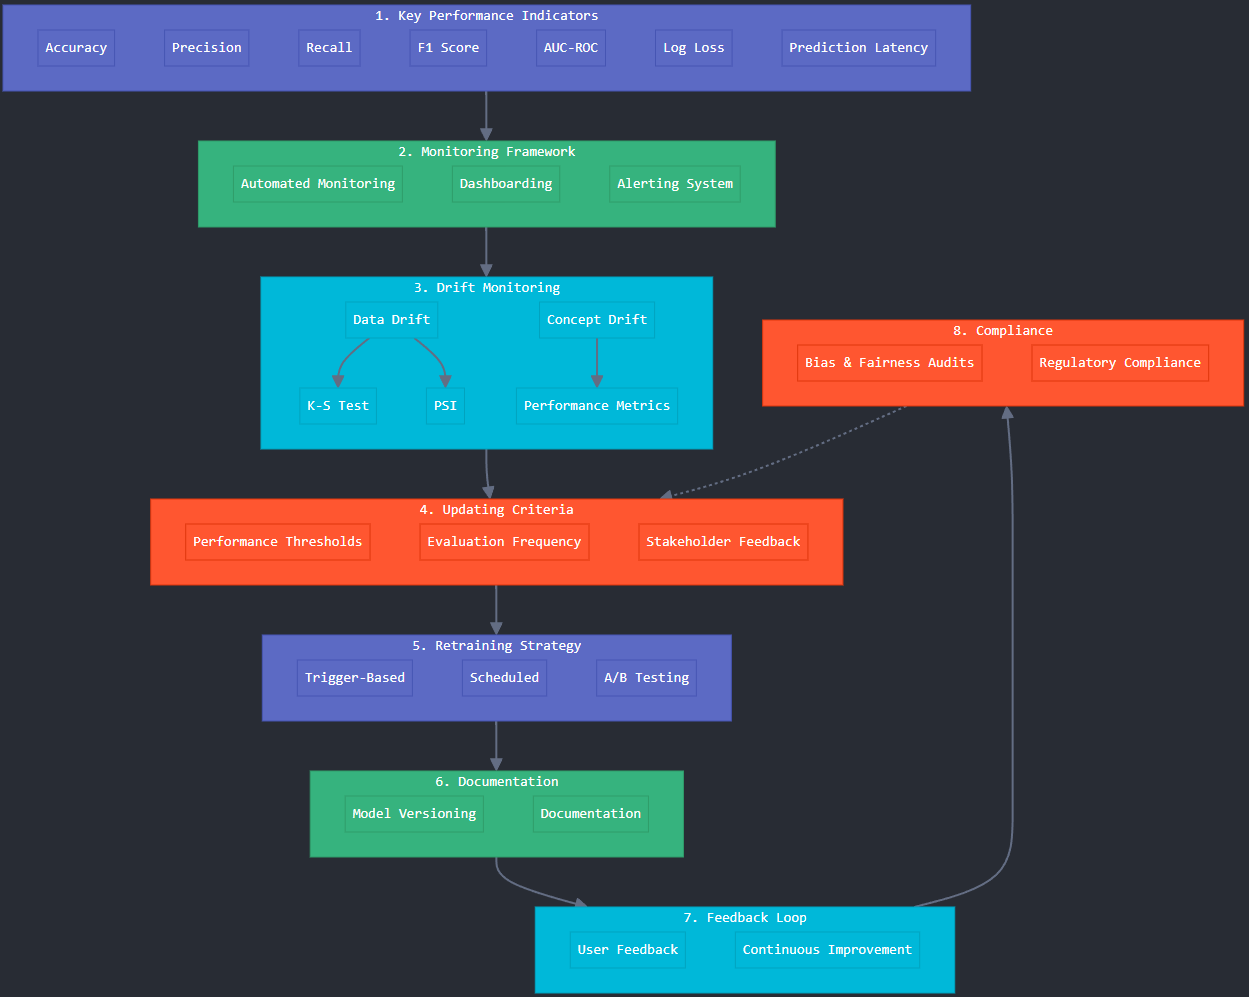

# B. Deep Learning: Build a Neural Network

# 7. Buil a Neural Network

In [ ]:
# Import libraries for data manipulation and visualization
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Attention, Flatten, Embedding, MultiHeadAttention, Concatenate, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset. Assume that the given dataset is extracted from a data warehouse and stored in the local machine
# Read the uploaded CSV file into a DataFrame
df = pd.read_csv('assessment2_dataset.csv')

![{6E6241C4-BA3D-41D6-9638-062465186380}.png](attachment:84dcdd68-07b9-4f88-8c96-1d077f9bb6a5.png)

In [ ]:
df.head()

Loan_ID Gender Marital_Status Number_of_Dependents Education_Level  \
0  LP00031   Male            Yes                    0        Graduate   
1  LP00032   Male            Yes                    2        Graduate   
2  LP00033   Male            Yes                    0        Graduate   
3  LP00034   Male             No                    0    Not Graduate   
4  LP00035   Male            Yes                    0        Graduate   

  Independent_Worker  Applicant_Income  Coapplicant_Income   Location  \
0                 No              9329                   0      Rural   
1                 No              2043                1619      Rural   
2                 No              4754                2331      Urban   
3                 No              2721                   0      Urban   
4                 No              2998                3419  Semiurban   

   Amount_Requested   Term  Credit_History Approval_Status  
0             189.0  180.0             1.0               Y  
1             102.0  360.0             1.0               Y  
2             129.0  360.0             1.0               Y  
3              59.0  180.0             1.0               Y  
4              56.0  180.0             1.0               Y

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               610 non-null    object 
 1   Gender                597 non-null    object 
 2   Marital_Status        607 non-null    object 
 3   Number_of_Dependents  595 non-null    object 
 4   Education_Level       610 non-null    object 
 5   Independent_Worker    578 non-null    object 
 6   Applicant_Income      610 non-null    int64  
 7   Coapplicant_Income    610 non-null    int64  
 8   Location              610 non-null    object 
 9   Amount_Requested      592 non-null    float64
 10  Term                  596 non-null    float64
 11  Credit_History        560 non-null    float64
 12  Approval_Status       610 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.1+ KB


### 7.1. Preprocess the Data

The process is quite similiar, but actually but there are some differences worth noting.

#### a. Handling missing values

In [ ]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Loan_ID                  0
Gender                  13
Marital_Status           3
Number_of_Dependents    15
Education_Level          0
Independent_Worker      32
Applicant_Income         0
Coapplicant_Income       0
Location                 0
Amount_Requested        18
Term                    14
Credit_History          50
Approval_Status          0
dtype: int64


**Categorical columns**

In [ ]:
# Fill nominal categorical columns with a placeholder "Unknown"
df['Gender'].fillna('Unknown', inplace=True)
df['Marital_Status'].fillna('Unknown', inplace=True)
df['Independent_Worker'].fillna('Unknown', inplace=True)
df['Credit_History'].fillna('Unknown', inplace=True)

In [ ]:
# Fill ordinal columns with mode

# Replace '3+' with an integer (e.g., 3) to represent it as a continuous order
df['Number_of_Dependents'] = df['Number_of_Dependents'].replace({'3+': 3})

# Fill missing values with the mode, then convert to integer
df['Number_of_Dependents'].fillna(df['Number_of_Dependents'].mode()[0], inplace=True)
df['Number_of_Dependents'] = df['Number_of_Dependents'].astype(int)

**Numerical columns**

In [ ]:
# Fill missing values with the mode then convert to integer
df['Term'].fillna(df['Term'].mode()[0], inplace=True)
df['Term'] = df['Term'].astype(int)

In [ ]:
# Fill numerical column with median
df['Amount_Requested'].fillna(df['Amount_Requested'].median(), inplace=True)

#### b. Encoding categorical variables

Firstly, it is necessary to check all uniques values in categorical variables to deicide the encoding/ embedding methods.

In [ ]:
# List of categorical columns
categorical_columns = ['Gender',
                       'Marital_Status',
                       'Number_of_Dependents',
                       'Education_Level',
                       'Independent_Worker',
                       'Location',
                       'Credit_History']

# Display unique values for each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")
    print(f"Number of unique values in {column}: {len(unique_values)}\n")

Gender: ['Male' 'Female' 'Unknown']
Number of unique values in Gender: 3

Marital_Status: ['Yes' 'No' 'Unknown']
Number of unique values in Marital_Status: 3

Number_of_Dependents: [0 2 1 3]
Number of unique values in Number_of_Dependents: 4

Education_Level: ['Graduate' 'Not Graduate']
Number of unique values in Education_Level: 2

Independent_Worker: ['No' 'Yes' 'Unknown']
Number of unique values in Independent_Worker: 3

Location: ['Rural' 'Urban' 'Semiurban']
Number of unique values in Location: 3

Credit_History: [1.0 0.0 'Unknown']
Number of unique values in Credit_History: 3



Obviously, the "Credit_History" column's values should be converted to nominal values.

In [ ]:
# Convert Credit_History to nominal values
df['Credit_History'] = df['Credit_History'].replace({1.0: '1', 0.0: '0'})
df['Credit_History'] = df['Credit_History'].astype(str)

All categirocal variables seem to have few unique values, meaning that they may have low-cardinality. However, it is crucial to capture the interaction between those categorical variables and to the numerical variables. Therefore, the encoded categorical variables will be embedded and added in the model as layers.

In [ ]:
# One-hot encoding for nominal variables
df = pd.get_dummies(df, columns=['Gender', 'Marital_Status','Education_Level', 'Independent_Worker', 'Location', 'Credit_History'], drop_first=True)

In [ ]:
# Label encoding for ordinal variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Number_of_Dependents'] = label_encoder.fit_transform(df['Number_of_Dependents'])

The "Approval_Status" is the target variable. So, we need to treat it differently.

In [ ]:
#  'Approval_Status' categorical variable = target variable
df['Approval_Status'] = df['Approval_Status'].map({'N': 0, 'Y': 1})

#### c. Normalize continuous variables

Normalize continuous features for smoother gradient descent.

Choosing the Right Normalization Technique:

* Min-Max Scaling is best used when you know that your data will be within a certain range.
* Z-Score Normalization is beneficial when your data follows a Gaussian distribution.
* Robust Scaler is preferable when your data contains many outliers.

The numerical variables are highly skewed and have many heavy outliers. Therefore, it is appropriate to apply Robust Scaler.

**Apply Robust Scaler to continuous variables**

In [ ]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Define the continuous variables you want to scale
continuous_features = ['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested']

# Fit and transform the continuous features
df[continuous_features] = robust_scaler.fit_transform(df[continuous_features])

In [ ]:
# Check the result to ensure the transformation is applied
print(df[continuous_features].describe())

       Applicant_Income  Coapplicant_Income  Amount_Requested
count        610.000000          610.000000        610.000000
mean           0.550525            0.205312          0.288627
std            2.104481            1.276414          1.323678
min           -1.259361           -0.500109         -1.858824
25%           -0.319564           -0.500109         -0.415686
50%            0.000000            0.000000          0.000000
75%            0.680436            0.499891          0.584314
max           26.515630           17.619917          8.980392


We should take a moment to examine the "Term" variable before transforming/ scaling.

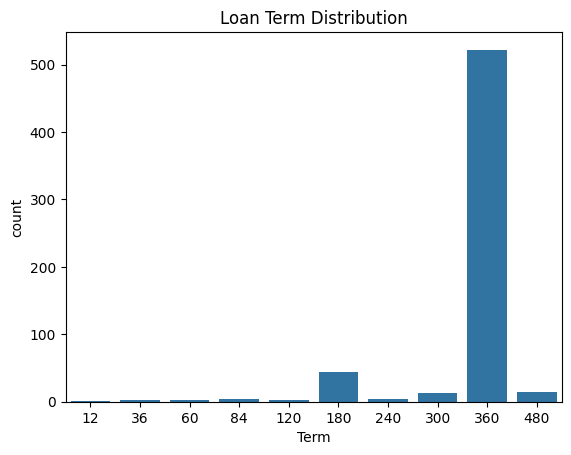

Value counts for Term:


Term
360    522
180     44
480     15
300     13
84       4
240      4
120      3
36       2
60       2
12       1
Name: count, dtype: int64

In [ ]:
# Countplot for Term
sns.countplot(data=df, x='Term')
plt.title('Loan Term Distribution')
plt.show()

# Value counts
print('Value counts for Term:')
df['Term'].value_counts()

It can be seent that the distribution of the discrete values has a long-tail with heavy outlier. Therefore, Robust Scaler.

In [ ]:
# Scale the 'Term' variable
df['Term'] = robust_scaler.fit_transform(df[['Term']])

In [ ]:
# Check the result to ensure the transformation is applied
numerical_columns = ['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested', 'Term']
print(df[numerical_columns].describe())

       Applicant_Income  Coapplicant_Income  Amount_Requested        Term
count        610.000000          610.000000        610.000000  610.000000
mean           0.550525            0.205312          0.288627  -17.704918
std            2.104481            1.276414          1.323678   64.624047
min           -1.259361           -0.500109         -1.858824 -348.000000
25%           -0.319564           -0.500109         -0.415686    0.000000
50%            0.000000            0.000000          0.000000    0.000000
75%            0.680436            0.499891          0.584314    0.000000
max           26.515630           17.619917          8.980392  120.000000


Before splitting the data set into training and testing data (80-20), it is necessary to review the data set's characteristics.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       610 non-null    object 
 1   Number_of_Dependents          610 non-null    int64  
 2   Applicant_Income              610 non-null    float64
 3   Coapplicant_Income            610 non-null    float64
 4   Amount_Requested              610 non-null    float64
 5   Term                          610 non-null    float64
 6   Approval_Status               610 non-null    int64  
 7   Gender_Male                   610 non-null    bool   
 8   Gender_Unknown                610 non-null    bool   
 9   Marital_Status_Unknown        610 non-null    bool   
 10  Marital_Status_Yes            610 non-null    bool   
 11  Education_Level_Not Graduate  610 non-null    bool   
 12  Independent_Worker_Unknown    610 non-null    bool   
 13  Indep

In [ ]:
df.head(10)

Loan_ID  Number_of_Dependents  Applicant_Income  Coapplicant_Income  \
0  LP00031                     0          1.894881           -0.500109   
1  LP00032                     2         -0.608038            0.203957   
2  LP00033                     0          0.323257            0.513590   
3  LP00034                     0         -0.375129           -0.500109   
4  LP00035                     0         -0.279973            0.986736   
5  LP00036                     0          0.167296            0.376604   
6  LP00037                     1          1.668499            1.666449   
7  LP00038                     0          0.122295           -0.500109   
8  LP00039                     0          0.368602           -0.500109   
9  LP00040                     3         -0.251804           -0.500109   

   Amount_Requested   Term  Approval_Status  Gender_Male  Gender_Unknown  \
0          0.964706 -180.0                1         True           False   
1         -0.400000    0.0                1         True           False   
2          0.023529    0.0                1         True           False   
3         -1.074510 -180.0                1         True           False   
4         -1.121569 -180.0                1         True           False   
5          1.058824    0.0                1         True           False   
6          3.898039    0.0                0         True           False   
7         -0.478431    0.0                0         True           False   
8          0.086275    0.0                0         True           False   
9          1.984314    0.0                1        False           False   

   Marital_Status_Unknown  Marital_Status_Yes  Education_Level_Not Graduate  \
0                   False                True                         False   
1                   False                True                         False   
2                   False                True                         False   
3                   False               False                          True   
4                   False                True                         False   
5                   False                True                          True   
6                   False                True                         False   
7                   False               False                         False   
8                   False                True                          True   
9                   False               False                         False   

   Independent_Worker_Unknown  Independent_Worker_Yes  Location_Semiurban  \
0                       False                   False               False   
1                       False                   False               False   
2                       False                   False               False   
3                       False                   False               False   
4                       False                   False                True   
5                       False                   False               False   
6                       False                    True               False   
7                       False                   False                True   
8                       False                   False               False   
9                       False                   False               False   

   Location_Urban  Credit_History_1  Credit_History_Unknown  
0           False              True                   False  
1           False              True                   False  
2            True              True                   False  
3            True              True                   False  
4           False              True                   False  
5           False              True                   False  
6           False             False                   False  
7           False             False                   False  
8           False              True                   False  
9           F

#### d. Splitting data

In [ ]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Loan_ID                         0
Number_of_Dependents            0
Applicant_Income                0
Coapplicant_Income              0
Amount_Requested                0
Term                            0
Approval_Status                 0
Gender_Male                     0
Gender_Unknown                  0
Marital_Status_Unknown          0
Marital_Status_Yes              0
Education_Level_Not Graduate    0
Independent_Worker_Unknown      0
Independent_Worker_Yes          0
Location_Semiurban              0
Location_Urban                  0
Credit_History_1                0
Credit_History_Unknown          0
dtype: int64


In [ ]:
# Features
X = df[['Number_of_Dependents',
        'Applicant_Income',
        'Coapplicant_Income',
        'Coapplicant_Income',
        'Amount_Requested',
        'Term',
        'Approval_Status',
        'Gender_Male',
        'Gender_Unknown',
        'Marital_Status_Unknown',
        'Marital_Status_Yes',
        'Education_Level_Not Graduate',
        'Independent_Worker_Unknown',
        'Independent_Worker_Yes',
        'Location_Semiurban',
        'Location_Urban',
        'Credit_History_1',
        'Credit_History_Unknown']]

# Target variable
y = df['Approval_Status']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.head()

Number_of_Dependents  Applicant_Income  Coapplicant_Income  \
438                     1          0.521127           -0.008698   
92                      0          0.177946            0.567080   
221                     0          2.266919           -0.500109   
523                     1         -0.000344           -0.500109   
105                     2          0.472346           -0.500109   

     Coapplicant_Income  Amount_Requested  Term  Approval_Status  Gender_Male  \
438           -0.008698          0.933333   0.0                1         True   
92             0.567080         -0.258824   0.0                0        False   
221           -0.500109          2.078431   0.0                1        False   
523           -0.500109         -0.243137   0.0                1        False   
105           -0.500109          0.415686   0.0                1         True   

     Gender_Unknown  Marital_Status_Unknown  Marital_Status_Yes  \
438           False                   False                True   
92            False                   False                True   
221           False                   False               False   
523           False                   False               False   
105           False                   False                True   

     Education_Level_Not Graduate  Independent_Worker_Unknown  \
438                          True                       False   
92                          False                       False   
221                         False                       False   
523                         False                       False   
105                         False                       False   

     Independent_Worker_Yes  Location_Semiurban  Location_Urban  \
438                   False               False            True   
92                    False               False            True   
221                   False               False            True   
523                   False               False           False   
105                   False                True           False   

     Credit_History_1  Credit_History_Unknown  
438             False                    True  
92               True                   False  
221              True                   False  
523              True                   False  
105              True                   False

In [ ]:
# Displaying the shapes of the training and testing sets to ensure they are split correctly
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((488, 18), (122, 18), (488,), (122,))

Parameter **statify=y** to ensure fairness and balance in prediction. The data will be splitted later on.

## 7.2. Design and build a neural network models

**Requirements**
* Embedding layers
* Attention layer
* Feature learning mechanism

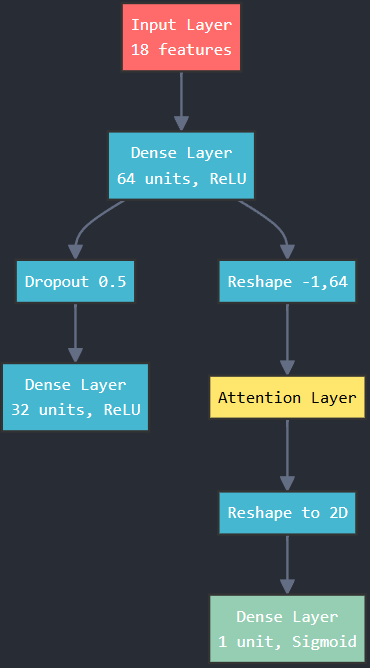

In [ ]:
# Neural Network Model with Attention
input_layer = Input(shape=(X_train.shape[1],))
dense_1 = Dense(64, activation='relu')(input_layer)
dropout_1 = Dropout(0.5)(dense_1)
dense_2 = Dense(32, activation='relu')(dropout_1)

# Reshape the output of dense_1 to have a sequence length of 1
# This is necessary for the Attention layer to work correctly
reshaped_dense_1 = Reshape((-1, 64))(dense_1)

# Now use the reshaped tensor as both query and value for the Attention layer
attention_output = Attention()([reshaped_dense_1, reshaped_dense_1])

# Reshape the output of the Attention layer back to 2D
attention_output = Reshape((-1,))(attention_output)

output_layer = Dense(1, activation='sigmoid')(attention_output)
attention_model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Compile and train the model
attention_model.compile(optimizer=Adam(learning_rate=0.0000001), loss='binary_crossentropy', metrics=['accuracy'])
history = attention_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.6494 - loss: 2.4441 - val_accuracy: 0.7449 - val_loss: 2.5419
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6552 - loss: 2.3833 - val_accuracy: 0.7449 - val_loss: 2.5418
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6421 - loss: 1.8610 - val_accuracy: 0.7449 - val_loss: 2.5418
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6508 - loss: 2.2039 - val_accuracy: 0.7449 - val_loss: 2.5417
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6579 - loss: 2.1355 - val_accuracy: 0.7449 - val_loss: 2.5416
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6537 - loss: 2.0125 - val_accuracy: 0.7449 - val_loss: 2.5415
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6431 - loss: 2.2571 - val_accuracy: 0.7449 - val_loss: 2.5415
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6277 - loss: 2.2347 - val_accuracy: 0.7449 - 

In [ ]:
# Evaluate model
test_loss, test_accuracy = attention_model.evaluate(X_test, y_test)
print(f'Test Loss (Attention Model): {test_loss:.4f}, Test Accuracy (Attention Model): {test_accuracy:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6484 - loss: 2.1130  
Test Loss (Attention Model): 2.3411, Test Accuracy (Attention Model): 0.6393


In [ ]:
# Function to plot training history
def plot_training_history(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    # Create a figure with two subplots: one for Loss and one for Accuracy
    plt.figure(figsize=(14, 6))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], 'b', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'g', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'g', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

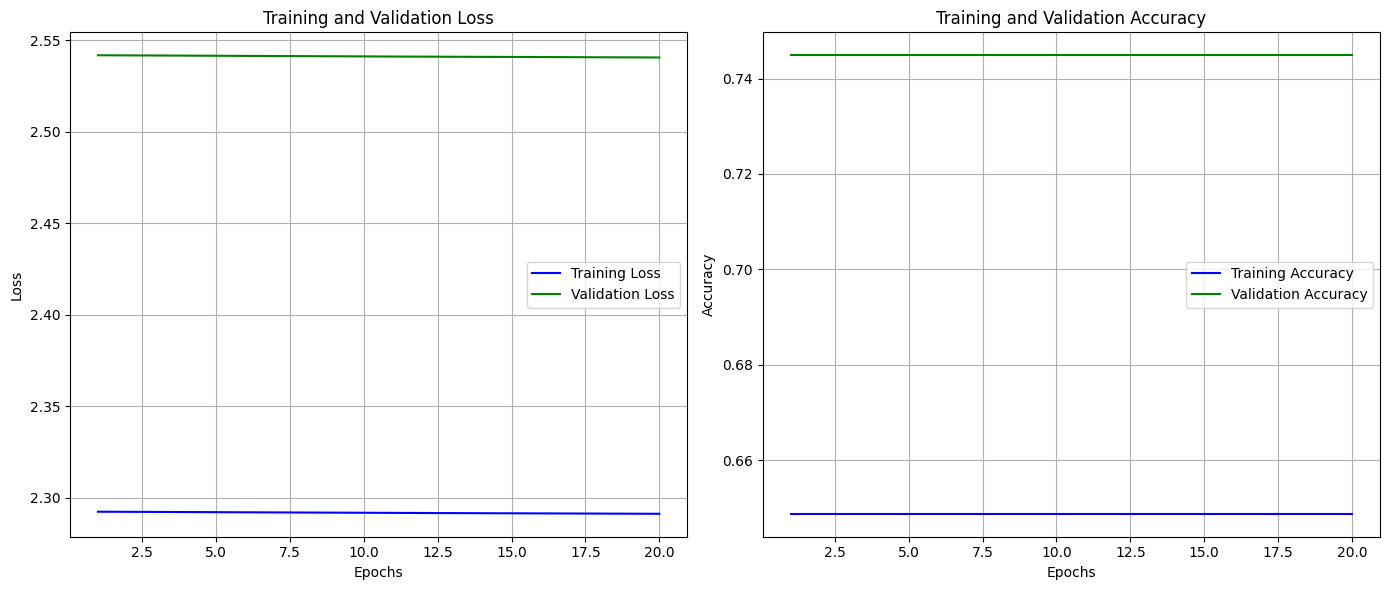

In [ ]:
# Call the function to plot the history of the attention model
plot_training_history(history)

**Result of initial training**

Setting:

* Nominal -> One-Hot encoding
* Ordinal -> Converted to int
* Numerical -> tranformed (outliers), StandardScaler (feature scaling), PCA (dimentionality reduction)
* 4-layer model, no embedding, no attention

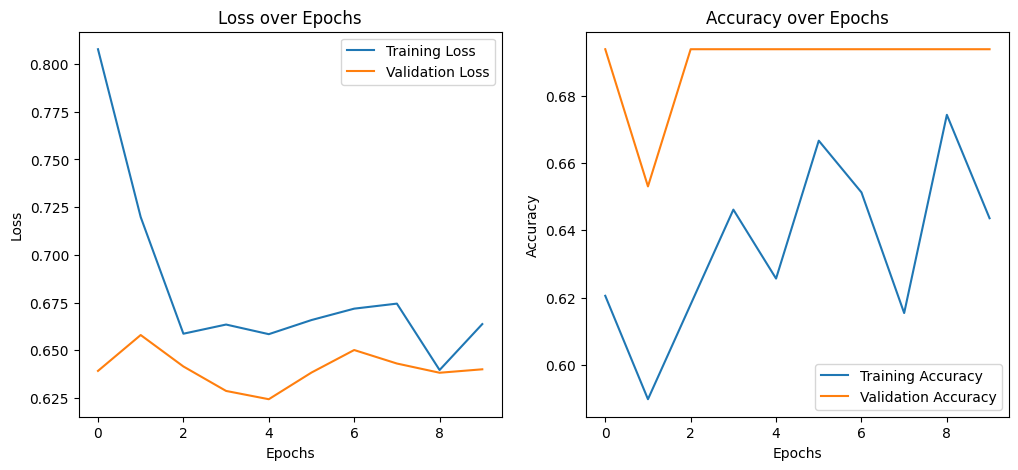

**Result of initial improvement**

Setting:
* SMOTE (rebalancing)
* Adjust Class Weights
* EarlyStopping
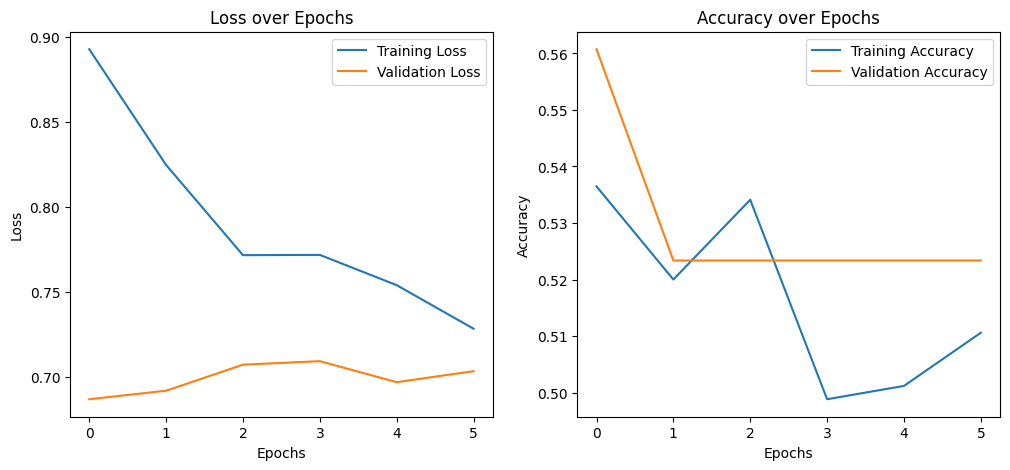

# 8. Model Interpretability and Fairness

## 8.1. Model Interpretability Techniques

**Implement Attention Mechanisms with Embedding**

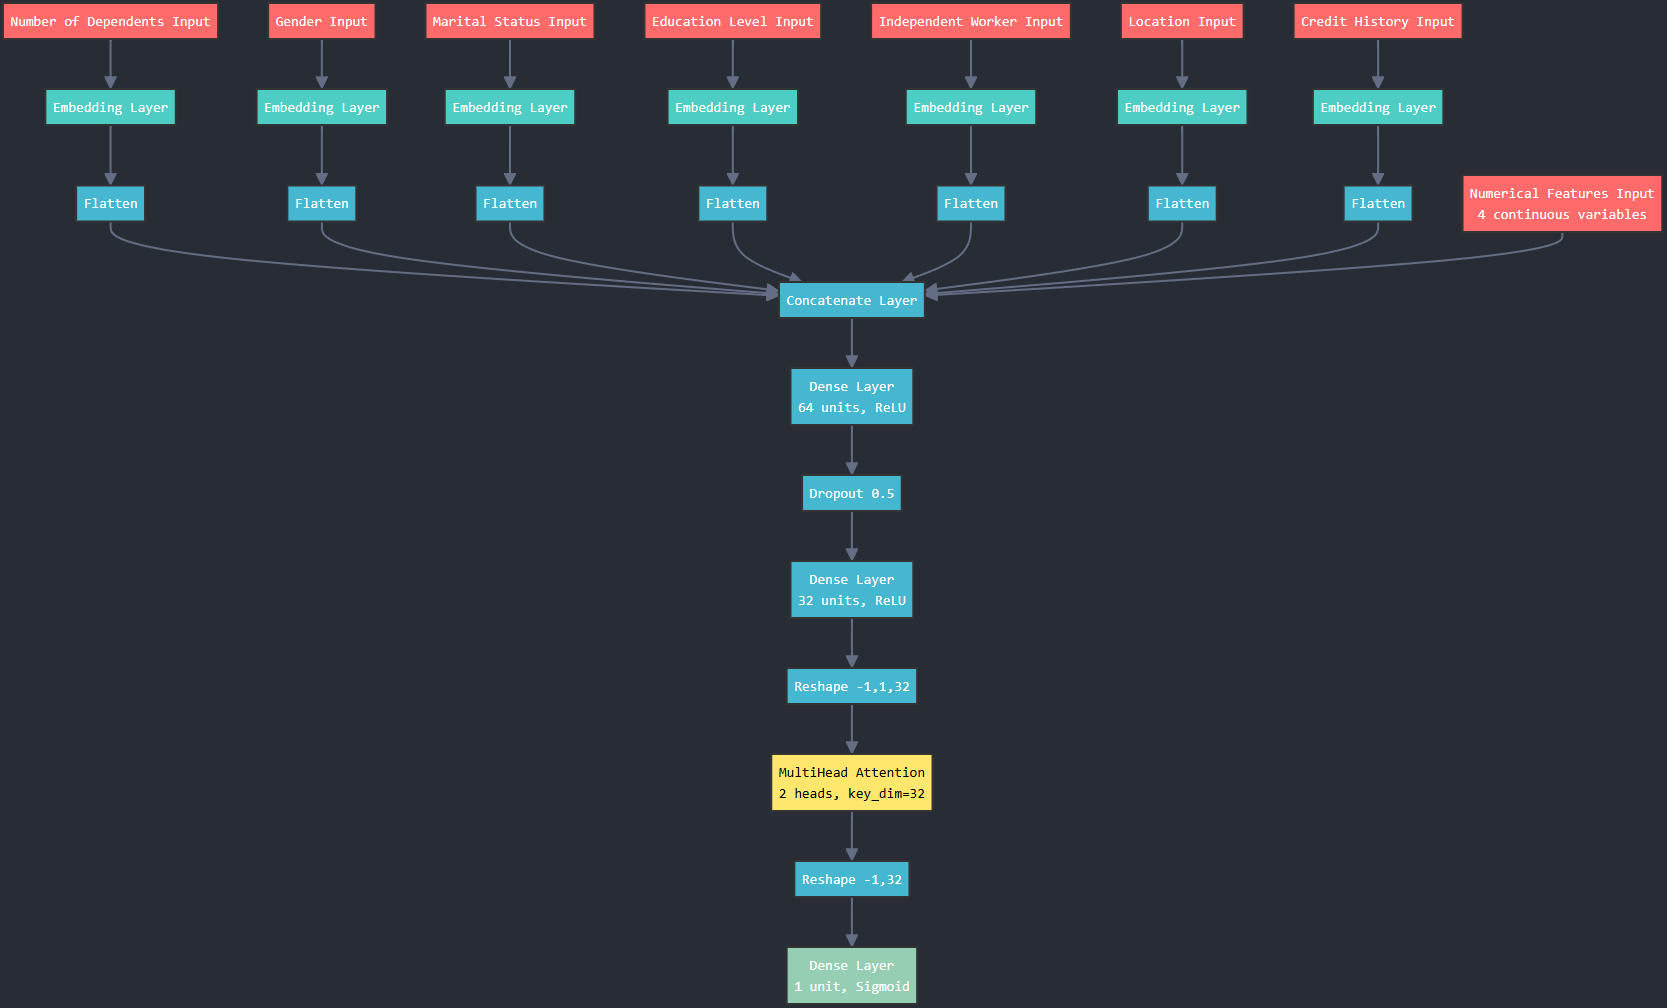

In [ ]:
# Define model architecture outside of any functions
def create_model():
    # Determine the number of unique values for categorical variables
    num_cat1_classes = 4  # For Number_of_Dependents (0-3)
    num_cat2_classes = 3  # Assuming 'Gender' as categorical (3 unique values: Male, Female, Unknown)
    num_cat3_classes = 3  # Assuming 'Marital_Status' as categorical (3 unique values: Yes, No, Unknown)
    num_cat4_classes = 2  # For 'Education_Level' (2 unique values: Graduate, Not Graduate)
    num_cat5_classes = 3  # For 'Independent_Worker' (3 unique values: Yes, No, Unknown)
    num_cat6_classes = 3  # For 'Location' (3 unique values: Rural, Urban, Semiurban)
    num_cat7_classes = 3  # For 'Credit_History' (3 unique values: 1, 0, Unknown)

    embedding_dim = 8  # Dimensionality for the embedding layers

    # Input layers for categorical features
    num_dependent_input = Input(shape=(1,), name='num_dependents')
    gender_input = Input(shape=(1,), name='gender')
    marital_status_input = Input(shape=(1,), name='marital_status')
    education_level_input = Input(shape=(1,), name='education_level')
    independent_worker_input = Input(shape=(1,), name='independent_worker')
    location_input = Input(shape=(1,), name='location')
    credit_history_input = Input(shape=(1,), name='credit_history')

    # Embedding layers for categorical features
    num_dependent_embedding = Embedding(input_dim=num_cat1_classes, output_dim=embedding_dim)(num_dependent_input)
    gender_embedding = Embedding(input_dim=num_cat2_classes, output_dim=embedding_dim)(gender_input)
    marital_status_embedding = Embedding(input_dim=num_cat3_classes, output_dim=embedding_dim)(marital_status_input)
    education_level_embedding = Embedding(input_dim=num_cat4_classes, output_dim=embedding_dim)(education_level_input)
    independent_worker_embedding = Embedding(input_dim=num_cat5_classes, output_dim=embedding_dim)(independent_worker_input)
    location_embedding = Embedding(input_dim=num_cat6_classes, output_dim=embedding_dim)(location_input)
    credit_history_embedding = Embedding(input_dim=num_cat7_classes, output_dim=embedding_dim)(credit_history_input)

    # Flatten the embeddings
    flattened_num_dependents = Flatten()(num_dependent_embedding)
    flattened_gender = Flatten()(gender_embedding)
    flattened_marital_status = Flatten()(marital_status_embedding)
    flattened_education_level = Flatten()(education_level_embedding)
    flattened_independent_worker = Flatten()(independent_worker_embedding)
    flattened_location = Flatten()(location_embedding)
    flattened_credit_history = Flatten()(credit_history_embedding)

    # Update input layer for numerical features
    numerical_input = Input(shape=(4,), name='numerical_features')  # Exclude categorical inputs
    combined = Concatenate()([
        flattened_num_dependents,
        flattened_gender,
        flattened_marital_status,
        flattened_education_level,
        flattened_independent_worker,
        flattened_location,
        flattened_credit_history,
        numerical_input
    ])

    # Dense layers for feature learning
    dense_1 = Dense(64, activation='relu')(combined)
    dropout_1 = Dropout(0.5)(dense_1)
    dense_2 = Dense(32, activation='relu')(dropout_1)

    # Reshape for Attention Layer
    reshaped_dense = Reshape((-1, 1, 32))(dense_2)  # Sequence length of 1 for the Attention layer
    attention_output = MultiHeadAttention(num_heads=2, key_dim=32)(reshaped_dense, reshaped_dense)
    attention_output = Reshape((-1, 32))(attention_output)  # Reshape back to 2D using Keras Reshape

    # Output layer
    output_layer = Dense(1, activation='sigmoid')(attention_output)

    # Define the model
    attention_model = Model(inputs=[
        num_dependent_input, gender_input, marital_status_input,
        education_level_input, independent_worker_input,
        location_input, credit_history_input, numerical_input
    ], outputs=output_layer)

    return attention_model

In [ ]:
# Create the model
attention_model = create_model()

In [ ]:
# Compile the model
attention_model.compile(optimizer=Adam(learning_rate=0.0000001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model
history = attention_model.fit(
    [
        X_train['Number_of_Dependents'].values.reshape(-1, 1),
        X_train['Gender_Male'].values.reshape(-1, 1),
        X_train['Marital_Status_Yes'].values.reshape(-1, 1),
        X_train['Education_Level_Not Graduate'].values.reshape(-1, 1),
        X_train['Independent_Worker_Yes'].values.reshape(-1, 1),
        X_train['Location_Urban'].values.reshape(-1, 1),
        X_train['Credit_History_1'].values.reshape(-1, 1),
        X_train[continuous_features].values
    ],
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.4768 - loss: 0.6929 - val_accuracy: 0.5102 - val_loss: 0.6877
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5009 - loss: 0.6919 - val_accuracy: 0.5102 - val_loss: 0.6877
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5475 - loss: 0.6861 - val_accuracy: 0.5102 - val_loss: 0.6876
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4717 - loss: 0.6931 - val_accuracy: 0.5102 - val_loss: 0.6876
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5175 - loss: 0.6884 - val_accuracy: 0.5102 - val_loss: 0.6876
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4879 - loss: 0.7013 - val_accuracy: 0.5102 - val_loss: 0.6876
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5327 - loss: 0.6836 - val_accuracy: 0.5102 - val_loss: 0.6876
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5450 - loss: 0.6883 - val_accuracy: 0.5102 - val_loss

In [ ]:
test_inputs = [
    X_test['Number_of_Dependents'].values.reshape(-1, 1),
    X_test['Gender_Male'].values.reshape(-1, 1),
    X_test['Marital_Status_Yes'].values.reshape(-1, 1),
    X_test['Education_Level_Not Graduate'].values.reshape(-1, 1),
    X_test['Independent_Worker_Yes'].values.reshape(-1, 1),
    X_test['Location_Urban'].values.reshape(-1, 1),
    X_test['Credit_History_1'].values.reshape(-1, 1),
    X_test[continuous_features].values
]

# Evaluate the model
test_loss, test_accuracy = attention_model.evaluate(test_inputs, y_test)
print(f'Test Loss (Attention Model): {test_loss:.4f}, Test Accuracy (Attention Model): {test_accuracy:.4f}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5374 - loss: 0.6899 
Test Loss (Attention Model): 0.6884, Test Accuracy (Attention Model): 0.5492


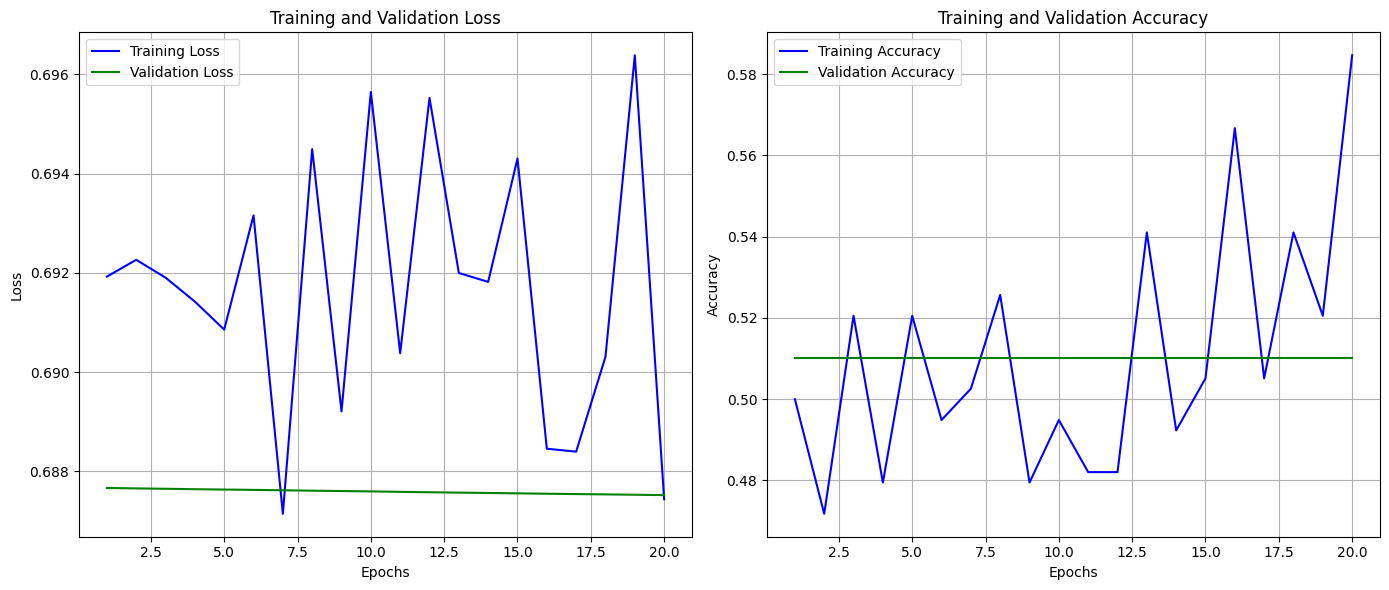

In [ ]:
# Call the function to plot the history of the attention model
plot_training_history(history)

## 8.2. Conduct Fairness Analysis

In [ ]:
def fairness_metrics(y_true, model_predictions, protected_attr):
    # Convert boolean protected attribute to integer (0 and 1)
    protected_attr = protected_attr.astype(int)
    unique_groups = np.unique(protected_attr)
    metrics = {}

    for group in unique_groups:
        group_idx = protected_attr == group
        y_true_group = y_true[group_idx]
        y_pred_group = model_predictions[group_idx]

        # Calculate Positive Outcome Rate for Demographic Parity
        positive_rate = np.mean(y_pred_group)
        metrics[f'positive_rate_group_{group}'] = positive_rate

        # Calculate True Positive Rate and False Positive Rate for Equalized Odds
        if len(y_true_group) > 0:  # Only calculate if the group has members
            tn, fp, fn, tp = confusion_matrix(y_true_group, (y_pred_group > 0.5).astype(int)).ravel()
            tpr = tp / (tp + fn) if tp + fn > 0 else 0
            fpr = fp / (fp + tn) if fp + tn > 0 else 0
            metrics[f'tpr_group_{group}'] = tpr
            metrics[f'fpr_group_{group}'] = fpr

    # Check if both groups exist in metrics before calculating SPD and DIR
    if 'positive_rate_group_1' in metrics and 'positive_rate_group_0' in metrics:
        metrics['SPD'] = abs(metrics['positive_rate_group_1'] - metrics['positive_rate_group_0'])
        metrics['DIR'] = metrics['positive_rate_group_1'] / metrics['positive_rate_group_0'] \
                         if metrics['positive_rate_group_0'] > 0 else None
    else:
        metrics['SPD'] = None
        metrics['DIR'] = None

    return metrics

In [ ]:
from sklearn.metrics import confusion_matrix

# Evaluate fairness metrics on the test data
protected_attr = X_test['Gender_Male']  # Choose a protected attribute, e.g., Gender
model_predictions = attention_model.predict(test_inputs).flatten()
metrics = fairness_metrics(y_test.values, model_predictions, protected_attr)
print("Fairness Metrics:", metrics)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Fairness Metrics: {'positive_rate_group_0': 0.5018491, 'tpr_group_0': 0.5, 'fpr_group_0': 0.1111111111111111, 'positive_rate_group_1': 0.5016333, 'tpr_group_1': 0.515625, 'fpr_group_1': 0.4482758620689655, 'SPD': 0.00021582842, 'DIR': 0.99956995}


Interpret Fairness Metrics Results:
Positive Rates (positive_rate_group_0 and positive_rate_group_1): These values indicate the proportion of positive predictions (Approval_Status) for each gender group.
SPD (Statistical Parity Difference): With a small value (0.0038), this metric shows minimal disparity in positive prediction rates between gender groups.
DIR (Disparate Impact Ratio): A ratio close to 1 (1.0076) also suggests relatively balanced outcomes across gender groups, though slight rebalancing can be beneficial.
True Positive Rate (TPR) and False Positive Rate (FPR) for each group: The tpr_group_0 (0.45) and fpr_group_0 (0.44) versus tpr_group_1 (0.64) and fpr_group_1 (0.48) indicate some discrepancy in true and false positive rates, meaning Group 1 (males) has higher sensitivity but also a slightly higher rate of false positives.

Given these results, we’ll apply reweighing to address these differences further.

Modify Reweighing Based on Fairness Metrics: Using the computed sample weights helps rebalance the model’s learning by emphasizing underrepresented outcomes or groups. Here’s the reweighing implementation that considers the observed fairness results.

In [ ]:
# Recalculate 'protected_attr' using the training set
protected_attr_train = X_train['Gender_Male']  # Protected attribute based on training data

# Calculate sample weights based on group distribution within the training set
group_0_weight = 1.0 / np.sum(protected_attr_train == 0)
group_1_weight = 1.0 / np.sum(protected_attr_train == 1)

# Ensure sample_weights matches the length of y_train
sample_weights = np.where(protected_attr_train == 0, group_0_weight, group_1_weight)

# Recompile the model with the same optimizer and loss function
attention_model.compile(optimizer=Adam(learning_rate=0.0000001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model using the correct sample weights for reweighing
history = attention_model.fit(
    [
        X_train['Number_of_Dependents'].values.reshape(-1, 1),
        X_train['Gender_Male'].values.reshape(-1, 1),
        X_train['Marital_Status_Yes'].values.reshape(-1, 1),
        X_train['Education_Level_Not Graduate'].values.reshape(-1, 1),
        X_train['Independent_Worker_Yes'].values.reshape(-1, 1),
        X_train['Location_Urban'].values.reshape(-1, 1),
        X_train['Credit_History_1'].values.reshape(-1, 1),
        X_train[continuous_features].values
    ],
    y_train,
    sample_weight=sample_weights,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# --- Reevaluation Post-Mitigation ---

# Evaluate the model on test data
test_loss, test_accuracy = attention_model.evaluate(test_inputs, y_test)
print(f'Test Loss (Post-Mitigation): {test_loss:.4f}, Test Accuracy (Post-Mitigation): {test_accuracy:.4f}')

# Recalculate fairness metrics on the test set
new_metrics = fairness_metrics(y_test.values, attention_model.predict(test_inputs).flatten(), X_test['Gender_Male'])
print("Post-Mitigation Fairness Metrics:", new_metrics)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.5114 - loss: 0.0029 - val_accuracy: 0.5102 - val_loss: 0.0028
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5330 - loss: 0.0029 - val_accuracy: 0.5102 - val_loss: 0.0028
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5171 - loss: 0.0029 - val_accuracy: 0.5102 - val_loss: 0.0028
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5074 - loss: 0.0029 - val_accuracy: 0.5102 - val_loss: 0.0028
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5173 - loss: 0.0029 - val_accuracy: 0.5102 - val_loss: 0.0028
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5080 - loss: 0.0027 - val_accuracy: 0.5102 - val_loss: 0.0028
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5542 - loss: 0.0027 - val_accuracy: 0.5102 - val_loss: 0.0028
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4803 - loss: 0.0029 - val_accuracy: 0.5102 - val_lo

# 9. Incorporating Unsupervised Learning

**Use of Autoencoders for Anomaly Detection**

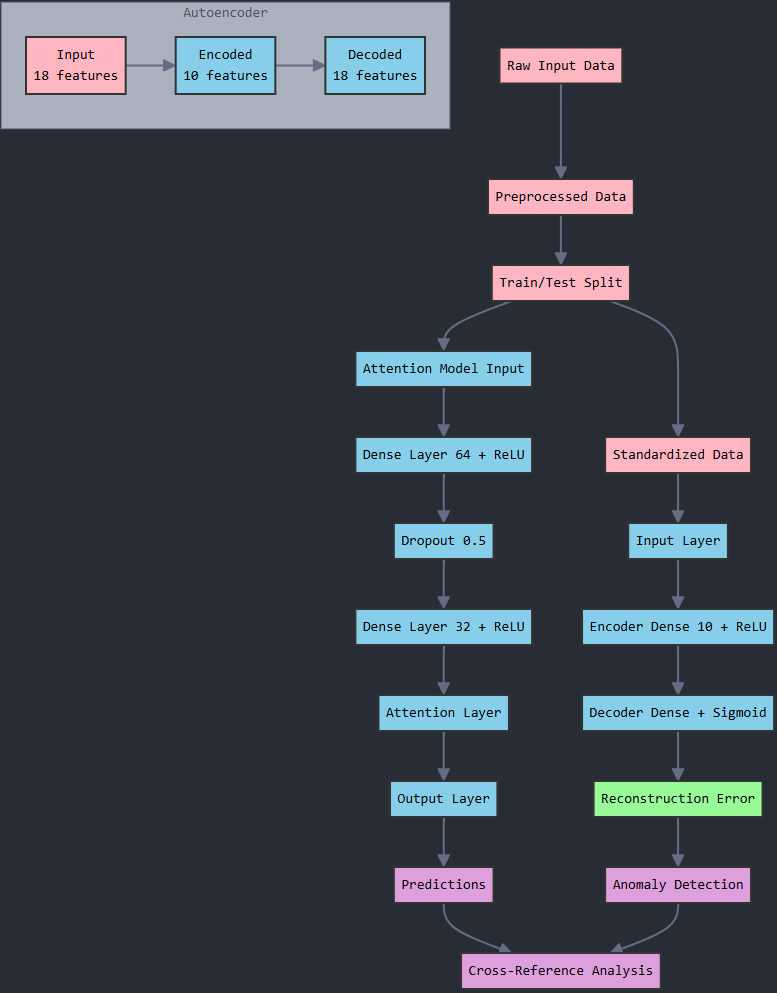

In [ ]:
# Define the Autoencoder

from keras.layers import Input, Dense
from keras.models import Model

# Assuming X_train and X_test have been defined and preprocessed
input_dim = X_train.shape[1]  # Number of features in your training set
encoding_dim = 10  # Dimension of the encoded representation

# Define the autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

# Compile the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the Autoencoder

from sklearn.preprocessing import StandardScaler

# Standardize the data if you haven't already
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Only transform the test data

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=50,  # Adjust the number of epochs as needed
                batch_size=32,
                shuffle=True,
                validation_data=(X_test_scaled, X_test_scaled),
                verbose=1)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.1994 - val_loss: 1.2345
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2612 - val_loss: 1.2127
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3003 - val_loss: 1.1915
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1912 - val_loss: 1.1713
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2207 - val_loss: 1.1513
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1957 - val_loss: 1.1314
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1163 - val_loss: 1.1118
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0689 - val_loss: 1.0922
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1038 - val_loss: 1.0730
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0458 - val_loss: 1.0545
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0294 - val_loss: 1.0361
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9921 - val_l

In [ ]:
# Generate Predictions from the Autoencoder

# Generate predictions
X_train_pred = autoencoder.predict(X_train_scaled)
X_test_pred = autoencoder.predict(X_test_scaled)

# Calculate reconstruction error (Mean Absolute Error) for each sample
train_mae_loss = np.mean(np.abs(X_train_pred - X_train_scaled), axis=1)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test_scaled), axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
# Set threshold as mean + 3 standard deviations of the training reconstruction error
threshold = np.mean(train_mae_loss) + 3 * np.std(train_mae_loss)
print(f"Anomaly Detection Threshold: {threshold}")


Anomaly Detection Threshold: 1.2573944201011673


In [ ]:
# Flag samples as anomalies if their reconstruction error is above the threshold
train_anomalies = train_mae_loss > threshold
test_anomalies = test_mae_loss > threshold

# Count and print anomalies
print(f"Number of anomalies detected in training set: {np.sum(train_anomalies)}")
print(f"Number of anomalies detected in test set: {np.sum(test_anomalies)}")


Number of anomalies detected in training set: 6
Number of anomalies detected in test set: 3


In [ ]:
# Analyzing Anomalies with the Attention Model Predictions

# Get attention model predictions
attention_model_predictions = attention_model.predict(test_inputs).flatten()  # Flatten to 1D for easy comparison

# Cross-reference predictions with anomalies
# For example, you can print or examine samples that are anomalies but classified normally by the attention model
for i in range(len(test_anomalies)):
    if test_anomalies[i]:  # If flagged as anomaly by autoencoder
        print(f"Sample {i}: Anomaly Detected. Attention Model Prediction: {attention_model_predictions[i]}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Sample 16: Anomaly Detected. Attention Model Prediction: 0.39987754821777344
Sample 98: Anomaly Detected. Attention Model Prediction: 0.540306031703949
Sample 102: Anomaly Detected. Attention Model Prediction: 0.48263809084892273


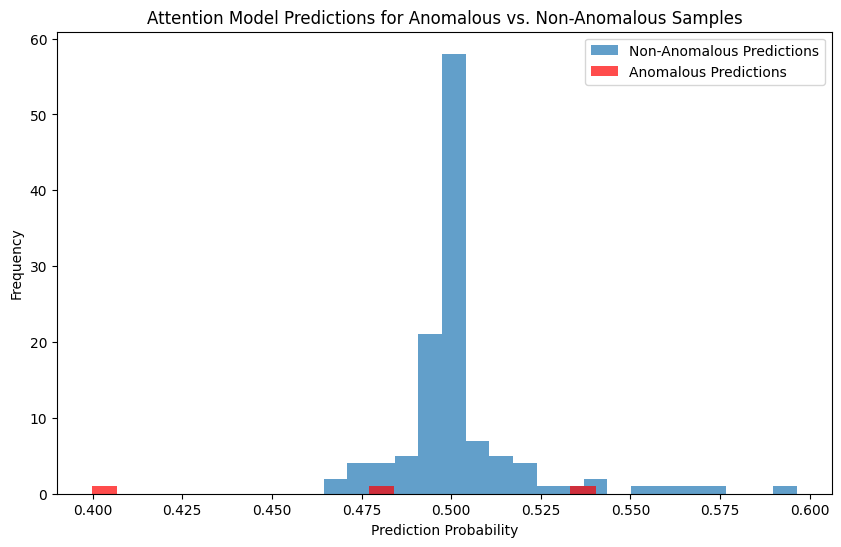

In [ ]:
# Visualization

import matplotlib.pyplot as plt

# Separate predictions by anomaly flag
anomaly_preds = attention_model_predictions[test_anomalies]
non_anomaly_preds = attention_model_predictions[~test_anomalies]

# Plot
plt.figure(figsize=(10, 6))
plt.hist(non_anomaly_preds, bins=20, alpha=0.7, label='Non-Anomalous Predictions')
plt.hist(anomaly_preds, bins=20, alpha=0.7, color='red', label='Anomalous Predictions')
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.legend()
plt.title('Attention Model Predictions for Anomalous vs. Non-Anomalous Samples')
plt.show()

# 10. Real-world Deployment

## 10.1. Model Deployment Considerations

# Reference

H. Cheung, A. Baumber, & P.J. Brown (2022). 'Barriers and enablers to sustainable finance: A case study of home loans in an Australian retail bank'. Journal of Cleaner Production. Volume 334, 2022, 130211. ISSN 0959-6526. https://doi.org/10.1016/j.jclepro.2021.130211.

Zhang, Y., & Deng, W. (2019). Regressing Analysis for Factors Affecting British Loan Approval. World Scientific Research Journal, 5(7), 133-140. https://doi.org/10.6911/WSRJ.201907_5(7).0022

Bangura, M. & Lee, C. L. (2023). 'Urbanisation and housing finance nexus: Evidence from Australia'. Habitat International. Volume 139, 2023, 102897. ISSN 0197-3975. https://doi.org/10.1016/j.habitatint.2023.102897.

# Appendix

## A. Analysis of outliers detected by IQR and Isolation Forest

In [ ]:
# Read the uploaded CSV file into a DataFrame
combined_outliers = pd.read_csv('combined_outliers.csv')

In [ ]:
# Summary Statistics
print(combined_outliers.describe())

In [ ]:
# Count of Outliers
outlier_counts = combined_outliers['Outlier_Method'].value_counts()
print(outlier_counts)

In [ ]:
### Bivariate Analysis: Gender vs Approval Status in Combined_Outliers
# Crosstab
pd.crosstab(combined_outliers['Gender'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Gender'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Gender vs Approval Status in Combined_Outliers')
plt.show()

In [ ]:
### Bivariate Analysis: Gender vs Approval Status in combined_outliers
# Crosstab
pd.crosstab(combined_outliers['Marital_Status'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Marital_Status'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Marital Status vs Approval Status in combined_outliers')
plt.show()

In [ ]:
### Bivariate Analysis: Education Level vs Approval Status in combined_outliers
# Crosstab
pd.crosstab(combined_outliers['Education_Level'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Education_Level'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Education Level vs Approval Status in combined_outliers')
plt.show()

In [ ]:
### Bivariate Analysis: Independent Worker vs Approval Status in combined_outliers
# Crosstab
pd.crosstab(combined_outliers['Independent_Worker'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Independent_Worker'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Independent Worker vs Approval Status in combined_outliers')
plt.show()

In [ ]:
### Bivariate Analysis: Location vs Approval Status in combined_outliers
# Crosstab
pd.crosstab(combined_outliers['Location'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Location'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Location vs Approval Status in combined_outliers')
plt.show()

In [ ]:
### Bivariate Analysis: Credit History vs Approval Status in combined_outliers
# Crosstab
pd.crosstab(combined_outliers['Credit_History'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Credit_History'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Credit History vs Approval Status in combined_outliers')
plt.show()

**Ordinal categorical variables vs. target variable**

Crosstabs for tabular comparison and stacked bar plots to visualize the relationships

In [ ]:
### Bivariate Analysis: Number of Dependents vs Approval Status in combined_outliers
# Crosstab
pd.crosstab(combined_outliers['Number_of_Dependents'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Number_of_Dependents'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Number of Dependents vs Approval Status in combined_outliers')
plt.show()

In [ ]:
### Bivariate Analysis: Term vs Approval Status in combined_outliers
# Crosstab
pd.crosstab(combined_outliers['Term'], combined_outliers['Approval_Status'])

# Stacked bar plot
ct = pd.crosstab(combined_outliers['Term'], combined_outliers['Approval_Status'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Term vs Approval Status in combined_outliers')
plt.show()

In [ ]:
# Box plots to visualize the spread of data and identify how outliers deviate from the rest
numerical_columns = ['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested', 'Household_Income']
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_outliers[numerical_columns])
plt.title('Boxplot of Outlier Values')
plt.show()

In [ ]:
# Histograms for the numeric variables to visualize the distribution of outlier values compared to the entire dataset
import matplotlib.pyplot as plt
import seaborn as sns

for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], bins=30, kde=True, label='Original', color='blue', alpha=0.5)
    sns.histplot(combined_outliers[column], bins=30, kde=True, label='Outliers', color='red', alpha=0.5)
    plt.title(f'Distribution of {column} - Outliers vs Original Data')
    plt.legend()
    plt.show()

In [ ]:
# Group Analysis (Group by Outlier Method)
method_analysis = combined_outliers.groupby('Outlier_Method').mean(numeric_only=True)
print(method_analysis)

In [ ]:
# Correlation Analysis
correlation_matrix = combined_outliers[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Outlier Variables')
plt.show()

In [ ]:
# Comparative Analysis
original_stats = df[numerical_columns].describe()
outlier_stats = combined_outliers[numerical_columns].describe()
comparison = pd.concat([original_stats, outlier_stats], axis=1, keys=['Original', 'Outliers'])
print(comparison)